# **Finding Lane Lines on the Road** 
***
In this project, you will use the tools you learned about in the lesson to identify lane lines on the road.  You can develop your pipeline on a series of individual images, and later apply the result to a video stream (really just a series of images). Check out the video clip "raw-lines-example.mp4" (also contained in this repository) to see what the output should look like after using the helper functions below. 

Once you have a result that looks roughly like "raw-lines-example.mp4", you'll need to get creative and try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines.  You can see an example of the result you're going for in the video "P1_example.mp4".  Ultimately, you would like to draw just one line for the left side of the lane, and one for the right.

---
Let's have a look at our first image called 'test_images/solidWhiteRight.jpg'.  Run the 2 cells below (hit Shift-Enter or the "play" button above) to display the image.

**Note** If, at any point, you encounter frozen display windows or other confounding issues, you can always start again with a clean slate by going to the "Kernel" menu above and selecting "Restart & Clear Output".

---

**The tools you have are color selection, region of interest selection, grayscaling, Gaussian smoothing, Canny Edge Detection and Hough Tranform line detection.  You  are also free to explore and try other techniques that were not presented in the lesson.  Your goal is piece together a pipeline to detect the line segments in the image, then average/extrapolate them and draw them onto the image for display (as below).  Once you have a working pipeline, try it out on the video stream below.**

---

<figure>
 <img src="line-segments-example.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above) after detecting line segments using the helper functions below </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="laneLines_thirdPass.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your goal is to connect/average/extrapolate line segments to get output like this</p> 
 </figcaption>
</figure>

In [150]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)


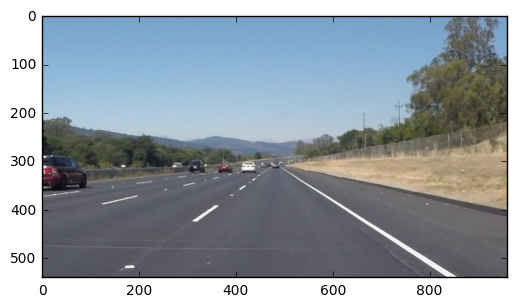

In [151]:
#reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')
#printing out some stats and plotting
print('This image is:', type(image), 'with dimesions:', image.shape)
plt.imshow(image)  #call as plt.imshow(gray, cmap='gray') to show a grayscaled image

**Some OpenCV functions (beyond those introduced in the lesson) that might be useful for this project are:**

`cv2.inRange()` for color selection  
`cv2.fillPoly()` for regions selection  
`cv2.line()` to draw lines on an image given endpoints  
`cv2.addWeighted()` to coadd / overlay two images
`cv2.cvtColor()` to grayscale or change color
`cv2.imwrite()` to output images to file  
`cv2.bitwise_and()` to apply a mask to an image

**Check out the OpenCV documentation to learn about these and discover even more awesome functionality!**

Below are some helper functions to help get you started. They should look familiar from the lesson!

In [214]:
import math

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    largest_positive_slope_line = 0
    largest_negative_slope_line = 0
    largest_positive_slope_line_points = (0,0,0,0)
    largest_negative_slope_line_points = (0,0,0,0)
    global recent_postive_fit
    global recent_negative_fit
    points_positive_slope = []
    points_negative_slope = []
    slopes_positive = []
    slopes_negative = []
    image_shape = img.shape
    for line in lines:
        for x1,y1,x2,y2 in line:
            slope = (y2-y1)/(x2-x1)
            slopes.append(slope)
            length = math.sqrt((x1-x2)**2 + (y1-y2)**2)
            if not math.isnan(slope):
                    if slope > 0:
                        points_positive_slope.append([x1,y1])
                        points_positive_slope.append([x2,y2])
                        slopes_positive.append(slope)
                    else :
                        points_negative_slope.append([x1,y1])
                        points_negative_slope.append([x2,y2])
                        slopes_negative.append(slope)
                        
    # converting to numpy array the positive slope and negative slope points
    numpy_positive_points = np.asarray(points_positive_slope)
    print("numpy_positive_points")
    print(numpy_positive_points)
    numpy_negative_points = np.asarray(points_negative_slope)
    print("numpy_neagtive_points")
    print(numpy_neagtive_points)
    
    # finding the best fit line for the postive points using numpy.polyfit
    if len(numpy_positive_points) > 2:
        postive_fit = np.polyfit(numpy_positive_points[:,0], numpy_positive_points[:,1] ,1)
        recent_postive_fit = postive_fit
    else :
        postive_fit = recent_postive_fit
        
    postive_slope_line = np.poly1d(postive_fit)
    slope_positive_line = postive_fit[0]
    y_intercept_postive_line = postive_fit[1]
    #(x1,y1) : Positive slope line
    x1_Positive_slope = int(image_shape[1])
    y1_Positive_slope = int(postive_slope_line(image_shape[1]))
        #print("postive_fit")
        #print(postive_fit)
        
    # finding the best fit line for the negative points using numpy.polyfit
    if len(numpy_negative_points) > 2:
        negative_fit = np.polyfit(numpy_neagtive_points[:,0], numpy_neagtive_points[:,1] ,1)
        recent_negative_fit = negative_fit
    else :
        negative_fit = recent_negative_fit
    #print("negative_fit")
    #print(negative_fit)
    # converting to a line
    negative_slope_line = np.poly1d(negative_fit)
    slope_negative_line = negative_fit[0]
    y_intercept_negative_line = negative_fit[1]
    #(x1,y1) : Negative slope line
    x1_Negative_slope = 0
    y1_Negative_slope = int(negative_slope_line(0))
    
    #(x2,y2) = intersection of two lines - common point !
    x2 = (y_intercept_negative_line - y_intercept_postive_line) / (slope_positive_line - slope_negative_line)
    y2 = postive_slope_line(x2)
    
    # Defining parameters for drawing extrapolated lines on image
    thickness = 10
    color = [255,0,0]
    point_one_positive_slope = (x1_Positive_slope,y1_Positive_slope)
    point_one_negative_slope = (x1_Negative_slope,y1_Negative_slope)
    point_two = (int(x2),int(y2))            
    cv2.line(img, point_one_positive_slope, point_two, color, thickness)
    cv2.line(img, point_one_negative_slope, point_two, color, thickness)
    #for line in lines:
        #for x1,y1,x2,y2 in line:
            #cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((*img.shape, 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img,lines

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)

## Test on Images

Now you should build your pipeline to work on the images in the directory "test_images"  
**You should make sure your pipeline works well on these images before you try the videos.**

In [153]:
import os
os.listdir("test_images/")
def read_image(image_path):
    """Reads and returns image."""
    image = mpimg.imread(image_path)
    return image

## Pipeline

In [215]:
def pipeline(image,plotIntermediateImage = False):
    
    # converting image to gray scale
    grayImage = grayscale(image)
    if(plotIntermediateImage):
        print('The 1st image is after doing grayscale :', type(grayImage), 'with dimesions:', grayImage.shape)
        plt.subplot(2,3,1)
        plt.imshow(grayImage, cmap="gray") 
    
    # Apply gaussian_smoothing
    kernal_size = 5
    blur_gray_image = gaussian_blur(grayImage,kernal_size)
    if(plotIntermediateImage):
        print('The 2nd image is after doing gaussian_blur :', type(blur_gray_image), 'with dimesions:', blur_gray_image.shape)
        plt.subplot(2,3,2)
        plt.imshow(blur_gray_image) 
    
    # Apply Cannny Edge Detector
    low_threshold = 50
    high_threshold = 150
    edges_image = canny(blur_gray_image,low_threshold,high_threshold)
    if(plotIntermediateImage):
        print('The 3rd image is after doing canny edge detection :', type(edges_image), 'with dimesions:', edges_image.shape)
        plt.subplot(2,3,3)
        plt.imshow(edges_image)
    
    
    # Defining the vertices of a four sided polygon to mask on an image
    imshape = image.shape
    #vertices = np.array([[(0,imshape[0]),(450, 290), (490, 290), (imshape[1],imshape[0])]], dtype=np.int32)
    vertices = np.array([[(0,imshape[0]),(465, 320), (475, 320), (imshape[1],imshape[0])]], dtype=np.int32)
    print("Point 1 :" +  str(0) + ", " + str(imshape[0]) + "Point 2 :"+ str(450) + ", "+ str(290) + "Point 3 : (" + str(490)+ ","+ str(290) + " ) , Point 4 :(" + str(imshape[1])+ ","+str(imshape[0]) + ")" )
    masked_edges_image = region_of_interest(edges_image, vertices)
    if(plotIntermediateImage):
        print('The 4th image is after doing region_of_interest :', type(masked_edges_image), 'with dimesions:', masked_edges_image.shape)
        plt.subplot(2,3,4)
        plt.imshow(masked_edges_image)
    # Define the Hough transform parameters
    rho = 2 # distance resolution in pixels of the Hough grid
    theta = np.pi/180 # angular resolution in radians of the Hough grid
    threshold = 15     # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 40 #minimum number of pixels making up a line
    max_line_gap = 100    # maximum gap in pixels between connectable line segments
    # running Hough to get lines on the masked edges
    lines_image,lines = hough_lines(masked_edges_image, rho, theta, threshold, min_line_length, max_line_gap)
    if(plotIntermediateImage):
        print('The 5th image is after doing hough_lines :', type(lines_image), 'with dimesions:', lines_image.shape)
        plt.subplot(2,3,5)
        plt.imshow(lines_image)
    #color_edges = np.dstack((edges, edges, edges))
    # Draw the lines on the original image
    result = weighted_img(lines_image, image)
    if(plotIntermediateImage):
        print('The 6th image is after drawing the lines on the original image :', type(result), 'with dimesions:', result.shape)
        plt.subplot(2,3,6)
        plt.imshow(result)
    #return result,lines,lines_image
    return result
    

run your solution on all test_images and make copies into the test_images directory).

In [155]:
# Read and save test images to array
test_images = [read_image('test_images/' + i) for i in os.listdir('test_images/')]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[583 369]
 [877 538]
 [626 388]
 [898 538]
 [651 401]
 [897 537]
 [588 371]
 [834 513]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]


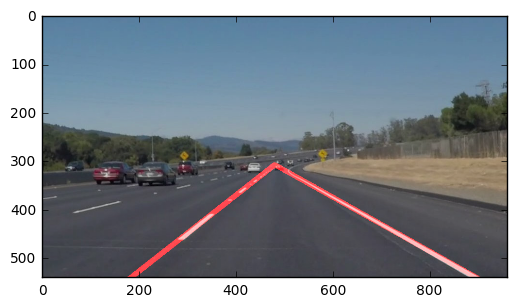

In [210]:
result = pipeline(test_images[0])
plt.imshow(result)

# Testing the Way to extrapolate lines on image 1 

### Getting the image and lines on the hough transform for 1st image to see the relation on slopes of various lines 

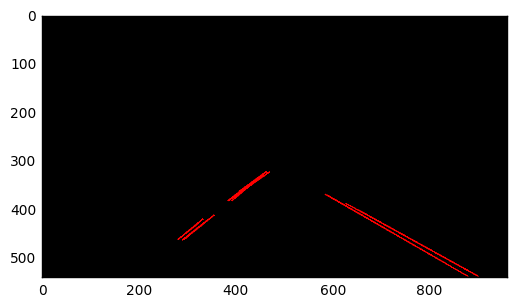

In [135]:
image = result[0]
lines = result[1]
hough_image = result[2]
plt.imshow(hough_image)

In [64]:
slopes = []
lengthOfLines = []
for line in lines:
    for x1,y1,x2,y2 in line:
        slope = (y2-y1)/(x2-x1)
        slopes.append(slope)
        length = math.sqrt((x1-x2)**2 + (y1-y2)**2)
        lengthOfLines.append(length)

### Printing the slopes out to find out a relation amongst slopes : Analyses Differentiate points based on slope and use numpy polyfit function for fiting the line.

In [62]:
for slope in slopes:
    print(slope) 

0.574829931973
0.551470588235
-0.806451612903
-0.702380952381
0.552845528455
0.577235772358
-0.777777777778
-0.823529411765
-0.845070422535
-0.792452830189
-0.730769230769
-0.8


### Printing the length of lines 

In [66]:
for line in lengthOfLines:
    print(line)

339.11207586873104
310.61873736141547
79.64923100695951
102.6498904042279
281.0907326825273
284.0422503783548
68.41052550594829
66.06814663663572
92.9569792968769
67.62396025078685
64.40496875241847
51.22499389946279


## Differentiating Based on Slope is +ve or -ve :

In [67]:
points_positive_slope = []
points_negative_slope = []
lengthOfLine_positive_slope = []
lengthOfLine_negative_slope = []
slopes_positive = []
slopes_negative = []
for line in lines:
    for x1,y1,x2,y2 in line:
        slope = (y2-y1)/(x2-x1)
        slopes.append(slope)
        length = math.sqrt((x1-x2)**2 + (y1-y2)**2)
        if slope > 0:
            points_positive_slope.append([x1,y1])
            points_positive_slope.append([x2,y2])
            lengthOfLine_positive_slope.append(length)
            slopes_positive.append(slope)
        else :
            points_negative_slope.append([x1,y1])
            points_negative_slope.append([x2,y2])
            lengthOfLine_negative_slope.append(length)
            slopes_negative.append(slope)            

In [71]:
print("Positive slope points : ")
print(points_positive_slope)
print("Negative slope points : ")
print(points_negative_slope)
print("Length of line with positive slope: ")
print(lengthOfLine_positive_slope)
print("Length of line with negative slope: ")
print(lengthOfLine_negative_slope)
print("Postive slopes: ")
print(slopes_positive)
print("Negative slopes: ")
print(slopes_negative)

Positive slope points : 
[[583, 369], [877, 538], [626, 388], [898, 538], [651, 401], [897, 537], [588, 371], [834, 513]]
Negative slope points : 
[[292, 462], [354, 412], [384, 382], [468, 323], [383, 382], [437, 340], [280, 462], [331, 420], [391, 382], [462, 322], [289, 463], [342, 421], [406, 363], [458, 325], [281, 461], [321, 429]]
Length of line with positive slope: 
[339.11207586873104, 310.61873736141547, 281.0907326825273, 284.0422503783548]
Length of line with negative slope: 
[79.64923100695951, 102.6498904042279, 68.41052550594829, 66.06814663663572, 92.9569792968769, 67.62396025078685, 64.40496875241847, 51.22499389946279]
Postive slopes: 
[0.57482993197278909, 0.55147058823529416, 0.55284552845528456, 0.57723577235772361]
Negative slopes: 
[-0.80645161290322576, -0.70238095238095233, -0.77777777777777779, -0.82352941176470584, -0.84507042253521125, -0.79245283018867929, -0.73076923076923073, -0.80000000000000004]


In [86]:
# converting to numpy array the positive slope and negative slope points
numpy_positive_points = np.asarray(points_positive_slope)
print("numpy_positive_points")
print(numpy_positive_points)
numpy_neagtive_points = np.asarray(points_negative_slope)
print("numpy_neagtive_points")
print(numpy_neagtive_points)
# finding the best fit line for the postive and negative points using numpy.polyfit
postive_fit = np.polyfit(numpy_positive_points[:,0], numpy_positive_points[:,1] ,1)
print("postive_fit")
print(postive_fit)
negative_fit = np.polyfit(numpy_neagtive_points[:,0], numpy_neagtive_points[:,1] ,1)
print("negative_fit")
print(negative_fit)


numpy_positive_points
[[583 369]
 [877 538]
 [626 388]
 [898 538]
 [651 401]
 [897 537]
 [588 371]
 [834 513]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
postive_fit
[  0.55893573  40.88708073]
negative_fit
[  -0.78266141  684.39165351]


In [88]:
# converting to a line
postive_slope_line = np.poly1d(postive_fit)
negative_slope_line = np.poly1d(negative_fit)
slope_positive_line = postive_fit[0]
y_intercept_postive_line = postive_fit[1]
slope_negative_line = negative_fit[0]
y_intercept_negative_line = negative_fit[1]

## trying to find the begning and the emd of the lines 

In [90]:

# finding the beginning and the end of the lines
#(x1,y1) = (x_intercept,0)
#(x2,y2) = intersection of two lines
x1_Positive_slope = (-1)*(y_intercept_postive_line/ slope_positive_line)
y1_Positive_slope = 0
x1_Negative_slope = (-1)*(y_intercept_negative_line / slope_negative_line)
y1_Negative_slope = 0
x2 = (y_intercept_negative_line - y_intercept_postive_line) / (slope_positive_line - slope_negative_line)
y2 = postive_slope_line(x2)


## Attempt one

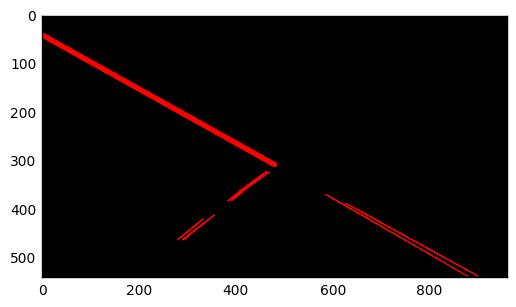

In [136]:
# draw line on image
thickness = 10
color = [255,0,0]
point_one_positive_slope = (int(x1_Positive_slope),0)
point_one_negative_slope = (int(x1_Negative_slope),0)
point_two = (int(x2),int(y2))
image_1 = cv2.line(result[2], point_one_positive_slope, point_two, color, thickness)
Image_2 = cv2.line(image_1, point_one_negative_slope, point_two, color, thickness)
plt.imshow(image_1)

## Attempt two - correct way (adapted in the draw_line method)

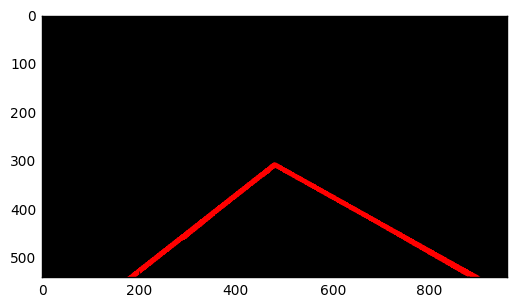

In [133]:
# draw line on image
thickness = 10
color = [255,0,0]
point_one_positive_slope = (960,int(postive_slope_line(960)))
point_one_negative_slope = (0,int(negative_slope_line(0)))
point_two = (int(x2),int(y2))
image_1 = cv2.line(result[2], point_one_positive_slope, point_two, color, thickness)
Image_2 = cv2.line(image_1, point_one_negative_slope, point_two, color, thickness)
plt.imshow(Image_2)

# Testing extrapolating line on 2nd Image

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)


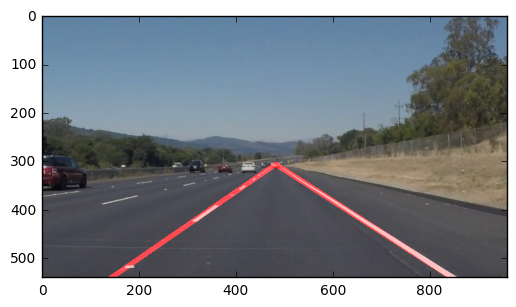

In [157]:
result_1 = pipeline(test_images[1])
plt.imshow(result_1)

# Testing extrapolating line on 6th Image

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)


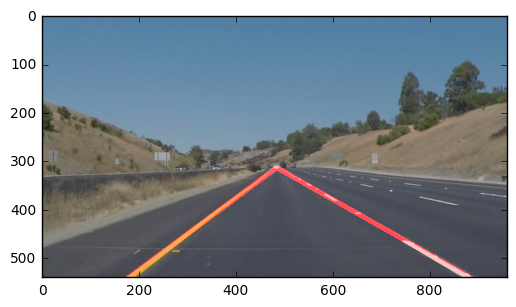

In [158]:
result_5 = pipeline(test_images[5])
plt.imshow(result_5)

## Test on Videos

You know what's cooler than drawing lanes over images? Drawing lanes over video!

We can test our solution on two provided videos:

`solidWhiteRight.mp4`

`solidYellowLeft.mp4`

In [201]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [211]:
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image with lines are drawn on lanes)
    resulted_image = pipeline(image) 
    print(resulted_image.shape)
    return resulted_image

Let's try the one with the solid white lane on the right first ...

In [175]:
white_output = 'white.mp4'
clip1 = VideoFileClip("solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[603 378]
 [870 538]
 [579 367]
 [782 498]
 [739 469]
 [847 539]
 [573 364]
 [637 405]
 [606 379]
 [706 439]
 [794 494]
 [867 537]
 [703 446]
 [756 481]]
numpy_neagtive_points
[[203 514]
 [309 434]
 [389 369]
 [446 329]
 [187 514]
 [302 430]
 [249 467]
 [299 431]
 [394 369]
 [456 324]
 [388 369]
 [430 337]
 [264 467]
 [310 433]
 [209 497]
 [255 463]
 [391 370]
 [445 329]
 [204 513]
 [256 473]]
(540, 960, 3)
[MoviePy] >>>> Building video white.mp4
[MoviePy] Writing video white.mp4








  0%|          | 0/222 [00:00<?, ?it/s]





  2%|▏         | 5/222 [00:00<00:04, 44.39it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[603 378]
 [870 538]
 [579 367]
 [782 498]
 [739 469]
 [847 539]
 [573 364]
 [637 405]
 [606 379]
 [706 439]
 [794 494]
 [867 537]
 [703 446]
 [756 481]]
numpy_neagtive_points
[[203 514]
 [309 434]
 [389 369]
 [446 329]
 [187 514]
 [302 430]
 [249 467]
 [299 431]
 [394 369]
 [456 324]
 [388 369]
 [430 337]
 [264 467]
 [310 433]
 [209 497]
 [255 463]
 [391 370]
 [445 329]
 [204 513]
 [256 473]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[601 381]
 [845 539]
 [657 411]
 [868 538]
 [599 376]
 [674 420]
 [573 364]
 [666 424]
 [774 492]
 [821 523]
 [719 448]
 [759 472]
 [760 474]
 [867 539]
 [686 435]
 [845 538]
 [608 380]
 [650 405]
 [674 421]
 [714 444]]
numpy_neagtive_points
[[150 538]
 [256 463]
 [170 539]
 [289 449]
 [151 538]
 [209 497]
 [234 477]
 [280 446]
 [383 371]
 [456 324]
 [386 374]
 [444 332]
 [383 373]
 [428 339]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[584 369]
 [865 538]
 [585 375]
 [835 532]
 [617 396]
 [844 538]
 [683 428]
 [866 538]
 [560 359]
 [604 386]]
numpy_neagtive_points
[[299 440]
 [351 402]
 [289 438]
 [347 399]
 [384 376]
 [464 320]
 [381 376]
 [433 337]
 [296 441]
 [341 409]
 [401 359]
 [452 326]
 [383 376]
 [437 337]
 [386 376]
 [448 332]]
(540, 960, 3)








  5%|▍         | 11/222 [00:00<00:04, 46.54it/s]





  7%|▋         | 16/222 [00:00<00:04, 45.52it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[576 367]
 [860 538]
 [546 352]
 [723 466]
 [662 426]
 [805 518]
 [674 427]
 [784 493]
 [727 467]
 [796 511]]
numpy_neagtive_points
[[263 458]
 [332 410]
 [275 460]
 [339 410]
 [377 383]
 [467 320]
 [374 382]
 [454 326]
 [284 454]
 [340 412]
 [400 363]
 [450 327]
 [272 461]
 [339 412]
 [375 382]
 [435 340]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[540 349]
 [834 539]
 [564 360]
 [740 469]
 [749 473]
 [856 539]
 [541 350]
 [760 492]
 [786 507]
 [828 535]]
numpy_neagtive_points
[[230 484]
 [316 421]
 [276 460]
 [324 423]
 [269 465]
 [324 421]
 [396 370]
 [467 320]
 [230 483]
 [270 453]
 [393 367]
 [464 321]
 [393 369]
 [454 325]
 [369 388]
 [466 320]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[544 351]
 [833 539]
 [566 361]
 [762 483]
 [768 485]
 [855 539







  9%|▉         | 21/222 [00:00<00:04, 44.61it/s]





 12%|█▏        | 27/222 [00:00<00:04, 47.10it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[583 369]
 [854 538]
 [608 389]
 [766 495]
 [562 359]
 [701 452]
 [786 508]
 [833 538]
 [586 370]
 [855 538]]
numpy_neagtive_points
[[396 368]
 [460 322]
 [392 366]
 [437 334]
 [326 410]
 [368 384]
 [394 368]
 [438 334]
 [395 364]
 [446 329]
 [396 365]
 [449 328]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[636 410]
 [832 538]
 [579 367]
 [854 538]
 [551 354]
 [772 498]
 [573 364]
 [853 539]
 [777 503]
 [827 535]
 [555 356]
 [602 386]]
numpy_neagtive_points
[[310 423]
 [357 392]
 [321 424]
 [363 394]
 [390 372]
 [465 320]
 [392 372]
 [439 339]
 [387 372]
 [448 328]
 [318 425]
 [363 392]
 [388 369]
 [462 321]
 [387 370]
 [445 329]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[573 364]
 [854 539]
 [550 354]
 [830 536]
 [727 470]
 [793 512]
 [576 366]
 [749 474







 14%|█▍        | 32/222 [00:00<00:04, 46.22it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[555 356]
 [835 538]
 [584 369]
 [856 539]
 [602 386]
 [676 433]
 [763 492]
 [835 539]
 [677 426]
 [857 538]
 [668 429]
 [710 456]]
numpy_neagtive_points
[[359 395]
 [458 323]
 [352 395]
 [442 332]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[559 358]
 [836 538]
 [616 388]
 [857 538]
 [584 369]
 [857 539]
 [562 359]
 [716 459]
 [773 498]
 [823 530]]
numpy_neagtive_points
[[348 402]
 [454 325]
 [397 361]
 [439 332]
 [397 362]
 [440 332]
 [401 361]
 [441 332]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[678 426]
 [858 538]
 [559 358]
 [837 538]
 [621 391]
 [682 430]
 [660 415]
 [700 441]
 [562 359]
 [762 489]
 [596 377]
 [655 412]
 [721 453]
 [793 499]
 [781 503]
 [825 531]]
numpy_neagtive_points
[[393 365]
 [439 333]
 [395 367]
 [452 326]
 [393 364]
 [435 33







 17%|█▋        | 37/222 [00:00<00:04, 45.75it/s]


[[390 370]
 [453 326]
 [192 506]
 [267 455]
 [228 494]
 [311 432]
 [235 476]
 [280 446]
 [206 509]
 [288 448]
 [391 371]
 [464 320]
 [390 369]
 [443 330]
 [262 457]
 [305 430]
 [390 368]
 [430 338]
 [193 506]
 [233 479]
 [418 351]
 [458 323]
 [261 469]
 [312 430]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[590 380]
 [833 538]
 [577 366]
 [854 539]
 [573 364]
 [836 528]
 [553 355]
 [651 419]]
numpy_neagtive_points
[[385 372]
 [428 340]
 [178 529]
 [248 479]
 [200 500]
 [281 445]
 [146 538]
 [224 485]
 [389 374]
 [444 330]
 [387 374]
 [453 326]
 [400 366]
 [462 321]
 [167 539]
 [211 506]
 [384 374]
 [430 339]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)








 19%|█▉        | 42/222 [00:00<00:03, 46.12it/s]

numpy_positive_points
[[579 367]
 [854 538]
 [612 394]
 [833 538]
 [557 357]
 [673 433]
 [588 373]
 [825 521]]
numpy_neagtive_points
[[379 378]
 [443 330]
 [166 538]
 [264 467]
 [145 539]
 [253 464]
 [414 354]
 [454 325]
 [378 376]
 [441 331]
 [382 378]
 [458 323]
 [166 539]
 [216 500]
 [382 374]
 [429 340]
 [200 499]
 [250 465]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[600 380]
 [854 539]
 [574 368]
 [719 463]
 [625 402]
 [834 538]
 [583 369]
 [634 400]
 [605 383]
 [645 407]
 [794 500]
 [850 536]
 [682 431]
 [739 466]
 [744 481]
 [810 523]]
numpy_neagtive_points
[[151 534]
 [216 489]
 [164 539]
 [229 492]
 [166 537]
 [229 490]
 [376 382]
 [444 331]
 [372 380]
 [439 332]
 [146 537]
 [199 499]
 [395 366]
 [444 330]
 [371 380]
 [425 340]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[575 368]
 [720 463]
 [584 369]
 [855 538]
 [695 448]
 [833 538]
 [672 

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[572 364]
 [832 539]
 [629 397]
 [855 539]
 [592 373]
 [854 537]
 [750 483]
 [833 538]
 [598 382]
 [652 419]]
numpy_neagtive_points
[[282 450]
 [342 403]
 [270 448]
 [338 402]
 [380 376]
 [429 338]]
(540, 960, 3)








 21%|██        | 47/222 [00:01<00:04, 35.67it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[596 376]
 [854 538]
 [568 362]
 [831 539]
 [564 360]
 [753 487]
 [592 373]
 [645 406]
 [793 500]
 [833 526]]
numpy_neagtive_points
[[240 470]
 [322 412]
 [251 472]
 [329 413]
 [254 471]
 [329 415]
 [369 382]
 [433 337]
 [392 364]
 [434 335]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[564 360]
 [774 501]
 [625 395]
 [854 538]
 [735 474]
 [789 511]
 [616 389]
 [668 421]]
numpy_neagtive_points
[[198 499]
 [304 425]
 [213 501]
 [313 426]
 [223 494]
 [313 427]
 [225 479]
 [305 425]]
(540, 960, 3)








 23%|██▎       | 51/222 [00:01<00:05, 31.56it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[639 404]
 [853 538]
 [702 452]
 [830 538]
 [570 363]
 [645 415]
 [600 379]
 [657 414]
 [699 450]
 [770 499]
 [653 419]
 [694 448]
 [606 387]
 [651 419]
 [711 450]
 [853 539]
 [781 506]
 [828 537]
 [652 412]
 [704 444]]
numpy_neagtive_points
[[141 538]
 [283 439]
 [199 511]
 [292 441]
 [161 539]
 [221 493]
 [140 538]
 [281 439]
 [384 372]
 [445 329]
 [381 371]
 [427 338]
 [400 358]
 [441 331]
 [386 371]
 [445 330]
 [196 513]
 [252 470]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[584 369]
 [852 537]
 [568 362]
 [831 539]
 [562 359]
 [772 500]
 [592 373]
 [648 408]
 [797 504]
 [853 538]
 [586 370]
 [643 405]]
numpy_neagtive_points
[[374 376]
 [428 338]
 [377 376]
 [444 331]
 [162 536]
 [231 487]
 [374 374]
 [425 339]
 [139 538]
 [220 483]
 [202 494]
 [257 458]
 [192 514]
 [262 464]
 [376 376]
 [439 332]
 [144 534]
 [185 506]







 25%|██▍       | 55/222 [00:01<00:05, 29.04it/s]

numpy_positive_points
[[650 417]
 [831 539]
 [604 382]
 [853 538]
 [589 376]
 [654 421]
 [601 380]
 [678 427]
 [756 478]
 [852 538]
 [605 388]
 [689 444]
 [641 405]
 [705 444]
 [641 411]
 [695 448]]
numpy_neagtive_points
[[394 361]
 [439 333]
 [399 361]
 [439 332]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[583 369]
 [788 497]
 [639 412]
 [795 514]
 [553 355]
 [735 474]
 [787 510]
 [829 537]
 [740 468]
 [797 503]
 [564 362]
 [614 394]
 [765 484]
 [852 538]
 [598 379]
 [655 414]]
numpy_neagtive_points
[[393 366]
 [448 328]
 [389 366]
 [445 329]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[571 366]
 [757 491]
 [575 365]
 [852 538]
 [573 364]
 [851 538]
 [750 486]
 [800 518]
 [551 354]
 [672 435]
 [735 475]
 [818 530]]
numpy_neagtive_points
[[306 421]
 [352 390]
 [389 370]
 [454 325]
 [316 422]
 [357 391]
 [384 370]
 [435 334]
 [404 357]
 [444 330]
 [417







 27%|██▋       | 59/222 [00:01<00:05, 28.41it/s]


numpy_neagtive_points
[[286 435]
 [343 398]
 [295 437]
 [347 400]
 [377 374]
 [462 321]
 [379 372]
 [446 329]
 [298 436]
 [341 405]
 [377 373]
 [432 336]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[625 398]
 [849 538]
 [688 447]
 [828 538]
 [546 352]
 [649 419]
 [602 383]
 [654 415]
 [693 450]
 [743 482]
 [568 362]
 [615 390]
 [689 439]
 [849 539]
 [785 511]
 [827 539]
 [630 401]
 [682 433]
 [551 354]
 [606 390]]
numpy_neagtive_points
[[270 454]
 [335 409]
 [371 379]
 [458 323]
 [260 452]
 [328 406]
 [287 435]
 [329 406]
 [396 361]
 [445 329]
 [373 379]
 [454 326]
 [272 454]
 [331 412]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[550 354]
 [772 503]
 [601 381]
 [801 510]
 [553 355]
 [826 539]
 [743 472]
 [843 536]
 [596 378]
 [661 421]]
numpy_neagtive_points
[[240 476]
 [320 418]
 [418 349]
 [458 323]
 [226 474]
 [312 416]
 [392 366]
 [444 330]
 [393







 28%|██▊       | 62/222 [00:01<00:05, 27.34it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[546 352]
 [824 539]
 [606 385]
 [840 536]
 [566 361]
 [626 399]
 [801 510]
 [845 539]
 [574 365]
 [783 500]
 [614 397]
 [668 433]]
numpy_neagtive_points
[[197 507]
 [303 430]
 [181 505]
 [294 429]
 [388 370]
 [458 323]
 [385 368]
 [443 330]
 [387 370]
 [443 331]
 [245 463]
 [287 434]
 [386 370]
 [430 339]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[546 352]
 [823 539]
 [620 394]
 [844 539]
 [572 364]
 [758 484]
 [795 506]
 [842 537]]
numpy_neagtive_points
[[132 538]
 [272 444]
 [151 538]
 [281 447]
 [194 507]
 [279 447]
 [379 371]
 [449 328]
 [383 373]
 [458 323]
 [381 373]
 [439 332]
 [153 536]
 [280 447]
 [155 522]
 [200 491]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[544 351]
 [822 538]
 [728 465]
 [844 538]
 [562 359]
 [718 457]
 [593 378]
 [650 413







 29%|██▉       | 65/222 [00:01<00:05, 27.64it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[544 351]
 [822 538]
 [575 366]
 [801 512]
 [649 413]
 [843 539]
 [566 361]
 [616 394]
 [705 460]
 [822 539]]
numpy_neagtive_points
[[151 539]
 [215 493]
 [367 380]
 [439 332]
 [369 383]
 [409 357]
 [132 539]
 [200 491]
 [390 368]
 [454 325]
 [388 367]
 [449 329]
 [152 537]
 [211 495]
 [379 371]
 [425 345]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[594 380]
 [756 482]
 [634 411]
 [732 477]
 [540 349]
 [821 539]
 [787 502]
 [842 539]
 [561 359]
 [702 447]
 [544 351]
 [821 538]]
numpy_neagtive_points
[[365 387]
 [454 325]
 [357 386]
 [437 333]
 [385 370]
 [446 329]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[547 353]
 [820 537]
 [608 389]
 [786 501]
 [540 349]
 [821 538]
 [561 359]
 [654 417]
 [738 470]
 [804 514]]







 31%|███       | 68/222 [00:01<00:05, 26.53it/s]


numpy_neagtive_points
[[347 393]
 [446 329]
 [351 394]
 [454 325]
 [397 360]
 [437 333]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[584 371]
 [750 478]
 [548 353]
 [823 538]
 [573 364]
 [704 449]
 [732 465]
 [800 510]
 [674 437]
 [824 538]]
numpy_neagtive_points
[[342 400]
 [437 333]
 [394 362]
 [438 335]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[546 352]
 [747 487]
 [566 361]
 [700 445]
 [643 410]
 [847 538]
 [746 486]
 [788 513]
 [550 354]
 [602 388]
 [766 498]
 [823 538]
 [734 477]
 [785 512]
 [568 366]
 [686 445]]
numpy_neagtive_points
[[322 407]
 [363 382]
 [391 366]
 [436 334]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[697 445]
 [846 538]
 [544 351]
 [794 519]
 [609 387]
 [686 438]
 [775 505]
 [824 539]
 [585 372]
 [627 400]
 [604 384]
 [654 416]
 [563 363]
 [634 410]
 [70







 32%|███▏      | 71/222 [00:02<00:05, 26.16it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[542 350]
 [822 538]
 [568 362]
 [768 491]
 [621 395]
 [844 539]
 [659 429]
 [822 539]
 [548 353]
 [616 398]]
numpy_neagtive_points
[[295 433]
 [347 397]
 [287 432]
 [340 396]
 [286 431]
 [336 398]
 [304 428]
 [345 399]
 [399 357]
 [446 329]
 [378 374]
 [446 330]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[548 353]
 [821 537]
 [570 363]
 [745 476]
 [618 393]
 [844 539]
 [757 495]
 [822 538]
 [714 466]
 [788 515]]
numpy_neagtive_points
[[262 447]
 [325 405]
 [276 447]
 [335 405]
 [394 359]
 [445 330]
 [372 378]
 [446 330]
 [262 448]
 [331 403]
 [370 377]
 [426 338]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)







 33%|███▎      | 74/222 [00:02<00:05, 25.31it/s]


numpy_positive_points
[[626 398]
 [843 538]
 [544 351]
 [822 538]
 [574 365]
 [803 513]
 [548 353]
 [619 400]]
numpy_neagtive_points
[[392 365]
 [441 331]
 [240 470]
 [322 415]
 [230 467]
 [276 438]
 [263 445]
 [318 412]
 [389 362]
 [431 336]
 [396 363]
 [445 330]
 [389 363]
 [431 337]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[568 362]
 [777 497]
 [548 353]
 [748 488]
 [636 405]
 [842 538]
 [540 349]
 [821 538]]
numpy_neagtive_points
[[202 498]
 [304 427]
 [189 494]
 [294 426]
 [384 366]
 [439 332]
 [388 368]
 [443 331]
 [187 496]
 [230 469]
 [198 499]
 [282 441]
 [187 498]
 [285 432]
 [203 497]
 [255 460]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[645 419]
 [729 477]
 [601 385]
 [779 497]
 [727 465]
 [841 537]
 [764 501]
 [820 538]
 [606 388]
 [668 426]
 [652 424]
 [809 530]
 [544 351]
 [594 386]]
numpy_neagtive_points
[[144 538]
 [283 440]
 [12

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[540 349]
 [820 538]
 [566 361]
 [841 539]
 [561 359]
 [671 430]
 [544 351]
 [640 416]
 [780 498]
 [840 538]
 [702 448]
 [743 475]]
numpy_neagtive_points
[[131 532]
 [243 459]
 [142 538]
 [256 459]
 [143 539]
 [256 460]
 [371 375]
 [423 340]
 [373 377]
 [441 333]
 [373 376]
 [437 333]
 [123 538]
 [173 506]
 [187 496]
 [248 458]
 [144 538]
 [251 463]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[562 359]
 [746 478]
 [607 395]
 [819 538]
 [750 479]
 [830 532]
 [615 400]
 [669 436]
 [542 350]
 [646 420]
 [780 498]
 [841 539]
 [668 436]
 [730 477]]
numpy_neagtive_points
[[140 539]
 [221 484]
 [121 538]
 [207 482]
 [363 380]
 [440 333]
 [149 531]
 [205 494]
 [367 381]
 [425 343]
 [379 368]
 [441 332]
 [365 380]
 [422 340]
 [366 377]
 [418 342]
 [120 538]
 [206 482]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290







 35%|███▍      | 77/222 [00:02<00:05, 24.71it/s]

numpy_positive_points
[[696 447]
 [839 537]
 [631 410]
 [755 496]
 [595 385]
 [658 430]
 [568 362]
 [667 428]
 [723 473]
 [818 539]
 [670 430]
 [714 457]
 [542 350]
 [582 376]
 [765 491]
 [840 538]
 [548 354]
 [590 383]
 [628 408]
 [678 444]]
numpy_neagtive_points
[[355 384]
 [422 341]
 [118 538]
 [159 513]
 [366 381]
 [412 348]
 [371 378]
 [438 334]
 [359 381]
 [416 343]
 [384 369]
 [439 332]
 [119 538]
 [160 513]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[771 494]
 [839 538]
 [618 403]
 [818 538]
 [568 362]
 [667 428]
 [669 428]
 [753 484]
 [598 389]
 [639 416]
 [546 352]
 [594 386]
 [562 359]
 [625 401]
 [679 445]
 [816 538]
 [632 404]
 [676 434]
 [785 504]
 [829 532]]
numpy_neagtive_points
[[350 392]
 [418 343]
 [344 390]
 [397 357]
 [377 372]
 [436 334]
 [376 372]
 [419 343]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[557 357]
 [836 539]
 [607 







 36%|███▌      | 80/222 [00:02<00:05, 24.15it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[566 363]
 [835 538]
 [554 358]
 [813 539]
 [680 438]
 [835 539]
 [594 381]
 [652 418]
 [571 370]
 [634 415]
 [720 473]
 [814 538]]
numpy_neagtive_points
[[319 407]
 [360 382]
 [387 366]
 [435 334]
 [390 366]
 [445 329]
 [391 365]
 [435 335]
 [389 366]
 [432 337]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[557 357]
 [835 538]
 [544 351]
 [813 539]
 [711 467]
 [813 538]
 [671 432]
 [834 538]
 [588 377]
 [646 414]
 [599 390]
 [640 419]]
numpy_neagtive_points
[[314 418]
 [355 389]
 [302 417]
 [352 387]
 [384 369]
 [435 335]
 [383 369]
 [435 334]
 [311 419]
 [354 388]
 [303 418]
 [347 388]
 [303 419]
 [348 388]]
(540, 960, 3)








 37%|███▋      | 83/222 [00:02<00:06, 22.91it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[542 350]
 [812 539]
 [610 392]
 [834 538]
 [575 369]
 [641 411]
 [732 482]
 [812 538]
 [641 412]
 [691 444]
 [599 390]
 [651 427]
 [719 464]
 [833 538]]
numpy_neagtive_points
[[282 430]
 [340 394]
 [378 373]
 [433 335]
 [298 429]
 [344 396]
 [374 373]
 [427 338]
 [380 373]
 [433 336]
 [289 432]
 [345 397]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[555 356]
 [744 479]
 [542 350]
 [811 538]
 [722 466]
 [833 539]
 [730 471]
 [780 503]
 [710 458]
 [759 489]]
numpy_neagtive_points
[[257 447]
 [329 402]
 [373 377]
 [426 340]
 [290 434]
 [331 405]
 [269 448]
 [310 419]
 [280 431]
 [330 402]
 [370 378]
 [416 343]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[540 349]
 [811 538]
 [561 359]
 [667 428]
 [732 471]
 [796 515]
 [670 430]
 [724 467]
 [786 507]
 [832 539

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[541 350]
 [810 539]
 [607 389]
 [752 486]
 [762 491]
 [823 533]
 [561 359]
 [603 388]
 [725 467]
 [769 497]
 [770 509]
 [811 538]
 [570 370]
 [637 416]
 [747 493]
 [807 536]
 [540 349]
 [589 378]]
numpy_neagtive_points
[[385 368]
 [430 340]
 [182 497]
 [294 424]
 [196 497]
 [302 426]
 [182 495]
 [292 424]
 [382 367]
 [422 340]
 [383 368]
 [429 340]
 [399 356]
 [442 331]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points







 39%|███▊      | 86/222 [00:02<00:06, 22.58it/s]





 40%|████      | 89/222 [00:02<00:05, 23.03it/s]


[[541 350]
 [810 539]
 [622 399]
 [768 497]
 [561 359]
 [615 396]
 [772 498]
 [823 533]
 [752 485]
 [803 520]
 [540 349]
 [580 376]
 [635 408]
 [694 448]
 [661 433]
 [704 464]
 [728 480]
 [787 522]]
numpy_neagtive_points
[[137 537]
 [281 440]
 [133 526]
 [274 438]
 [122 535]
 [172 503]
 [383 365]
 [428 341]
 [380 372]
 [420 341]
 [123 533]
 [239 460]
 [138 536]
 [209 490]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[551 357]
 [810 539]
 [663 426]
 [831 539]
 [560 359]
 [627 404]
 [634 407]
 [688 444]
 [688 443]
 [732 473]
 [778 502]
 [822 532]
 [731 482]
 [794 527]
 [626 402]
 [709 458]
 [577 375]
 [644 421]]
numpy_neagtive_points
[[136 538]
 [254 458]
 [189 491]
 [243 457]
 [116 538]
 [246 457]
 [373 376]
 [424 340]
 [138 537]
 [200 496]
 [370 376]
 [425 339]
 [169 504]
 [244 457]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[541 350]
 [810 539]
 [640







 41%|████▏     | 92/222 [00:02<00:05, 23.46it/s]





 43%|████▎     | 95/222 [00:03<00:05, 24.67it/s]


numpy_positive_points
[[559 358]
 [749 486]
 [646 425]
 [808 539]
 [542 350]
 [586 381]
 [588 384]
 [658 432]
 [756 489]
 [801 520]
 [710 459]
 [754 489]
 [692 457]
 [756 501]
 [562 359]
 [613 396]
 [540 349]
 [630 412]]
numpy_neagtive_points
[[391 363]
 [438 333]
 [394 365]
 [456 324]
 [392 364]
 [437 337]
 [393 364]
 [439 333]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[643 414]
 [829 539]
 [733 485]
 [808 539]
 [650 426]
 [708 469]
 [562 359]
 [650 420]
 [546 352]
 [605 396]
 [757 490]
 [827 537]
 [636 416]
 [680 449]
 [696 450]
 [750 487]
 [634 415]
 [697 460]
 [542 350]
 [586 381]]
numpy_neagtive_points
[[321 408]
 [361 384]
 [390 368]
 [456 324]
 [388 367]
 [437 333]
 [388 368]
 [445 329]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[562 359]
 [615 395]
 [633 409]
 [754 488]
 [552 357]
 [732 484]
 [596 389]
 [808 538]
 [616 397]
 [658 424]
 [695







 44%|████▍     | 98/222 [00:03<00:05, 23.84it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[601 389]
 [707 464]
 [716 462]
 [833 538]
 [666 428]
 [708 455]
 [591 376]
 [645 412]
 [680 446]
 [812 539]
 [690 444]
 [731 471]
 [741 488]
 [800 530]]
numpy_neagtive_points
[[205 494]
 [303 426]
 [190 492]
 [300 423]
 [227 468]
 [299 423]
 [242 469]
 [305 425]
 [387 368]
 [454 325]
 [386 366]
 [429 337]
 [405 356]
 [446 329]
 [387 367]
 [433 336]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[561 359]
 [770 510]
 [578 367]
 [831 538]
 [577 366]
 [626 398]
 [592 376]
 [681 436]
 [687 449]
 [733 483]]
numpy_neagtive_points
[[132 530]
 [275 437]
 [187 506]
 [285 438]
 [147 532]
 [211 488]
 [381 369]
 [454 325]
 [134 528]
 [178 499]
 [233 463]
 [276 437]
 [213 487]
 [258 456]
 [149 530]
 [231 475]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[657 428]
 [800 529







 45%|████▌     | 101/222 [00:03<00:04, 25.00it/s]





 47%|████▋     | 104/222 [00:03<00:05, 23.39it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[579 367]
 [831 537]
 [562 359]
 [728 479]
 [578 367]
 [831 538]
 [664 432]
 [811 538]]
numpy_neagtive_points
[[359 391]
 [443 332]
 [350 391]
 [423 342]
 [382 372]
 [443 331]
 [384 372]
 [424 345]
 [417 345]
 [460 322]
 [380 372]
 [441 331]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[609 395]
 [812 538]
 [573 364]
 [832 539]
 [577 366]
 [832 538]
 [561 360]
 [603 389]
 [729 480]
 [812 539]
 [648 422]
 [703 460]]
numpy_neagtive_points
[[400 363]
 [442 332]
 [349 399]
 [418 345]
 [397 363]
 [464 321]
 [396 361]
 [443 330]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[555 356]
 [754 496]
 [573 364]
 [812 525]
 [575 365]
 [833 539]
 [678 444]
 [751 494]
 [770 509]
 [812 537]
 [627 408]
 [691 452]
 [557 357]
 [597 385]]
numpy_neagtive_points
[[392 365]
 [450 32







 48%|████▊     | 107/222 [00:03<00:05, 22.96it/s]





 50%|████▉     | 110/222 [00:03<00:04, 22.56it/s]


Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[564 360]
 [818 538]
 [584 369]
 [765 491]
 [588 371]
 [837 539]
 [774 509]
 [816 538]
 [570 363]
 [721 472]
 [664 432]
 [714 466]]
numpy_neagtive_points
[[268 446]
 [337 402]
 [279 447]
 [341 404]
 [375 376]
 [464 320]
 [399 359]
 [462 321]
 [286 443]
 [341 405]
 [375 377]
 [437 338]
 [269 445]
 [329 405]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[648 420]
 [815 537]
 [586 370]
 [802 515]
 [577 369]
 [622 400]
 [783 502]
 [833 534]
 [741 484]
 [808 532]
 [651 422]
 [701 456]
 [724 462]
 [765 490]]
numpy_neagtive_points
[[238 466]
 [319 412]
 [404 360]
 [449 328]
 [398 363]
 [445 329]
 [248 468]
 [303 432]
 [369 382]
 [420 344]
 [252 467]
 [298 435]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[609 392]
 [818 539]
 [718 458]
 [838 538]
 [622 395]
 [715 45







 51%|█████     | 113/222 [00:03<00:04, 22.80it/s]





 52%|█████▏    | 116/222 [00:04<00:04, 22.11it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[562 359]
 [818 538]
 [718 458]
 [838 538]
 [588 371]
 [659 420]
 [679 432]
 [740 474]
 [566 361]
 [656 424]
 [648 411]
 [689 440]]
numpy_neagtive_points
[[372 381]
 [465 320]
 [133 538]
 [215 483]
 [154 538]
 [234 480]
 [133 539]
 [221 480]
 [376 380]
 [448 328]
 [394 364]
 [442 331]
 [423 347]
 [464 320]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[588 371]
 [758 485]
 [564 360]
 [819 539]
 [566 361]
 [819 538]
 [737 470]
 [785 503]
 [586 370]
 [646 409]
 [701 446]
 [745 476]]
numpy_neagtive_points
[[405 357]
 [448 328]
 [424 348]
 [465 320]
 [362 384]
 [406 354]
 [134 537]
 [174 511]
 [366 386]
 [458 324]
 [133 539]
 [173 512]
 [365 386]
 [459 323]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[568 362]
 [821 539]
 [632 400]
 [746 475]
 [773 493]
 [817 523







 54%|█████▎    | 119/222 [00:04<00:04, 22.54it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[707 448]
 [846 539]
 [643 413]
 [765 496]
 [594 374]
 [666 419]
 [734 476]
 [785 510]
 [614 387]
 [686 432]
 [573 365]
 [622 397]
 [624 400]
 [674 433]]
numpy_neagtive_points
[[321 416]
 [363 388]
 [388 365]
 [447 329]
 [390 368]
 [441 336]
 [389 368]
 [460 322]
 [315 415]
 [358 385]
 [393 368]
 [464 320]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[600 382]
 [825 539]
 [595 374]
 [833 529]
 [573 364]
 [744 483]
 [599 376]
 [736 465]]
numpy_neagtive_points
[[306 428]
 [354 393]
 [297 425]
 [348 392]
 [388 369]
 [445 329]
 [385 372]
 [465 320]
 [405 358]
 [464 320]
 [306 427]
 [351 395]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[603 384]
 [777 505]
 [685 431]
 [818 520]
 [763 494]
 [815 531]
 [661 416]
 [718 454]
 [573 364]
 [665 428]
 [748 472]
 [847 538







 55%|█████▍    | 122/222 [00:04<00:04, 21.40it/s]





 56%|█████▋    | 125/222 [00:04<00:04, 21.64it/s]


[[593 375]
 [784 495]
 [693 448]
 [826 538]
 [561 359]
 [644 413]
 [677 429]
 [849 537]
 [710 459]
 [766 496]
 [764 495]
 [818 532]]
numpy_neagtive_points
[[205 489]
 [304 422]
 [218 491]
 [314 424]
 [396 368]
 [467 320]
 [392 368]
 [452 326]
 [391 366]
 [445 330]
 [216 492]
 [314 423]
 [207 488]
 [257 455]
 [391 367]
 [454 325]
 [393 368]
 [454 327]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[586 370]
 [738 468]
 [644 413]
 [758 492]
 [762 483]
 [844 533]
 [587 375]
 [668 431]
 [761 494]
 [808 524]
 [574 367]
 [618 397]
 [626 401]
 [671 433]
 [680 439]
 [739 478]
 [584 369]
 [678 428]]
numpy_neagtive_points
[[152 526]
 [287 435]
 [167 528]
 [268 457]
 [386 370]
 [458 323]
 [236 478]
 [295 438]
 [390 372]
 [467 320]
 [203 490]
 [277 441]
 [386 372]
 [450 327]
 [407 360]
 [465 321]
 [387 372]
 [454 325]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[562







 58%|█████▊    | 128/222 [00:04<00:04, 21.65it/s]


numpy_positive_points
[[590 372]
 [856 538]
 [682 438]
 [815 525]
 [562 359]
 [722 463]
 [676 426]
 [855 538]
 [783 505]
 [833 537]
 [678 435]
 [728 467]]
numpy_neagtive_points
[[356 390]
 [463 321]
 [388 372]
 [466 320]
 [363 392]
 [408 358]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[595 374]
 [856 537]
 [652 416]
 [835 539]
 [574 365]
 [695 446]
 [764 490]
 [836 538]
 [720 453]
 [777 488]
 [596 375]
 [645 406]]
numpy_neagtive_points
[[357 397]
 [452 326]
 [347 397]
 [466 320]
 [401 360]
 [441 333]
 [417 353]
 [460 325]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[597 375]
 [859 538]
 [562 359]
 [836 537]
 [594 374]
 [641 404]
 [588 375]
 [638 407]
 [738 474]
 [780 501]
 [667 419]
 [719 452]
 [713 448]
 [760 477]]
numpy_neagtive_points
[[396 364]
 [454 325]
 [399 367]
 [466 320]
 [401 364]
 [457 325]
 [397 366]
 [438 335]]
(540, 960, 3)
Point 1 :0,







 59%|█████▉    | 131/222 [00:04<00:04, 22.04it/s]





 60%|██████    | 134/222 [00:04<00:03, 22.61it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[598 377]
 [858 539]
 [561 359]
 [836 538]
 [584 369]
 [761 479]
 [562 359]
 [837 538]
 [812 509]
 [856 537]]
numpy_neagtive_points
[[252 465]
 [302 432]
 [375 385]
 [458 323]
 [264 467]
 [337 414]
 [408 362]
 [468 320]
 [398 364]
 [458 325]
 [263 467]
 [337 413]
 [254 464]
 [303 431]
 [399 364]
 [458 328]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[641 403]
 [859 539]
 [563 360]
 [837 538]
 [623 392]
 [709 447]
 [564 360]
 [678 434]
 [660 415]
 [741 467]
 [703 442]
 [743 468]
 [795 510]
 [836 537]
 [793 497]
 [860 538]]
numpy_neagtive_points
[[395 369]
 [447 330]
 [399 369]
 [467 320]
 [228 493]
 [286 452]
 [222 487]
 [312 424]
 [256 472]
 [304 439]
 [397 370]
 [462 321]
 [394 368]
 [453 326]
 [227 483]
 [268 454]
 [227 493]
 [317 428]
 [253 466]
 [313 424]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290







 62%|██████▏   | 137/222 [00:05<00:04, 20.73it/s]





 63%|██████▎   | 140/222 [00:05<00:03, 22.35it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[587 372]
 [842 538]
 [608 380]
 [859 536]
 [685 427]
 [864 538]
 [604 378]
 [653 409]]
numpy_neagtive_points
[[161 538]
 [208 504]
 [369 382]
 [447 329]
 [141 538]
 [197 501]
 [374 383]
 [459 323]
 [380 374]
 [445 329]
 [394 366]
 [460 322]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[581 368]
 [844 539]
 [626 392]
 [783 487]
 [715 447]
 [866 538]
 [628 393]
 [675 421]
 [624 397]
 [698 445]]
numpy_neagtive_points
[[360 388]
 [441 331]
 [366 389]
 [452 326]
 [388 370]
 [443 330]
 [389 370]
 [446 330]
 [411 358]
 [455 325]
 [390 370]
 [459 323]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[664 417]
 [864 538]
 [573 364]
 [842 538]
 [601 377]
 [652 408]
 [636 399]
 [676 423]
 [803 502]
 [862 537]
 [579 367]
 [699 447]
 [709 444]
 [758 473]]
numpy_neagtive_poin







 64%|██████▍   | 143/222 [00:05<00:03, 20.96it/s]

(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[590 372]
 [849 533]
 [566 361]
 [692 443]
 [564 360]
 [838 538]
 [586 370]
 [777 489]
 [804 504]
 [859 539]
 [712 458]
 [786 505]]
numpy_neagtive_points
[[316 430]
 [362 397]
 [388 373]
 [459 323]
 [388 375]
 [441 340]
 [309 428]
 [354 395]
 [393 372]
 [467 320]
 [388 372]
 [458 323]
 [307 430]
 [355 395]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[588 371]
 [844 530]
 [565 361]
 [837 538]
 [567 362]
 [633 404]
 [807 506]
 [849 533]
 [564 360]
 [727 466]]
numpy_neagtive_points
[[286 445]
 [346 403]
 [298 445]
 [352 405]
 [385 379]
 [458 325]
 [404 361]
 [462 321]
 [404 362]
 [468 320]
 [388 377]
 [459 327]
 [404 364]
 [459 323]
 [299 444]
 [352 403]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[570 363]
 [739 473]
 [595 374]
 [859 539]
 [667 







 66%|██████▌   | 146/222 [00:05<00:03, 21.23it/s]





 67%|██████▋   | 149/222 [00:05<00:03, 20.90it/s]


numpy_positive_points
[[573 364]
 [841 538]
 [605 379]
 [862 539]
 [599 376]
 [736 461]
 [797 497]
 [861 538]
 [577 366]
 [828 529]
 [708 442]
 [757 473]]
numpy_neagtive_points
[[391 371]
 [454 327]
 [191 524]
 [306 437]
 [212 496]
 [270 456]
 [391 372]
 [462 324]
 [254 466]
 [302 435]
 [176 521]
 [221 491]
 [393 373]
 [438 342]
 [390 370]
 [467 320]
 [242 487]
 [303 440]
 [392 373]
 [466 320]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[579 367]
 [843 539]
 [654 408]
 [864 539]
 [778 495]
 [843 538]
 [689 437]
 [730 465]
 [587 372]
 [647 410]
 [820 510]
 [864 538]
 [689 430]
 [738 461]]
numpy_neagtive_points
[[153 537]
 [275 451]
 [170 538]
 [284 452]
 [388 376]
 [459 323]
 [385 374]
 [456 324]
 [393 374]
 [465 320]
 [171 539]
 [284 454]
 [385 373]
 [447 329]
 [391 370]
 [436 339]
 [190 512]
 [248 469]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[627







 68%|██████▊   | 152/222 [00:05<00:03, 21.95it/s]

[[615 383]
 [872 538]
 [648 409]
 [825 523]
 [588 371]
 [644 408]
 [736 465]
 [850 539]
 [602 379]
 [646 409]
 [671 424]
 [713 452]]
numpy_neagtive_points
[[363 390]
 [452 326]
 [368 392]
 [448 334]
 [366 392]
 [466 320]
 [364 389]
 [422 347]
 [411 359]
 [459 323]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[614 383]
 [872 538]
 [639 405]
 [849 537]
 [649 405]
 [871 539]
 [626 396]
 [700 443]
 [809 513]
 [850 538]
 [616 384]
 [656 408]
 [785 498]
 [836 529]]
numpy_neagtive_points
[[410 362]
 [466 320]
 [353 397]
 [452 327]
 [387 377]
 [452 326]
 [386 376]
 [458 324]
 [409 362]
 [465 320]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[584 369]
 [781 497]
 [664 415]
 [869 539]
 [608 380]
 [712 443]
 [785 498]
 [848 539]
 [586 370]
 [821 522]]
numpy_neagtive_points
[[401 364]
 [460 322]
 [405 366]
 [466 320]
 [401 366]
 [456 329]
 [403 363]
 [458 323]]
(540







 70%|██████▉   | 155/222 [00:05<00:03, 21.47it/s]





 71%|███████   | 158/222 [00:05<00:02, 21.72it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[592 373]
 [848 539]
 [629 390]
 [848 526]
 [819 507]
 [869 539]
 [808 512]
 [848 538]]
numpy_neagtive_points
[[290 442]
 [350 400]
 [387 376]
 [454 325]
 [297 445]
 [355 403]
 [385 374]
 [465 320]
 [388 376]
 [454 329]
 [386 375]
 [450 327]
 [409 360]
 [463 322]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[626 388]
 [810 502]
 [599 376]
 [849 538]
 [728 450]
 [783 485]
 [595 374]
 [849 539]
 [809 500]
 [861 533]]
numpy_neagtive_points
[[274 463]
 [343 411]
 [263 460]
 [337 408]
 [408 362]
 [465 320]
 [380 380]
 [449 328]
 [293 438]
 [334 409]
 [279 449]
 [336 409]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[675 417]
 [871 539]
 [597 375]
 [850 539]
 [639 395]
 [679 421]
 [734 453]
 [871 538]
 [660 408]
 [710 440]
 [775 489]
 [828 524]
 [811 512]
 [851 538







 73%|███████▎  | 161/222 [00:06<00:02, 21.01it/s]


[[632 391]
 [876 538]
 [599 376]
 [766 481]
 [784 494]
 [856 538]
 [699 440]
 [761 478]
 [604 378]
 [661 414]
 [634 392]
 [695 428]]
numpy_neagtive_points
[[396 372]
 [465 320]
 [156 539]
 [279 450]
 [394 369]
 [446 329]
 [176 538]
 [238 490]
 [211 512]
 [259 474]
 [157 537]
 [277 450]
 [392 370]
 [454 325]
 [244 487]
 [289 451]
 [390 373]
 [456 325]
 [157 538]
 [278 450]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[599 376]
 [858 538]
 [641 395]
 [880 538]
 [634 392]
 [841 516]
 [603 378]
 [798 500]
 [802 504]
 [854 536]]
numpy_neagtive_points
[[178 539]
 [261 474]
 [158 538]
 [248 473]
 [385 376]
 [460 322]
 [389 378]
 [458 324]
 [385 378]
 [463 321]
 [158 539]
 [249 473]
 [186 532]
 [245 487]
 [388 378]
 [434 345]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[647 398]
 [882 539]
 [604 378]
 [860 538]
 [599 376]
 [860 539]
 [695 427]
 [783 481]
 [637







 74%|███████▍  | 164/222 [00:06<00:02, 21.10it/s]





 75%|███████▌  | 167/222 [00:06<00:02, 21.94it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[644 402]
 [864 539]
 [634 392]
 [883 536]
 [804 491]
 [885 538]
 [622 389]
 [668 418]
 [745 464]
 [864 538]]
numpy_neagtive_points
[[357 406]
 [466 321]
 [350 406]
 [462 321]
 [386 381]
 [431 349]
 [385 381]
 [459 325]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[592 373]
 [864 537]
 [632 391]
 [887 538]
 [603 378]
 [646 405]
 [739 453]
 [881 535]
 [816 509]
 [865 538]
 [598 376]
 [663 414]]
numpy_neagtive_points
[[404 369]
 [466 321]
 [400 368]
 [462 321]
 [401 369]
 [469 320]
 [336 414]
 [376 387]
 [417 354]
 [458 323]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[626 388]
 [887 538]
 [584 369]
 [865 538]
 [592 373]
 [790 492]
 [747 458]
 [885 538]]
numpy_neagtive_points
[[321 428]
 [369 393]
 [400 373]
 [464 323]
 [396 373]
 [460 322]
 [329 429]
 [372 39







 77%|███████▋  | 170/222 [00:06<00:02, 21.60it/s]





 78%|███████▊  | 173/222 [00:06<00:02, 22.97it/s]

numpy_positive_points
[[628 390]
 [885 538]
 [573 364]
 [863 538]
 [615 383]
 [688 426]
 [678 419]
 [756 465]
 [763 468]
 [836 511]
 [596 377]
 [674 423]]
numpy_neagtive_points
[[379 388]
 [464 320]
 [255 488]
 [337 424]
 [404 369]
 [462 324]
 [286 455]
 [329 422]
 [242 489]
 [284 455]
 [252 489]
 [337 423]
 [377 388]
 [458 323]
 [419 358]
 [469 320]
 [242 487]
 [325 424]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[579 367]
 [864 538]
 [614 383]
 [885 539]
 [701 441]
 [863 539]
 [826 504]
 [884 538]]
numpy_neagtive_points
[[198 519]
 [313 435]
 [212 523]
 [321 435]
 [403 372]
 [465 322]
 [267 480]
 [318 438]
 [398 372]
 [455 325]
 [401 368]
 [464 323]
 [397 372]
 [458 323]
 [197 521]
 [309 436]
 [427 351]
 [467 321]
 [211 511]
 [269 468]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[610 381]
 [884 539]
 [573 364]
 [863 538]
 [819 500]
 [882 537]
 [702 







 79%|███████▉  | 176/222 [00:06<00:01, 23.14it/s]


numpy_positive_points
[[635 401]
 [863 538]
 [619 385]
 [885 538]
 [581 368]
 [639 402]
 [622 393]
 [700 439]
 [615 383]
 [681 422]
 [709 437]
 [772 474]
 [810 505]
 [863 539]
 [597 378]
 [637 401]
 [787 492]
 [841 524]]
numpy_neagtive_points
[[384 387]
 [458 323]
 [373 390]
 [454 325]
 [373 391]
 [429 344]
 [376 391]
 [417 360]
 [398 372]
 [448 335]
 [397 372]
 [449 334]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[584 369]
 [865 538]
 [615 383]
 [886 539]
 [724 445]
 [886 538]
 [796 498]
 [864 538]
 [711 447]
 [751 470]
 [655 413]
 [721 452]
 [746 468]
 [786 491]
 [583 369]
 [632 399]]
numpy_neagtive_points
[[363 396]
 [456 324]
 [371 397]
 [461 324]
 [394 376]
 [459 325]
 [363 398]
 [462 321]
 [393 376]
 [468 320]
 [371 391]
 [424 348]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[615 383]
 [885 539]
 [586 371]
 [864 538]
 [666 420]
 [864 539]
 [606







 81%|████████  | 179/222 [00:06<00:01, 22.98it/s]





 82%|████████▏ | 182/222 [00:07<00:01, 23.70it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[588 371]
 [865 538]
 [621 386]
 [886 539]
 [801 501]
 [864 538]
 [765 479]
 [843 525]
 [617 384]
 [675 418]
 [760 476]
 [800 499]]
numpy_neagtive_points
[[307 441]
 [358 401]
 [397 377]
 [465 322]
 [393 377]
 [458 323]
 [314 443]
 [356 411]
 [413 361]
 [456 328]
 [396 377]
 [441 340]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[676 416]
 [888 538]
 [595 374]
 [867 538]
 [627 394]
 [866 538]
 [636 394]
 [761 466]
 [628 389]
 [887 538]]
numpy_neagtive_points
[[407 361]
 [451 327]
 [282 459]
 [348 409]
 [294 461]
 [356 409]
 [386 379]
 [468 320]
 [388 381]
 [443 339]
 [408 361]
 [456 324]
 [387 381]
 [462 323]
 [296 460]
 [356 411]
 [411 363]
 [465 321]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[711 436]
 [889 538]
 [601 377]
 [641 401]
 [661 415]
 [765 476







 83%|████████▎ | 185/222 [00:07<00:01, 22.79it/s]





 85%|████████▍ | 188/222 [00:07<00:01, 23.15it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[640 401]
 [869 539]
 [640 395]
 [889 539]
 [767 498]
 [825 536]
 [599 376]
 [667 416]
 [703 440]
 [833 518]
 [839 509]
 [888 538]
 [718 441]
 [815 497]
 [634 397]
 [677 422]]
numpy_neagtive_points
[[200 538]
 [279 474]
 [388 376]
 [454 325]
 [189 531]
 [270 470]
 [389 378]
 [467 320]
 [393 378]
 [453 326]
 [387 376]
 [458 324]
 [200 539]
 [279 473]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[714 446]
 [867 538]
 [637 393]
 [889 538]
 [616 386]
 [689 429]
 [649 406]
 [702 437]
 [739 453]
 [806 491]
 [604 378]
 [656 409]]
numpy_neagtive_points
[[200 538]
 [244 500]
 [180 539]
 [233 498]
 [387 383]
 [457 324]
 [179 538]
 [228 500]
 [381 381]
 [468 320]
 [383 383]
 [456 324]
 [382 383]
 [454 325]
 [400 373]
 [460 323]
 [180 538]
 [230 499]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540







 86%|████████▌ | 191/222 [00:07<00:01, 23.37it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[663 405]
 [855 515]
 [664 411]
 [876 538]
 [829 499]
 [897 539]
 [619 385]
 [876 539]
 [799 482]
 [862 519]]
numpy_neagtive_points
[[406 365]
 [452 327]
 [404 365]
 [444 331]
 [352 410]
 [424 345]
 [401 364]
 [441 331]
 [401 365]
 [451 327]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[639 394]
 [875 535]
 [679 412]
 [837 500]
 [858 512]
 [898 536]
 [785 480]
 [857 524]
 [687 416]
 [763 458]]
numpy_neagtive_points
[[333 422]
 [373 389]
 [325 420]
 [368 387]
 [398 367]
 [444 331]
 [325 419]
 [365 388]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[679 412]
 [906 538]
 [671 414]
 [881 536]
 [646 399]
 [801 489]
 [836 500]
 [891 530]]
numpy_neagtive_points
[[306 435]
 [360 396]
 [317 438]
 [364 397]
 [395 372]
 [439 332]
 [391 371]
 [453 326]]
(540, 960, 3)
Poin







 87%|████████▋ | 194/222 [00:07<00:01, 22.18it/s]





 89%|████████▊ | 197/222 [00:07<00:01, 22.61it/s]


numpy_positive_points
[[746 456]
 [893 538]
 [604 379]
 [865 535]
 [629 393]
 [872 539]
 [701 430]
 [797 484]
 [675 415]
 [726 443]
 [647 399]
 [693 424]]
numpy_neagtive_points
[[205 520]
 [315 434]
 [253 495]
 [325 435]
 [404 371]
 [456 326]
 [221 520]
 [277 474]
 [206 517]
 [258 477]
 [399 369]
 [463 325]
 [408 369]
 [453 329]
 [424 349]
 [465 320]
 [399 372]
 [471 320]
 [400 368]
 [461 325]
 [225 518]
 [325 434]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[637 393]
 [889 538]
 [595 374]
 [869 539]
 [612 383]
 [770 478]
 [647 398]
 [796 484]]
numpy_neagtive_points
[[178 538]
 [295 450]
 [198 539]
 [304 450]
 [240 505]
 [304 452]
 [393 374]
 [470 320]
 [399 375]
 [448 331]
 [393 373]
 [456 326]
 [395 375]
 [468 322]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[626 388]
 [886 538]
 [584 369]
 [866 538]
 [592 373]
 [865 537]
 [617 384]
 [886 539]]
nump







 90%|█████████ | 200/222 [00:07<00:00, 23.39it/s]





 91%|█████████▏| 203/222 [00:07<00:00, 22.38it/s]

numpy_positive_points
[[661 406]
 [891 538]
 [596 375]
 [653 409]
 [759 472]
 [860 531]
 [647 404]
 [714 445]
 [753 468]
 [793 491]
 [678 416]
 [726 444]
 [807 501]
 [856 529]
 [610 383]
 [704 438]
 [831 503]
 [891 539]]
numpy_neagtive_points
[[391 375]
 [451 329]
 [393 375]
 [466 320]
 [363 396]
 [441 333]
 [369 397]
 [415 361]
 [408 361]
 [452 326]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[659 412]
 [870 538]
 [668 411]
 [890 539]
 [590 372]
 [638 401]
 [612 384]
 [653 410]
 [725 443]
 [890 538]
 [628 389]
 [669 413]
 [635 398]
 [689 431]
 [711 436]
 [754 461]
 [806 501]
 [865 536]]
numpy_neagtive_points
[[406 365]
 [468 320]
 [405 363]
 [450 328]
 [410 365]
 [462 321]
 [354 406]
 [404 363]
 [388 382]
 [458 323]
 [384 381]
 [429 346]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[634 392]
 [824 498]
 [603 378]
 [872 539]
 [838 506]
 [893 539]
 [822 







 93%|█████████▎| 206/222 [00:08<00:00, 23.13it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[648 398]
 [900 538]
 [604 378]
 [755 466]
 [807 498]
 [878 538]
 [715 444]
 [782 482]
 [736 448]
 [899 539]
 [766 474]
 [806 496]
 [610 381]
 [686 425]
 [836 515]
 [877 538]]
numpy_neagtive_points
[[293 460]
 [355 410]
 [385 377]
 [448 328]
 [281 458]
 [349 407]
 [389 379]
 [465 320]
 [390 379]
 [454 325]
 [280 458]
 [347 408]
 [300 454]
 [355 408]
 [407 361]
 [466 320]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[617 384]
 [805 496]
 [722 439]
 [900 538]
 [804 494]
 [863 530]
 [662 405]
 [721 437]
 [760 468]
 [827 509]
 [694 423]
 [747 452]]
numpy_neagtive_points
[[382 384]
 [450 327]
 [248 484]
 [331 419]
 [262 485]
 [343 420]
 [407 364]
 [456 325]
 [379 384]
 [448 328]
 [249 484]
 [293 449]
 [293 459]
 [342 420]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_point







 94%|█████████▍| 209/222 [00:08<00:00, 23.00it/s]





 95%|█████████▌| 212/222 [00:08<00:00, 23.05it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[621 386]
 [885 538]
 [676 411]
 [906 538]
 [626 388]
 [773 473]
 [810 496]
 [875 533]
 [672 409]
 [722 437]]
numpy_neagtive_points
[[386 381]
 [452 326]
 [381 380]
 [445 330]
 [205 534]
 [245 498]
 [384 381]
 [465 320]
 [190 528]
 [238 494]
 [403 364]
 [453 326]
 [404 364]
 [459 323]
 [381 381]
 [450 327]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[615 383]
 [884 539]
 [669 408]
 [906 539]
 [619 385]
 [672 415]
 [773 464]
 [835 499]
 [826 504]
 [884 538]]
numpy_neagtive_points
[[377 388]
 [454 328]
 [379 380]
 [456 324]
 [398 368]
 [458 323]
 [414 357]
 [467 320]
 [376 383]
 [430 341]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[750 452]
 [906 538]
 [615 383]
 [884 538]
 [676 411]
 [764 461]
 [737 445]
 [806 484]]
numpy_neagtive_points
[[372 386]
 [462 32







 97%|█████████▋| 215/222 [00:08<00:00, 22.91it/s]





 98%|█████████▊| 218/222 [00:08<00:00, 23.21it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[637 393]
 [899 538]
 [594 374]
 [879 538]
 [708 440]
 [878 539]
 [654 402]
 [724 440]
 [592 373]
 [666 414]]
numpy_neagtive_points
[[332 427]
 [373 394]
 [400 370]
 [470 320]
 [324 425]
 [368 392]
 [397 372]
 [464 320]
 [398 373]
 [443 340]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[595 374]
 [877 537]
 [641 395]
 [900 538]
 [634 392]
 [899 539]
 [586 370]
 [878 538]]
numpy_neagtive_points
[[394 377]
 [458 324]
 [413 362]
 [465 320]
 [314 442]
 [365 402]
 [305 442]
 [353 402]
 [410 360]
 [462 325]
 [390 375]
 [440 337]
 [306 442]
 [352 403]
 [396 377]
 [468 320]
 [305 440]
 [357 400]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[619 385]
 [716 438]
 [579 367]
 [876 538]
 [787 476]
 [889 534]
 [726 442]
 [835 504]
 [590 372]
 [829 510]
 [702 429]
 [745 454







100%|█████████▉| 221/222 [00:08<00:00, 23.04it/s]







numpy_positive_points
[[625 388]
 [897 538]
 [583 369]
 [876 538]
 [591 373]
 [649 406]]
numpy_neagtive_points
[[198 538]
 [258 489]
 [178 538]
 [291 450]
 [394 376]
 [462 323]
 [391 374]
 [460 323]
 [223 517]
 [264 484]
 [395 376]
 [450 333]
 [177 538]
 [290 450]
 [406 368]
 [450 334]
 [206 531]
 [247 497]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[623 392]
 [875 538]
 [625 388]
 [896 538]
 [584 369]
 [627 393]
 [772 479]
 [874 538]
 [594 375]
 [670 418]
 [632 397]
 [699 435]]
numpy_neagtive_points
[[196 539]
 [276 471]
 [385 378]
 [454 326]
 [193 524]
 [267 470]
 [391 379]
 [466 321]
 [389 380]
 [457 327]
 [206 531]
 [276 473]
 [175 538]
 [225 501]
 [392 373]
 [464 320]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[626 388]
 [897 538]
 [586 370]
 [876 538]
 [590 372]
 [687 428]
 [831 513]
 [875 538]]
numpy_neagtive_points
[[195 538]
 [239 501]
 [176

Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [49]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

**At this point, if you were successful you probably have the Hough line segments drawn onto the road, but what about identifying the full extent of the lane and marking it clearly as in the example video (P1_example.mp4)?  Think about defining a line to run the full length of the visible lane based on the line segments you identified with the Hough Transform.  Modify your draw_lines function accordingly and try re-running your pipeline.**

Now for the one with the solid yellow lane on the left. This one's more tricky!

In [216]:
yellow_output = 'yellow.mp4'
clip2 = VideoFileClip('solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[665 425]
 [774 496]
 [660 428]
 [759 497]
 [664 425]
 [704 449]
 [691 450]
 [755 496]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
[MoviePy] >>>> Building video yellow.mp4
[MoviePy] Writing video yellow.mp4










  0%|          | 0/682 [00:00<?, ?it/s]







  1%|          | 5/682 [00:00<00:15, 44.06it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[665 425]
 [774 496]
 [660 428]
 [759 497]
 [664 425]
 [704 449]
 [691 450]
 [755 496]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[678 442]
 [812 535]
 [685 439]
 [831 533]
 [752 492]
 [811 534]
 [689 440]
 [731 467]
 [678 441]
 [738 482]
 [736 471]
 [786 503]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[704 459]
 [819 539]
 [714 457]
 [839 538]
 [717 458]
 [763 487

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[636 399]
 [676 428]
 [619 394]
 [666 427]
 [623 393]
 [678 426]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]










  2%|▏         | 11/682 [00:00<00:14, 45.83it/s]







  2%|▏         | 17/682 [00:00<00:14, 47.37it/s]

(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[661 416]
 [701 440]
 [630 401]
 [683 439]
 [634 404]
 [689 442]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[652 409]
 [730 460]
 [643 409]
 [716 460]
 [674 422]
 [716 450]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[659 420]
 [755 484]
 [669 420]
 [767 481]
 [659 422]
 [752 483]
 [708 445]
 [760 477]
 [663 423]
 [707 454]]
numpy_neagtive_points
[[292









  3%|▎         | 22/682 [00:00<00:14, 47.10it/s]







  4%|▍         | 28/682 [00:00<00:13, 48.37it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[608 386]
 [649 412]
 [614 384]
 [657 410]
 [609 386]
 [651 412]
 [615 385]
 [657 412]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[617 392]
 [669 423]
 [624 390]
 [676 423]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[629 399]
 [686 436]
 [637 398]
 [696 434]
 [634 403]
 [684 436]
 [636 398]
 [695 436]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 32









  5%|▍         | 34/682 [00:00<00:12, 50.01it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[606 381]
 [646 405]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (4









  6%|▌         | 40/682 [00:00<00:12, 50.37it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[715 446]
 [863 539]
 [724 445]
 [845 515]
 [834 510]
 [884 538]
 [715 447]
 [762 477]
 [744 457]
 [791 484]
 [749 468]
 [805 504]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[759 466]
 [884 538]
 [747 466]
 [862 538]
 [786 491]
 [835 522]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)










  7%|▋         | 45/682 [00:00<00:12, 50.16it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[802 492]
 [863 526]
 [790 494]
 [861 539]
 [833 510]
 [875 533]
 [792 495]
 [836 522]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [32









  7%|▋         | 50/682 [00:01<00:17, 36.76it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[630 398]
 [690 435]
 [635 395]
 [699 433]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[639 403]
 [712 450]
 [645 402]
 [727 449]
 [647 402]
 [689 426]
 [641 403]
 [715 451]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[655 411]
 [747 471]
 [664 411]
 [761 469]
 [654 412]
 [709 447]
 [662 411]
 [756 467]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 32









  8%|▊         | 55/682 [00:01<00:18, 33.66it/s]







  9%|▊         | 59/682 [00:01<00:19, 32.49it/s]


(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[806 507]
 [855 538]
 [827 509]
 [876 538]
 [806 508]
 [855 539]
 [824 508]
 [876 539]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]










  9%|▉         | 63/682 [00:01<00:20, 29.56it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[627 392]
 [680 425]
 [619 394]
 [671 426]
 [626 392]
 [680 427]
 [628 399]
 [673 426]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[631 402]
 [694 441]
 [635 399]
 [703 439]
 [637 399]
 [680 425]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[647 407]
 [733 456]
 [644 410]
 [722 458]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 34









 10%|▉         | 67/682 [00:01<00:21, 27.97it/s]


[[686 429]
 [795 494]
 [679 431]
 [806 510]
 [690 430]
 [821 508]
 [681 433]
 [730 464]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[703 447]
 [850 539]
 [713 445]
 [862 534]
 [799 506]
 [849 538]
 [799 495]
 [864 534]
 [731 456]
 [782 487]
 [741 470]
 [804 510]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[744 464]
 [870 539]
 [734 466]
 [850 538]
 [733 466]
 [849 539]
 [743 464]
 [871 538]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [38









 10%|█         | 70/682 [00:01<00:23, 26.60it/s]







 11%|█         | 73/682 [00:01<00:23, 26.32it/s]

(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[605 382]
 [649 407]
 [602 385]
 [643 409]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[615 388]
 [666 418]
 [610 390]
 [658 420]
 [610 389]
 [659 420]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[619 397]
 [676 432]
 [626 395]
 [686 431]
 [627 395]
 [686 430]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280









 11%|█         | 76/682 [00:02<00:24, 24.91it/s]







 12%|█▏        | 79/682 [00:02<00:23, 25.45it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[672 424]
 [784 491]
 [661 424]
 [767 493]
 [741 467]
 [783 492]
 [678 428]
 [750 472]
 [691 443]
 [769 493]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[681 437]
 [820 527]
 [692 437]
 [839 525]
 [705 452]
 [821 527]
 [769 484]
 [840 527]
 [703 443]
 [766 480]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[719 453]
 [861 538]
 [707 453]
 [831 533]
 [710 456]
 [800 514









 12%|█▏        | 82/682 [00:02<00:22, 26.22it/s]







 13%|█▎        | 86/682 [00:02<00:22, 26.63it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[592 379]
 [632 404]
 [594 377]
 [637 402]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[605 382]
 [651 412]
 [606 382]
 [651 410]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 









 13%|█▎        | 89/682 [00:02<00:24, 23.99it/s]







 13%|█▎        | 92/682 [00:02<00:24, 23.99it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[641 411]
 [738 474]
 [702 443]
 [750 472]
 [704 444]
 [750 471]
 [683 440]
 [737 474]
 [648 411]
 [699 439]
 [654 412]
 [703 443]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[658 422]
 [782 502]
 [668 422]
 [770 483]
 [756 476]
 [796 500]
 [707 455]
 [773 497]
 [688 442]
 [753 485]
 [732 461]
 [797 499]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[683 439]
 [836 538









 14%|█▍        | 95/682 [00:02<00:24, 24.42it/s]







 14%|█▍        | 98/682 [00:02<00:22, 25.78it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[777 502]
 [833 538]
 [801 507]
 [854 538]
 [776 502]
 [832 539]
 [557 359]
 [597 386]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[560 361]
 [607 392]
 [562 359]
 [612 390]
 [147 530]
 [194 532]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[546 352]
 [590 378]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 42









 15%|█▍        | 101/682 [00:03<00:22, 25.45it/s]







 15%|█▌        | 104/682 [00:03<00:21, 26.33it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[620 400]
 [675 436]
 [629 399]
 [683 434]
 [625 398]
 [684 433]
 [623 403]
 [670 434]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[632 408]
 [698 451]
 [641 406]
 [707 450]
 [636 405]
 [708 448]
 [640 406]
 [683 432]
 [645 416]
 [701 451]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[646 417]
 [725 470]
 [653 415]
 [741 468]
 [654 415]
 [705 445]
 [681 439]
 [726 470









 16%|█▌        | 107/682 [00:03<00:22, 26.03it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[755 477]
 [840 528]
 [781 505]
 [834 538]
 [780 493]
 [848 533]
 [744 481]
 [806 519]
 [789 509]
 [833 537]
 [754 486]
 [794 513]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[803 506]
 [854 537]
 [786 508]
 [833 539]
 [558 358]
 [603 386]
 [798 505]
 [855 539]
 [786 507]
 [833 538]
 [182 506]
 [227 512]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[562 360]
 [612 392









 16%|█▌        | 110/682 [00:03<00:23, 24.18it/s]







 17%|█▋        | 113/682 [00:03<00:25, 22.40it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[613 389]
 [654 416]
 [605 390]
 [647 417]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[614 397]
 [662 428]
 [622 395]
 [672 426]
 [616 397]
 [663 428]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[629 401]
 [695 439]
 [625 404]
 [683 441]
 [628 405]
 [686 441]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 42









 17%|█▋        | 116/682 [00:03<00:25, 22.07it/s]

numpy_positive_points
[[661 419]
 [758 479]
 [653 419]
 [742 479]
 [656 422]
 [702 453]
 [672 425]
 [758 477]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[672 432]
 [789 508]
 [680 430]
 [805 508]
 [694 447]
 [787 508]
 [716 451]
 [805 506]
 [679 430]
 [722 455]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[694 447]
 [836 539]
 [766 483]
 [856 537]
 [705 445]
 [800 502]
 [782 502]
 [834 537]
 [738 466]
 [800 501]
 [697 448]
 [755 485]]
numpy_neagtive_points
[[292









 17%|█▋        | 119/682 [00:03<00:24, 23.20it/s]







 18%|█▊        | 122/682 [00:04<00:28, 19.94it/s]


[[561 359]
 [610 391]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[604 388]
 [645 414]
 [608 385]
 [652 411]









 18%|█▊        | 125/682 [00:04<00:26, 21.02it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[613 394]
 [660 424]
 [629 398]
 [670 422]
 [617 391]
 [665 418]
 [613 393]
 [663 424]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[624 401]
 [682 438]
 [630 399]
 [689 435]
 [627 403]
 [677 436]
 [643 406]
 [691 435]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[636 409]
 [705 453]
 [643 406]
 [717 452]
 [653 419]
 [708 453]
 [642 406]
 [718 451]]
numpy_neagtive_poin









 19%|█▉        | 128/682 [00:04<00:27, 20.30it/s]







 19%|█▉        | 131/682 [00:04<00:25, 21.20it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[688 442]
 [836 538]
 [698 442]
 [856 536]
 [700 442]
 [751 472]
 [711 457]
 [762 491]
 [782 502]
 [838 538]
 [728 459]
 [782 491]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[732 460]
 [859 539]
 [715 459]
 [838 539]
 [730 460]
 [790 497]
 [784 503]
 [838 538]
 [779 490]
 [857 537]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[767 482]
 [861 538]
 [749 482]
 [839 538









 20%|█▉        | 134/682 [00:04<00:26, 20.67it/s]







 20%|██        | 137/682 [00:04<00:25, 21.39it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[608 391]
 [650 418]
 [615 389]
 [659 416]
 [610 391]
 [653 418]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)










 21%|██        | 140/682 [00:04<00:25, 21.04it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[643 412]
 [719 461]
 [647 411]
 [730 459]
 [643 413]
 [717 461]
 [653 412]
 [727 458]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[659 424]
 [750 483]
 [665 421]
 [730 459]
 [705 445]
 [767 481]
 [712 457]
 [752 483]
 [667 421]
 [723 454]
 [658 424]
 [700 449]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[688 434]
 [816 511]
 [677 434]
 [800 514]
 [686 433]
 [746 470









 21%|██        | 143/682 [00:05<00:25, 21.33it/s]







 21%|██▏       | 146/682 [00:05<00:23, 22.70it/s]

[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[786 493]
 [862 538]
 [771 494]
 [831 533]
 [771 495]
 [837 538]
 [783 493]
 [854 534]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[563 361]
 [610 391]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy









 22%|██▏       | 149/682 [00:05<00:23, 23.11it/s]







 22%|██▏       | 153/682 [00:05<00:21, 25.16it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[628 398]
 [690 434]
 [624 400]
 [680 436]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[636 407]
 [704 451]
 [643 406]
 [710 445]
 [667 421]
 [715 449]
 [642 406]
 [714 449]
 [644 406]
 [685 429]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[651 417]
 [734 471]
 [655 415]
 [749 469]
 [659 416]
 [711 446]
 [651 416]
 [737 472]]
numpy_neagtive_points
[[292 462]
 [354 41









 23%|██▎       | 156/682 [00:05<00:20, 25.55it/s]







 23%|██▎       | 160/682 [00:05<00:19, 26.47it/s]

numpy_positive_points
[[765 479]
 [864 538]
 [753 481]
 [844 538]
 [764 479]
 [862 536]
 [561 359]
 [602 384]
 [785 502]
 [834 533]
 [561 360]
 [601 384]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[800 512]
 [842 538]
 [544 351]
 [615 388]
 [814 509]
 [864 538]
 [815 510]
 [864 539]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[548 353]
 [617 396]
 [574 366]
 [625 395]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280









 24%|██▍       | 163/682 [00:05<00:19, 26.78it/s]


numpy_positive_points
[[625 402]
 [677 433]
 [634 400]
 [684 429]
 [628 399]
 [687 432]
 [546 352]
 [593 379]
 [642 405]
 [687 433]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[643 406]
 [711 445]
 [637 408]
 [703 447]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[652 416]
 [697 445]
 [656 414]
 [736 458]
 [652 415]
 [730 464]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [28









 24%|██▍       | 166/682 [00:05<00:20, 25.13it/s]







 25%|██▍       | 169/682 [00:06<00:21, 24.03it/s]


Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[764 472]
 [877 539]
 [746 472]
 [857 539]
 [815 501]
 [869 534]
 [760 470]
 [803 496]
 [562 359]
 [604 383]
 [765 482]
 [837 526]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[805 496]
 [873 536]
 [789 496]
 [857 539]
 [820 504]
 [879 538]
 [802 495]
 [843 519]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468









 25%|██▌       | 172/682 [00:06<00:21, 24.05it/s]







 26%|██▌       | 175/682 [00:06<00:21, 23.11it/s]


numpy_positive_points
[[616 390]
 [659 415]
 [625 389]
 [665 415]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[626 396]
 [678 426]
 [631 394]
 [683 423]
 [630 394]
 [684 424]
 [633 394]
 [679 420]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[637 402]
 [697 438]
 [645 400]
 [704 433]
 [642 400]
 [702 432]
 [637 400]
 [698 438]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [28









 26%|██▌       | 178/682 [00:06<00:21, 23.24it/s]







 27%|██▋       | 181/682 [00:06<00:20, 24.15it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[693 433]
 [800 499]
 [697 429]
 [750 460]
 [723 443]
 [774 474]
 [720 449]
 [803 500]
 [773 473]
 [818 498]
 [693 428]
 [734 450]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[711 444]
 [866 537]
 [723 443]
 [878 532]
 [711 445]
 [833 518]
 [718 442]
 [808 493]
 [807 501]
 [858 532]
 [777 475]
 [880 533]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[751 460]
 [844 513









 27%|██▋       | 184/682 [00:06<00:20, 24.54it/s]







 27%|██▋       | 187/682 [00:06<00:19, 24.82it/s]


numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[615 388]
 [659 412]
 [618 386]
 [663 409]
 [617 390]
 [657 412]
 [616 386]
 [660 409]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 









 28%|██▊       | 190/682 [00:07<00:23, 20.96it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[667 414]
 [759 465]
 [661 417]
 [745 465]
 [661 415]
 [739 461]
 [717 440]
 [758 463]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[678 426]
 [787 489]
 [687 425]
 [760 465]
 [720 449]
 [788 489]
 [716 439]
 [803 489]
 [686 425]
 [750 459]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[707 437]
 [860 518]
 [700 438]
 [844 521]
 [700 439]
 [768 479]
 [711 438]
 [790 480









 28%|██▊       | 193/682 [00:07<00:22, 21.54it/s]







 29%|██▉       | 197/682 [00:07<00:20, 23.38it/s]


numpy_positive_points
[[762 474]
 [874 538]
 [774 473]
 [894 539]
 [560 359]
 [603 384]
 [766 477]
 [822 510]
 [832 503]
 [893 538]
 [540 349]
 [586 371]
 [772 473]
 [840 508]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[807 500]
 [874 539]
 [824 500]
 [894 537]
 [821 499]
 [894 538]
 [807 499]
 [874 538]
 [822 499]
 [895 538]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [









 29%|██▉       | 200/682 [00:07<00:19, 24.54it/s]







 30%|██▉       | 203/682 [00:07<00:19, 25.14it/s]


[[627 395]
 [684 425]
 [622 396]
 [676 427]
 [629 395]
 [681 422]
 [628 399]
 [678 427]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[639 401]
 [708 439]
 [633 402]
 [695 439]
 [651 407]
 [707 437]
 [657 410]
 [702 433]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[647 411]
 [726 456]
 [533 346]
 [573 367]
 [686 428]
 [730 450]
 [651 409]
 [703 435]
 [647 412]
 [722 455]
 [653 409]
 [735 454]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [38









 30%|███       | 206/682 [00:07<00:18, 25.34it/s]







 31%|███       | 209/682 [00:07<00:17, 26.55it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[786 487]
 [879 538]
 [774 489]
 [834 525]
 [520 340]
 [605 387]
 [774 487]
 [857 539]
 [560 359]
 [608 386]
 [548 354]
 [600 386]
 [785 487]
 [878 538]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[524 342]
 [612 392]
 [565 361]
 [616 390]
 [521 341]
 [564 364]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[521 341]
 [571 366]
 [526 343]
 [568 367]
 [554 357]
 [594 382









 31%|███       | 212/682 [00:07<00:18, 25.78it/s]







 32%|███▏      | 216/682 [00:07<00:17, 26.95it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[624 399]
 [681 434]
 [634 400]
 [690 432]
 [624 400]
 [682 434]
 [630 399]
 [682 428]
 [527 344]
 [568 362]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[546 352]
 [596 383]
 [648 408]
 [715 447]
 [636 409]
 [706 449]
 [527 344]
 [572 365]
 [640 406]
 [715 446]
 [528 345]
 [568 367]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[698 439]
 [747 465]
 [651 418]
 [735 468









 32%|███▏      | 219/682 [00:08<00:17, 27.23it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[761 476]
 [833 516]
 [750 479]
 [849 538]
 [517 339]
 [601 384]
 [804 501]
 [848 525]
 [536 350]
 [597 385]
 [557 358]
 [601 382]
 [558 358]
 [599 382]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[809 504]
 [870 539]
 [795 505]
 [848 539]
 [518 339]
 [608 387]
 [811 504]
 [870 538]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[520 340]
 [613 395]
 [538 349]
 [618 393









 33%|███▎      | 223/682 [00:08<00:16, 27.48it/s]







 33%|███▎      | 227/682 [00:08<00:16, 28.41it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[619 398]
 [669 429]
 [627 397]
 [677 427]
 [622 396]
 [670 423]
 [619 399]
 [662 426]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[630 405]
 [689 442]
 [636 403]
 [694 437]
 [642 412]
 [692 442]
 [641 405]
 [700 440]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[644 414]
 [719 460]
 [652 412]
 [730 457]
 [653 413]
 [721 453]
 [643 412]
 [720 460]]
numpy_neagtive_poin









 34%|███▎      | 230/682 [00:08<00:16, 27.47it/s]







 34%|███▍      | 234/682 [00:08<00:15, 28.92it/s]


numpy_positive_points
[[783 499]
 [848 538]
 [768 480]
 [866 537]
 [740 473]
 [810 514]
 [747 467]
 [870 538]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[779 496]
 [848 538]
 [786 491]
 [873 539]
 [777 493]
 [843 534]
 [560 359]
 [600 385]
 [822 511]
 [867 537]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[564 360]
 [611 391]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [28









 35%|███▍      | 237/682 [00:08<00:16, 26.78it/s]







 35%|███▌      | 240/682 [00:08<00:16, 27.29it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[626 399]
 [672 431]
 [631 399]
 [672 421]
 [630 399]
 [693 434]
 [627 402]
 [683 437]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[639 408]
 [710 452]
 [649 407]
 [719 451]
 [646 406]
 [693 432]
 [638 406]
 [704 450]
 [674 423]
 [719 449]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[698 438]
 [753 470]
 [654 417]
 [742 472]
 [658 415]
 [719 448]
 [703 449]
 [743 472









 36%|███▌      | 243/682 [00:08<00:16, 27.23it/s]







 36%|███▌      | 246/682 [00:09<00:15, 27.91it/s]

[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[772 481]
 [871 538]
 [760 483]
 [849 538]
 [550 355]
 [591 378]
 [801 497]
 [848 524]
 [807 511]
 [850 538]
 [818 508]
 [870 538]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[824 511]
 [871 538]
 [810 513]
 [851 538]
 [540 349]
 [598 382]
 [552 356]
 [597 382]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 









 37%|███▋      | 249/682 [00:09<00:15, 27.59it/s]


numpy_positive_points
[[598 382]
 [643 406]
 [596 384]
 [637 408]
 [600 382]
 [643 407]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[603 389]
 [650 417]
 [607 386]
 [659 415]
 [605 387]
 [658 415]
 [535 347]
 [575 370]
 [603 387]
 [651 417]
 [607 392]
 [649 417]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[613 395]
 [665 427]
 [616 392]
 [677 426]
 [627 403]
 [668 428]
 [622 396]
 [668 422]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [38









 37%|███▋      | 253/682 [00:09<00:15, 27.73it/s]







 38%|███▊      | 257/682 [00:09<00:15, 28.06it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[665 428]
 [796 509]
 [676 427]
 [812 509]
 [531 345]
 [576 372]
 [757 484]
 [798 509]
 [688 443]
 [733 471]
 [743 466]
 [812 507]
 [673 427]
 [719 454]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[686 441]
 [842 538]
 [694 441]
 [856 534]
 [686 442]
 [802 514]
 [697 441]
 [738 464]
 [532 346]
 [582 376]
 [784 491]
 [855 533]
 [696 441]
 [756 475]
 [533 346]
 [585 376]
 [540 349]
 [582 373]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450,









 38%|███▊      | 260/682 [00:09<00:15, 28.02it/s]







 39%|███▊      | 263/682 [00:09<00:14, 28.48it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[606 389]
 [649 416]
 [614 389]
 [655 413]
 [610 388]
 [650 411]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)










 39%|███▉      | 266/682 [00:09<00:15, 27.15it/s]







 39%|███▉      | 269/682 [00:09<00:15, 27.51it/s]


numpy_positive_points
[[667 419]
 [759 474]
 [656 420]
 [744 475]
 [694 436]
 [745 466]
 [698 445]
 [745 475]
 [656 421]
 [696 444]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[684 430]
 [806 503]
 [675 431]
 [792 504]
 [686 430]
 [806 502]
 [692 441]
 [745 476]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[699 447]
 [845 538]
 [710 445]
 [852 530]
 [717 448]
 [868 538]
 [699 446]
 [746 475]
 [802 510]
 [846 538]
 [770 490]
 [831 529]]
numpy_neagtive_points
[[29









 40%|███▉      | 272/682 [00:09<00:14, 28.16it/s]







 40%|████      | 276/682 [00:10<00:14, 28.21it/s]


numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[608 388]
 [649 412]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[626 392]
 [674 421]
 [617 394]
 [666 422]
 [632 396]
 [673 422]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) 









 41%|████      | 279/682 [00:10<00:14, 27.82it/s]







 41%|████▏     | 282/682 [00:10<00:14, 27.75it/s]

numpy_positive_points
[[680 425]
 [793 488]
 [675 427]
 [785 495]
 [733 455]
 [801 493]
 [675 428]
 [778 492]
 [683 426]
 [723 448]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[697 441]
 [835 527]
 [706 440]
 [862 530]
 [710 441]
 [863 529]
 [533 347]
 [590 376]
 [802 505]
 [845 532]
 [541 350]
 [587 376]
 [697 442]
 [772 489]
 [782 493]
 [834 526]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[735 458]
 [875 538]
 [725 460]
 [854 538]
 [534 349]
 [599 379]
 [555 









 42%|████▏     | 285/682 [00:10<00:14, 27.84it/s]







 42%|████▏     | 289/682 [00:10<00:13, 28.77it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[498 330]
 [553 361]
 [509 335]
 [575 370]
 [510 336]
 [570 368]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[607 387]
 [649 411]
 [509 335]
 [554 361]
 [610 388]
 [650 410]
 [532 346]
 [578 373]
 [518 340]
 [576 373]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[612 395]
 [660 422]
 [617 393]
 [665 418]
 [525 343]
 [583 375]
 [283 414]
 [339 415]
 [308 410]
 [371 411









 43%|████▎     | 292/682 [00:10<00:14, 26.12it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[538 350]
 [580 376]
 [666 432]
 [770 494]
 [719 456]
 [783 492]
 [488 326]
 [577 377]
 [220 469]
 [311 473]
 [670 429]
 [740 466]
 [666 431]
 [708 456]
 [494 329]
 [580 377]
 [518 339]
 [576 374]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[696 442]
 [838 524]
 [688 443]
 [821 526]
 [510 336]
 [586 379]
 [161 494]
 [284 500]
 [229 501]
 [282 503]
 [503 333]
 [579 380]
 [746 479]
 [822 526]
 [476 320]
 [553 359]
 [699 444]
 [838 525]
 [532 349]
 [582 380]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]









 43%|████▎     | 295/682 [00:10<00:19, 19.48it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[805 504]
 [867 538]
 [793 507]
 [845 538]
 [539 353]
 [609 389]
 [509 335]
 [577 375]
 [793 506]
 [844 537]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[523 343]
 [613 393]
 [552 357]
 [609 395]
 [552 358]
 [594 382]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[522 341]
 [590 382]
 [543 351]
 [595 382]
 [526 343]
 [592 381]]
numpy_neagtive_points
[[292 462]
 [354 41









 44%|████▍     | 299/682 [00:11<00:16, 22.74it/s]







 44%|████▍     | 302/682 [00:11<00:16, 23.72it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[623 398]
 [677 428]
 [616 399]
 [666 430]
 [540 349]
 [587 378]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[633 405]
 [699 444]
 [627 407]
 [689 445]
 [527 344]
 [596 382]
 [636 406]
 [699 443]
 [656 417]
 [696 440]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[640 414]
 [717 462]
 [652 415]
 [728 460]
 [529 344]
 [569 370]
 [645 418]
 [715 462]
 [663 422]
 [727 459









 45%|████▍     | 305/682 [00:11<00:15, 24.40it/s]







 45%|████▌     | 308/682 [00:11<00:15, 24.13it/s]


[[796 499]
 [862 538]
 [736 475]
 [841 538]
 [744 470]
 [802 503]
 [540 349]
 [586 378]
 [706 449]
 [762 479]
 [709 449]
 [760 477]
 [771 486]
 [859 537]
 [537 348]
 [591 379]
 [794 509]
 [841 539]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[763 482]
 [860 538]
 [774 498]
 [838 539]
 [544 351]
 [594 383]
 [730 470]
 [770 497]
 [537 348]
 [601 381]
 [782 492]
 [857 537]
 [555 359]
 [597 383]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[770 495]
 [837 539]
 [785









 46%|████▌     | 311/682 [00:11<00:15, 23.58it/s]


[[602 382]
 [642 405]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[607 389]
 [649 415]
 [611 387]
 [657 412]
 [608 387]
 [658 414]
 [607 390]
 [647 415]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[617 395]
 [666 426]
 [621 393]
 [676 425]
 [628 403]
 [668 426]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(54









 46%|████▌     | 314/682 [00:11<00:15, 24.37it/s]







 46%|████▋     | 317/682 [00:11<00:14, 24.79it/s]


(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[687 439]
 [793 507]
 [724 455]
 [808 504]
 [683 431]
 [757 472]
 [714 449]
 [756 472]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[737 463]
 [863 536]
 [699 448]
 [844 538]
 [709 446]
 [756 472]
 [789 494]
 [861 536]
 [535 347]
 [578 372]
 [732 460]
 [803 500]
 [700 449]
 [806 515]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[780 499]
 [845 538]
 [740









 47%|████▋     | 320/682 [00:11<00:14, 24.67it/s]







 47%|████▋     | 323/682 [00:12<00:17, 21.08it/s]


numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[612 387]
 [656 412]
 [605 389]
 [649 414]
 [609 387]
 [654 412]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)









 48%|████▊     | 326/682 [00:12<00:15, 22.26it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[539 349]
 [591 377]
 [633 400]
 [696 436]
 [625 402]
 [686 438]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[637 409]
 [709 454]
 [644 409]
 [723 453]
 [646 409]
 [696 437]
 [638 409]
 [712 455]
 [528 344]
 [568 367]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[660 419]
 [759 474]
 [656 422]
 [743 476]
 [529 345]
 [572 370]
 [715 450]
 [758 474]
 [654 419]
 [745 476









 48%|████▊     | 329/682 [00:12<00:15, 22.63it/s]







 49%|████▉     | 333/682 [00:12<00:13, 25.02it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[776 486]
 [867 538]
 [761 488]
 [828 527]
 [557 357]
 [601 383]
 [544 352]
 [595 385]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[540 349]
 [580 372]
 [558 360]
 [606 390]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[540 349]
 [596 383]
 [563 360]
 [622 394]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 42









 49%|████▉     | 336/682 [00:12<00:13, 24.96it/s]







 50%|████▉     | 339/682 [00:12<00:13, 25.15it/s]

numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[633 409]
 [704 453]
 [666 423]
 [714 451]
 [641 408]
 [714 450]
 [526 343]
 [569 364]
 [633 410]
 [702 453]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[654 416]
 [748 470]
 [648 417]
 [733 472]
 [655 422]
 [719 465]
 [528 344]
 [573 366]
 [659 418]
 [708 446]
 [529 345]
 [574 368]
 [662 427]
 [732 472]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 









 50%|█████     | 342/682 [00:12<00:14, 24.07it/s]







 51%|█████     | 346/682 [00:12<00:13, 25.14it/s]

[[767 493]
 [838 539]
 [729 460]
 [860 538]
 [728 460]
 [815 512]
 [716 462]
 [759 490]
 [518 339]
 [570 367]
 [798 512]
 [838 538]
 [771 496]
 [811 524]
 [534 348]
 [574 372]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[753 485]
 [839 538]
 [763 482]
 [861 538]
 [520 340]
 [584 373]
 [767 483]
 [841 526]
 [556 357]
 [597 382]
 [754 487]
 [838 539]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[529 344]
 [603 390]
 [819 514]
 [860 538]
 [548 353]
 [609 388]
 [537 









 51%|█████     | 349/682 [00:13<00:13, 24.63it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[616 392]
 [661 420]
 [608 392]
 [652 421]
 [529 344]
 [577 371]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[619 400]
 [671 433]
 [622 398]
 [678 429]
 [539 349]
 [586 377]
 [626 398]
 [681 431]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[630 408]
 [697 449]
 [639 406]
 [702 445]
 [642 407]
 [706 446]
 [541 350]
 [592 381]
 [630 406]
 [692 448]]
numpy_neagtive_poin









 52%|█████▏    | 352/682 [00:13<00:13, 23.72it/s]







 52%|█████▏    | 355/682 [00:13<00:13, 24.98it/s]

numpy_positive_points
[[703 454]
 [821 528]
 [531 345]
 [583 375]
 [540 349]
 [584 375]
 [696 440]
 [811 511]
 [683 441]
 [735 473]
 [766 482]
 [836 527]
 [693 439]
 [748 473]
 [733 472]
 [820 528]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[710 457]
 [836 538]
 [719 455]
 [858 538]
 [722 456]
 [857 537]
 [710 458]
 [780 503]
 [533 346]
 [585 372]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[758 478]
 [858 538]
 [744 479]
 [836 539]
 [534 347]
 [600 382]
 [744 









 52%|█████▏    | 358/682 [00:13<00:13, 24.35it/s]







 53%|█████▎    | 362/682 [00:13<00:12, 25.54it/s]

(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[601 385]
 [641 406]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[606 393]
 [650 419]
 [608 390]
 [657 416]
 [520 340]
 [578 373]
 [615 391]
 [657 417]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[617 399]
 [668 431]
 [521 341]
 [585 376]
 [622 396]
 [676 430]
 [539 349]
 [581 373]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383









 54%|█████▎    | 365/682 [00:13<00:12, 26.20it/s]







 54%|█████▍    | 368/682 [00:13<00:11, 26.32it/s]


numpy_positive_points
[[664 423]
 [771 487]
 [659 425]
 [756 488]
 [509 335]
 [577 368]
 [526 344]
 [574 371]
 [663 423]
 [725 457]
 [659 424]
 [703 455]
 [711 460]
 [755 488]
 [722 456]
 [771 486]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[690 437]
 [763 481]
 [680 439]
 [807 521]
 [747 473]
 [826 519]
 [754 486]
 [809 521]
 [476 320]
 [583 372]
 [689 437]
 [749 474]
 [773 489]
 [826 521]
 [535 348]
 [575 374]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[716









 54%|█████▍    | 371/682 [00:13<00:11, 26.25it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[522 341]
 [562 365]
 [546 352]
 [618 400]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[522 341]
 [568 368]
 [598 383]
 [638 406]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[603 391]
 [647 417]
 [609 389]
 [654 415]
 [518 339]
 [578 370]
 [531 345]
 [574 371]
 [612 389]
 [653 413]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 34









 55%|█████▍    | 374/682 [00:14<00:12, 25.30it/s]







 55%|█████▌    | 377/682 [00:14<00:11, 26.38it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[637 413]
 [711 461]
 [643 411]
 [722 456]
 [638 412]
 [713 461]
 [683 435]
 [724 459]
 [499 331]
 [569 367]
 [648 412]
 [692 437]
 [509 335]
 [551 357]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[500 331]
 [570 371]
 [666 423]
 [761 482]
 [653 423]
 [748 484]
 [661 422]
 [757 480]
 [654 424]
 [698 453]
 [524 342]
 [573 368]
 [533 347]
 [573 370]
 [509 335]
 [553 360]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290









 56%|█████▌    | 380/682 [00:14<00:11, 25.79it/s]







 56%|█████▋    | 384/682 [00:14<00:10, 27.70it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[542 350]
 [606 388]
 [518 339]
 [607 392]
 [533 346]
 [578 373]
 [540 349]
 [580 373]
 [154 526]
 [204 527]
 [524 342]
 [578 374]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[537 348]
 [616 399]
 [522 341]
 [565 365]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[529 344]
 [570 368]
 [511 336]
 [569 368]
 [517 340]
 [564 368]
 [523 342]
 [567 369]]
numpy_neagtive_poin









 57%|█████▋    | 387/682 [00:14<00:11, 25.08it/s]

(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[641 409]
 [717 454]
 [633 411]
 [707 457]
 [666 425]
 [717 455]
 [524 343]
 [564 367]
 [523 342]
 [567 365]
 [653 424]
 [703 456]
 [540 349]
 [589 382]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[657 419]
 [752 476]
 [648 420]
 [741 478]
 [525 343]
 [568 369]
 [526 343]
 [573 369]
 [710 449]
 [754 476]
 [694 450]
 [742 478]
 [683 434]
 [745 470]
 [655 424]
 [696 451]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Poin









 57%|█████▋    | 390/682 [00:14<00:11, 24.66it/s]







 58%|█████▊    | 393/682 [00:14<00:11, 25.95it/s]


Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[758 492]
 [827 537]
 [771 490]
 [853 539]
 [518 339]
 [594 386]
 [557 358]
 [598 386]
 [774 491]
 [816 516]
 [556 358]
 [596 382]
 [784 508]
 [831 539]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[535 347]
 [576 374]
 [545 353]
 [607 390]
 [559 360]
 [605 388]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[536 348]
 [617 395]
 [538 350]
 [582 377]
 [518 339]
 [561 36









 58%|█████▊    | 396/682 [00:14<00:12, 23.20it/s]







 59%|█████▊    | 399/682 [00:15<00:11, 24.46it/s]

numpy_positive_points
[[533 346]
 [580 374]
 [605 395]
 [654 425]
 [612 393]
 [660 424]
 [616 395]
 [659 422]
 [522 341]
 [573 374]
 [526 343]
 [578 375]
 [615 394]
 [658 420]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[623 400]
 [680 434]
 [616 402]
 [672 438]
 [539 349]
 [586 378]
 [522 341]
 [581 376]
 [619 400]
 [662 424]
 [617 403]
 [669 438]
 [535 347]
 [579 378]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[628 410]
 [696 454]
 [635 408]
 [706 452]
 [636 









 59%|█████▉    | 402/682 [00:15<00:12, 22.93it/s]







 59%|█████▉    | 405/682 [00:15<00:11, 23.74it/s]


[[690 444]
 [842 539]
 [538 349]
 [580 377]
 [683 448]
 [821 538]
 [693 445]
 [733 469]
 [528 344]
 [579 377]
 [779 499]
 [843 538]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[725 465]
 [842 538]
 [709 464]
 [820 539]
 [529 347]
 [589 379]
 [530 345]
 [585 382]
 [710 465]
 [764 502]
 [723 464]
 [787 505]
 [783 502]
 [840 537]
 [531 345]
 [586 378]
 [529 345]
 [584 382]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[745 489]
 [820 539]
 [533 346]
 [597 385]
 [801









 60%|█████▉    | 408/682 [00:15<00:11, 24.63it/s]


[[520 340]
 [564 368]
 [547 354]
 [618 405]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[526 343]
 [567 371]
 [599 387]
 [640 412]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[609 393]
 [656 422]
 [522 341]
 [574 374]
 [533 346]
 [575 374]
 [605 395]
 [645 423]
 [528 344]
 [578 374]
 [605 394]
 [649 424]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [40









 60%|██████    | 411/682 [00:15<00:12, 22.22it/s]







 61%|██████    | 414/682 [00:15<00:11, 23.06it/s]


[[637 408]
 [702 450]
 [626 410]
 [692 452]
 [539 351]
 [589 382]
 [632 407]
 [699 449]
 [627 408]
 [675 442]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[641 417]
 [719 471]
 [683 438]
 [732 468]
 [526 343]
 [572 367]
 [647 416]
 [697 445]
 [527 344]
 [568 369]
 [675 440]
 [720 471]
 [649 416]
 [733 470]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[710 464]
 [760 497]
 [669 427]
 [727 463]
 [658 429]
 [702 457]
 [688 440]
 [745 475]
 [659 428]
 [761 497]
 [530









 61%|██████    | 417/682 [00:15<00:11, 22.94it/s]







 62%|██████▏   | 420/682 [00:15<00:11, 23.81it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[804 509]
 [847 535]
 [789 511]
 [830 538]
 [555 360]
 [601 384]
 [535 347]
 [602 388]
 [789 512]
 [829 539]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[548 354]
 [612 395]
 [538 349]
 [618 393]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 









 62%|██████▏   | 423/682 [00:16<00:10, 23.72it/s]


numpy_positive_points
[[615 400]
 [666 433]
 [619 397]
 [678 431]
 [615 399]
 [670 434]
 [614 400]
 [657 428]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[625 406]
 [691 448]
 [629 403]
 [702 446]
 [640 409]
 [700 445]
 [649 414]
 [702 445]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[647 412]
 [733 465]
 [636 414]
 [677 440]
 [637 412]
 [679 441]
 [661 428]
 [718 466]
 [646 412]
 [733 466]
 [541 350]
 [594 383]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [38









 62%|██████▏   | 426/682 [00:16<00:12, 20.35it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[672 436]
 [811 526]
 [686 436]
 [829 525]
 [752 487]
 [812 526]
 [535 347]
 [581 375]
 [682 435]
 [746 474]
 [752 476]
 [828 523]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[533 346]
 [588 379]
 [711 452]
 [823 521]
 [696 451]
 [831 539]
 [794 502]
 [843 533]
 [704 457]
 [746 485]
 [708 451]
 [762 484]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[744 473]
 [852 538









 63%|██████▎   | 429/682 [00:16<00:12, 20.75it/s]







 63%|██████▎   | 432/682 [00:16<00:11, 21.96it/s]


numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[560 359]
 [608 388]
 [537 348]
 [610 395]
 [541 350]
 [588 380]
 [146 531]
 [187 533]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[550 354]
 [617 393]
 [551 354]
 [617 401]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Po









 64%|██████▍   | 435/682 [00:16<00:10, 22.58it/s]


[[618 398]
 [685 445]
 [623 398]
 [680 432]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[650 412]
 [726 461]
 [628 407]
 [712 463]
 [631 406]
 [711 462]
 [539 349]
 [590 380]
 [551 355]
 [592 380]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[652 415]
 [762 484]
 [646 416]
 [748 487]
 [557 357]
 [598 385]
 [644 415]
 [687 446]
 [651 415]
 [697 442]
 [715 455]
 [763 485]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [28









 64%|██████▍   | 438/682 [00:16<00:12, 20.28it/s]







 65%|██████▍   | 441/682 [00:16<00:10, 22.19it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[776 504]
 [828 538]
 [754 478]
 [832 525]
 [688 441]
 [751 488]
 [691 440]
 [750 474]
 [681 440]
 [768 497]
 [773 502]
 [814 528]
 [798 506]
 [838 530]
 [695 441]
 [736 465]
 [757 490]
 [827 537]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[742 480]
 [831 538]
 [723 458]
 [852 538]
 [533 346]
 [583 377]
 [747 472]
 [801 505]
 [745 483]
 [792 512]
 [537 348]
 [584 377]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290









 65%|██████▌   | 444/682 [00:17<00:10, 23.67it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[601 389]
 [641 415]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[610 396]
 [659 427]
 [617 395]
 [668 425]
 [614 394]
 [660 421]
 [611 397]
 [653 425]
 [610 395]
 [660 427]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 









 66%|██████▌   | 447/682 [00:17<00:11, 20.90it/s]







 66%|██████▌   | 450/682 [00:17<00:11, 19.97it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[638 408]
 [717 453]
 [633 410]
 [704 456]
 [539 349]
 [594 382]
 [677 431]
 [717 454]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[655 417]
 [752 475]
 [655 423]
 [739 477]
 [659 418]
 [753 474]
 [653 422]
 [698 453]
 [648 420]
 [738 476]
 [661 420]
 [720 455]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[675 429]
 [800 504]
 [667 430]
 [783 505]
 [679 430]
 [800 502









 66%|██████▋   | 453/682 [00:17<00:11, 20.75it/s]


[[690 446]
 [790 510]
 [702 444]
 [785 495]
 [700 451]
 [835 538]
 [784 493]
 [859 539]
 [700 443]
 [795 500]
 [690 445]
 [809 522]
 [795 501]
 [854 535]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[715 461]
 [817 527]
 [731 462]
 [858 538]
 [732 462]
 [797 501]
 [551 354]
 [592 375]
 [733 472]
 [816 526]
 [814 513]
 [858 539]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[767 485]
 [857 537]
 [757 487]
 [836 538]
 [554 356]
 [594 382]
 [772 486]
 [824 517]
 [815









 67%|██████▋   | 456/682 [00:17<00:10, 20.77it/s]







 67%|██████▋   | 459/682 [00:17<00:10, 21.40it/s]

numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[605 384]
 [645 408]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[611 391]
 [663 421]
 [608 393]
 [656 423]
 [608 394]
 [653 423]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) ,









 68%|██████▊   | 462/682 [00:17<00:09, 22.19it/s]







 68%|██████▊   | 465/682 [00:18<00:09, 22.06it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[645 416]
 [729 471]
 [652 415]
 [742 469]
 [654 415]
 [742 468]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[662 428]
 [771 498]
 [673 426]
 [785 496]
 [672 426]
 [778 492]
 [663 427]
 [728 470]
 [679 429]
 [736 464]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[695 441]
 [846 532]
 [685 443]
 [828 536]
 [779 493]
 [846 534]
 [692 440]
 [775 488]
 [686 443]
 [733 473









 69%|██████▊   | 468/682 [00:18<00:09, 23.36it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[808 511]
 [854 538]
 [539 349]
 [603 388]
 [812 512]
 [855 538]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[562 360]
 [617 392]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 









 69%|██████▉   | 471/682 [00:18<00:09, 22.90it/s]







 70%|██████▉   | 474/682 [00:18<00:08, 24.04it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[623 397]
 [677 430]
 [616 399]
 [670 432]
 [528 344]
 [582 376]
 [537 348]
 [583 376]
 [626 398]
 [677 429]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[634 405]
 [702 446]
 [627 405]
 [691 448]
 [533 346]
 [588 381]
 [539 349]
 [593 380]
 [628 407]
 [681 442]
 [633 405]
 [673 427]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[642 416]
 [719 466]
 [681 434]
 [733 464









 70%|██████▉   | 477/682 [00:18<00:09, 22.53it/s]







 70%|███████   | 480/682 [00:18<00:08, 22.75it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[716 455]
 [851 539]
 [703 456]
 [830 538]
 [532 347]
 [586 380]
 [703 455]
 [795 515]
 [550 355]
 [590 377]
 [803 508]
 [844 534]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[736 477]
 [830 538]
 [748 475]
 [831 525]
 [535 349]
 [593 384]
 [783 497]
 [837 529]
 [534 348]
 [596 381]
 [780 505]
 [820 531]
 [735 476]
 [829 537]
 [555 357]
 [596 382]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540









 71%|███████   | 483/682 [00:18<00:09, 21.60it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[608 390]
 [653 418]
 [604 393]
 [646 419]
 [612 391]
 [653 416]
 [604 391]
 [647 419]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[613 400]
 [664 431]
 [622 398]
 [671 428]
 [528 344]
 [582 377]
 [628 402]
 [671 430]
 [541 350]
 [583 377]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 









 71%|███████▏  | 487/682 [00:19<00:09, 20.20it/s]


[[653 423]
 [746 483]
 [660 420]
 [760 480]
 [664 421]
 [717 453]
 [667 431]
 [709 458]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[673 436]
 [792 513]
 [679 432]
 [809 510]
 [742 470]
 [809 511]
 [684 434]
 [750 473]
 [682 441]
 [740 478]
 [705 455]
 [762 493]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[709 448]
 [854 539]
 [696 449]
 [833 538]
 [705 447]
 [759 480]
 [772 500]
 [832 538]
 [786 495]
 [838 528]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [38









 72%|███████▏  | 490/682 [00:19<00:09, 19.82it/s]







 72%|███████▏  | 493/682 [00:19<00:08, 21.08it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[736 468]
 [853 538]
 [727 472]
 [829 538]
 [727 471]
 [830 538]
 [740 469]
 [801 506]
 [802 508]
 [849 536]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[767 499]
 [828 538]
 [561 359]
 [603 385]
 [780 495]
 [852 538]
 [779 495]
 [851 538]
 [145 531]
 [191 532]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[540 349]
 [581 374]
 [562 359]
 [613 391]
 [565 362]
 [609 389









 73%|███████▎  | 496/682 [00:19<00:09, 19.84it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[608 387]
 [651 413]
 [603 389]
 [643 415]
 [606 387]
 [648 412]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[615 393]
 [669 424]
 [613 396]
 [656 424]
 [612 393]
 [661 426]
 [613 395]
 [657 424]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[623 401]
 [678 438]
 [631 400]
 [684 432]
 [630 400]
 [690 437]
 [630 405]
 [682 439]]
numpy_neagtive_points
[[292 462]
 [354 41









 73%|███████▎  | 499/682 [00:19<00:09, 20.21it/s]


[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[652 420]
 [739 476]
 [660 417]
 [752 474]
 [669 430]
 [711 457]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[670 430]
 [785 504]
 [677 428]
 [799 501]
 [676 434]
 [767 495]
 [729 460]
 [799 502]
 [713 458]
 [780 503]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 









 74%|███████▎  | 502/682 [00:19<00:08, 20.56it/s]







 74%|███████▍  | 505/682 [00:19<00:08, 20.89it/s]

numpy_positive_points
[[759 486]
 [840 539]
 [770 484]
 [861 538]
 [761 488]
 [835 536]
 [558 358]
 [599 384]
 [774 485]
 [852 532]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[562 361]
 [606 389]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[566 362]
 [622 394]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540









 74%|███████▍  | 508/682 [00:20<00:09, 17.48it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[610 393]
 [655 421]
 [614 391]
 [665 419]
 [617 397]
 [657 421]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[621 399]
 [677 434]
 [624 398]
 [683 432]
 [620 400]
 [673 434]
 [529 344]
 [590 377]
 [627 398]
 [677 428]
 [634 408]
 [674 434]
 [540 349]
 [586 374]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)









 75%|███████▍  | 511/682 [00:20<00:09, 18.01it/s]


numpy_positive_points
[[632 407]
 [697 450]
 [639 407]
 [710 448]
 [529 344]
 [569 367]
 [638 407]
 [709 448]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[646 418]
 [726 470]
 [655 417]
 [703 445]
 [528 345]
 [575 370]
 [650 416]
 [741 468]
 [529 344]
 [573 368]
 [653 417]
 [701 444]
 [650 420]
 [700 452]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[662 430]
 [770 497]
 [670 428]
 [737 467]
 [738 469]
 [782 494]
 [530 345]
 [580 374]
 [517 339]
 [576 374]
 [718









 75%|███████▌  | 514/682 [00:20<00:08, 19.35it/s]







 76%|███████▌  | 517/682 [00:20<00:07, 21.09it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[756 480]
 [852 538]
 [534 347]
 [594 386]
 [743 481]
 [832 539]
 [544 353]
 [598 383]
 [518 339]
 [584 381]
 [791 502]
 [850 537]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[801 508]
 [853 539]
 [789 510]
 [833 538]
 [520 340]
 [577 374]
 [804 509]
 [852 537]
 [542 350]
 [603 387]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[538 349]
 [611 395]
 [548 354]
 [616 393









 76%|███████▌  | 520/682 [00:20<00:08, 18.12it/s]


[[597 388]
 [637 410]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[610 391]
 [657 419]
 [605 391]
 [648 420]
 [529 344]
 [577 373]
 [612 391]
 [655 417]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[620 397]
 [676 430]
 [617 400]
 [665 431]
 [529 344]
 [584 377]
 [528 344]
 [583 377]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [28









 77%|███████▋  | 522/682 [00:20<00:08, 17.92it/s]







 77%|███████▋  | 524/682 [00:21<00:08, 18.09it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[647 413]
 [721 456]
 [640 414]
 [716 463]
 [677 431]
 [729 463]
 [557 358]
 [597 385]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[657 424]
 [709 459]
 [668 424]
 [729 461]
 [710 451]
 [767 484]
 [533 346]
 [574 371]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[686 436]
 [818 515]
 [677 439]
 [804 518]
 [708 450]
 [818 516]
 [677 438]
 [730 471]
 [751 486]
 [798 515









 77%|███████▋  | 526/682 [00:21<00:08, 17.91it/s]

numpy_positive_points
[[540 349]
 [593 383]
 [800 504]
 [855 538]
 [733 472]
 [800 517]
 [793 511]
 [835 539]
 [780 492]
 [832 525]
 [745 472]
 [809 511]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[540 349]
 [600 388]
 [773 499]
 [835 538]
 [787 498]
 [853 536]
 [144 532]
 [191 535]
 [539 349]
 [597 387]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[541 350]
 [610 393]
 [564 361]
 [615 391]
 [563 361]
 [616 393]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384









 78%|███████▊  | 529/682 [00:21<00:09, 15.94it/s]







 78%|███████▊  | 532/682 [00:21<00:08, 17.47it/s]

numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[604 390]
 [645 415]
 [608 388]
 [653 414]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points










 78%|███████▊  | 534/682 [00:21<00:08, 16.70it/s]







 79%|███████▊  | 536/682 [00:21<00:08, 16.82it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[646 409]
 [720 455]
 [637 410]
 [707 455]
 [641 408]
 [708 448]
 [658 423]
 [704 454]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[663 419]
 [754 476]
 [652 419]
 [740 476]
 [652 420]
 [738 476]
 [657 418]
 [739 467]
 [671 425]
 [714 450]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[672 434]
 [785 505]
 [678 430]
 [766 484]
 [683 432]
 [749 472]
 [730 470]
 [781 504









 79%|███████▉  | 538/682 [00:21<00:08, 17.46it/s]







 79%|███████▉  | 541/682 [00:22<00:07, 19.37it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[735 465]
 [854 539]
 [542 350]
 [592 382]
 [731 473]
 [835 538]
 [732 464]
 [779 493]
 [725 469]
 [782 504]
 [229 480]
 [272 483]
 [783 493]
 [841 530]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[758 488]
 [821 530]
 [773 488]
 [856 538]
 [563 360]
 [604 384]
 [540 349]
 [587 378]
 [798 504]
 [854 537]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[546 352]
 [607 391









 80%|███████▉  | 544/682 [00:22<00:07, 19.33it/s]







 80%|████████  | 547/682 [00:22<00:06, 20.53it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[606 385]
 [648 409]
 [609 385]
 [649 409]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[616 391]
 [665 419]
 [611 391]
 [657 421]
 [612 393]
 [653 420]
 [615 391]
 [665 420]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[623 400]
 [675 433]
 [627 397]
 [685 433]
 [635 401]
 [685 431]
 [624 401]
 [678 434]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 32









 81%|████████  | 550/682 [00:22<00:05, 22.07it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[673 424]
 [784 490]
 [665 425]
 [766 491]
 [686 432]
 [785 492]
 [714 456]
 [767 491]
 [683 429]
 [736 460]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[693 436]
 [841 524]
 [688 439]
 [823 526]
 [741 465]
 [842 526]
 [740 472]
 [822 525]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[713 455]
 [843 539]
 [724 454]
 [864 538]
 [720 453]
 [863 539]
 [790 504]
 [843 538









 81%|████████  | 553/682 [00:22<00:05, 22.17it/s]







 82%|████████▏ | 556/682 [00:22<00:05, 23.19it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[607 385]
 [647 408]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[612 391]
 [657 419]
 [615 389]
 [663 416]
 [611 392]
 [651 416]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 









 82%|████████▏ | 559/682 [00:22<00:05, 22.79it/s]







 82%|████████▏ | 562/682 [00:22<00:05, 22.80it/s]

numpy_positive_points
[[655 411]
 [736 459]
 [648 412]
 [725 460]
 [684 436]
 [724 460]
 [657 411]
 [703 438]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[664 423]
 [760 483]
 [676 422]
 [775 481]
 [675 422]
 [734 458]
 [723 451]
 [772 480]
 [665 423]
 [712 452]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[694 434]
 [826 513]
 [685 435]
 [811 514]
 [764 474]
 [826 512]
 [684 436]
 [808 513]
 [719 448]
 [767 476]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384









 83%|████████▎ | 565/682 [00:23<00:04, 23.63it/s]







 83%|████████▎ | 568/682 [00:23<00:05, 22.78it/s]


numpy_positive_points
[[783 496]
 [851 539]
 [797 494]
 [872 537]
 [820 508]
 [871 537]
 [783 495]
 [841 532]
 [812 513]
 [852 538]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 









 84%|████████▎ | 571/682 [00:23<00:04, 22.91it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[631 393]
 [680 422]
 [623 394]
 [672 424]
 [634 395]
 [681 424]
 [623 395]
 [671 424]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[638 399]
 [703 436]
 [634 401]
 [692 437]
 [637 399]
 [699 432]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[647 409]
 [720 453]
 [652 407]
 [731 451]
 [655 408]
 [699 432]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 32









 84%|████████▍ | 574/682 [00:23<00:04, 22.20it/s]







 85%|████████▍ | 577/682 [00:23<00:04, 23.25it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[705 444]
 [861 537]
 [713 442]
 [808 495]
 [781 481]
 [878 535]
 [706 445]
 [750 472]
 [716 443]
 [759 466]
 [769 474]
 [815 499]
 [788 495]
 [856 535]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[735 462]
 [862 538]
 [744 460]
 [866 528]
 [747 461]
 [803 492]
 [816 501]
 [869 530]
 [793 498]
 [851 532]
 [734 462]
 [790 496]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_point









 85%|████████▌ | 580/682 [00:23<00:04, 22.86it/s]







 85%|████████▌ | 583/682 [00:23<00:04, 22.97it/s]

numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[609 383]
 [650 407]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[628 389]
 [674 415]
 [618 389]
 [666 417]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
nu









 86%|████████▌ | 586/682 [00:23<00:04, 22.76it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[662 410]
 [716 439]
 [655 412]
 [741 462]
 [662 416]
 [714 446]
 [669 413]
 [722 443]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[673 423]
 [782 486]
 [678 420]
 [793 483]
 [680 420]
 [745 455]
 [710 444]
 [777 485]
 [750 460]
 [793 484]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[739 452]
 [850 516]
 [695 436]
 [803 499]
 [704 433]
 [747 458]
 [730 457]
 [826 513









 86%|████████▋ | 589/682 [00:24<00:04, 23.09it/s]







 87%|████████▋ | 592/682 [00:24<00:03, 22.54it/s]


[[800 497]
 [867 538]
 [817 497]
 [889 538]
 [799 498]
 [867 539]
 [172 535]
 [219 537]
 [825 502]
 [868 527]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 









 87%|████████▋ | 595/682 [00:24<00:03, 22.71it/s]







 88%|████████▊ | 598/682 [00:24<00:03, 23.31it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[631 398]
 [686 428]
 [626 399]
 [678 430]
 [643 404]
 [686 427]
 [631 403]
 [677 430]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[641 405]
 [709 443]
 [638 408]
 [700 444]
 [645 406]
 [709 442]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[657 414]
 [739 459]
 [651 415]
 [727 461]
 [540 349]
 [580 372]
 [659 414]
 [706 440]
 [651 416]
 [726 461]
 [664 417]
 [739 461









 88%|████████▊ | 601/682 [00:24<00:03, 23.03it/s]


[[721 448]
 [843 516]
 [712 449]
 [861 539]
 [749 464]
 [883 539]
 [712 450]
 [859 538]
 [724 449]
 [769 473]
 [828 509]
 [868 531]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[753 465]
 [860 526]
 [743 465]
 [847 530]
 [757 466]
 [883 538]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[783 490]
 [864 538]
 [794 488]
 [885 538]
 [784 491]
 [864 539]
 [797 489]
 [882 536]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [28









 89%|████████▊ | 604/682 [00:24<00:03, 24.15it/s]







 89%|████████▉ | 607/682 [00:24<00:03, 23.72it/s]


Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[614 388]
 [657 412]
 [623 387]
 [663 410]
 [620 386]
 [663 412]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[624 394]
 [672 423]
 [628 392]
 [681 421]
 [626 395]
 [675 423]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[635 401]
 [693 435]
 [639 399]
 [699 431]
 [635 402]
 [691 435]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 3









 89%|████████▉ | 610/682 [00:24<00:02, 24.19it/s]







 90%|████████▉ | 613/682 [00:25<00:02, 24.71it/s]


[[681 428]
 [763 477]
 [687 426]
 [769 470]
 [729 449]
 [805 491]
 [730 456]
 [789 492]
 [688 426]
 [756 462]
 [681 426]
 [730 457]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[703 441]
 [799 498]
 [712 439]
 [866 524]
 [703 439]
 [848 526]
 [710 439]
 [865 525]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[744 456]
 [890 537]
 [731 457]
 [826 512]
 [791 493]
 [871 538]
 [732 458]
 [786 490]
 [740 455]
 [891 539]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [38









 90%|█████████ | 616/682 [00:25<00:02, 24.20it/s]







 91%|█████████ | 619/682 [00:25<00:02, 22.60it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[617 385]
 [658 408]
 [615 385]
 [656 407]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[627 391]
 [675 417]
 [621 392]
 [667 419]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 









 91%|█████████ | 622/682 [00:25<00:02, 22.64it/s]







 92%|█████████▏| 625/682 [00:25<00:02, 23.06it/s]


[[674 417]
 [720 442]
 [644 405]
 [710 444]
 [649 404]
 [694 427]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[697 430]
 [751 459]
 [680 427]
 [739 461]
 [703 433]
 [745 455]
 [659 414]
 [741 461]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[682 421]
 [749 457]
 [676 423]
 [741 462]
 [721 449]
 [772 480]
 [718 441]
 [758 462]
 [744 453]
 [789 482]
 [698 436]
 [777 482]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [28









 92%|█████████▏| 628/682 [00:25<00:02, 22.47it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[798 491]
 [880 539]
 [809 489]
 [902 538]
 [814 490]
 [862 516]
 [798 490]
 [847 519]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [32









 93%|█████████▎| 631/682 [00:25<00:02, 23.37it/s]


[[626 396]
 [678 425]
 [636 395]
 [680 420]
 [627 395]
 [679 425]
 [632 394]
 [687 423]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[641 400]
 [708 434]
 [638 403]
 [698 437]
 [638 402]
 [701 437]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[657 408]
 [706 433]
 [651 410]
 [728 453]
 [652 410]
 [698 436]
 [662 409]
 [705 433]
 [655 408]
 [698 430]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [39









 93%|█████████▎| 634/682 [00:26<00:02, 19.89it/s]







 93%|█████████▎| 637/682 [00:26<00:02, 20.29it/s]

numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[694 428]
 [820 495]
 [686 429]
 [752 468]
 [734 450]
 [821 497]
 [735 457]
 [803 497]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[721 442]
 [884 532]
 [708 441]
 [865 532]
 [708 443]
 [836 516]
 [806 487]
 [876 527]
 [720 442]
 [800 486]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 









 94%|█████████▍| 640/682 [00:26<00:02, 19.63it/s]







 94%|█████████▍| 643/682 [00:26<00:01, 20.66it/s]


[[788 480]
 [897 538]
 [776 481]
 [849 524]
 [562 359]
 [602 383]
 [792 481]
 [869 522]
 [776 482]
 [819 507]
 [225 504]
 [269 507]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[565 361]
 [615 390]
 [826 510]
 [873 539]
 [843 510]
 [894 538]
 [845 512]
 [895 538]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[632 396]
 [675 418]
 [627 399]
 [686 431]
 [631 396]
 [692 428]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[640 406]
 [708 445]
 [644 404]
 [718 443]
 [639 404]
 [710 445]
 [641 404]
 [686 425]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)










 95%|█████████▍| 646/682 [00:26<00:02, 16.20it/s]







 95%|█████████▌| 649/682 [00:26<00:01, 17.27it/s]

numpy_positive_points
[[654 415]
 [739 464]
 [662 413]
 [749 461]
 [659 413]
 [750 461]
 [682 432]
 [735 463]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[678 424]
 [791 486]
 [671 427]
 [778 488]
 [671 425]
 [720 454]
 [682 425]
 [792 486]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[706 439]
 [847 517]
 [692 438]
 [827 519]
 [703 438]
 [763 472]
 [772 477]
 [846 517]
 [751 473]
 [830 520]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383









 95%|█████████▌| 651/682 [00:27<00:01, 17.43it/s]


Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[796 500]
 [861 538]
 [813 499]
 [883 538]
 [809 498]
 [882 538]
 [813 511]
 [854 535]
 [560 360]
 [602 380]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [4









 96%|█████████▌| 654/682 [00:27<00:01, 16.55it/s]







 96%|█████████▌| 656/682 [00:27<00:01, 15.00it/s]


numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[612 391]
 [652 414]
 [613 386]
 [660 414]
 [609 388]
 [653 414]
 [617 387]
 [661 414]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[617 395]
 [671 426]
 [625 393]
 [673 421]
 [618 395]
 [670 425]
 [635 398]
 [675 422]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540









 97%|█████████▋| 659/682 [00:27<00:01, 16.18it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[629 401]
 [692 439]
 [636 400]
 [701 436]
 [632 399]
 [688 429]
 [629 402]
 [685 436]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[642 409]
 [719 455]
 [649 407]
 [730 452]
 [647 407]
 [717 445]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[658 419]
 [742 471]
 [666 417]
 [766 474]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 34









 97%|█████████▋| 661/682 [00:27<00:01, 16.73it/s]







 97%|█████████▋| 663/682 [00:27<00:01, 17.59it/s]


[[711 445]
 [874 539]
 [700 446]
 [852 538]
 [782 485]
 [875 538]
 [700 447]
 [781 497]
 [792 502]
 [844 535]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[809 512]
 [852 538]
 [740 462]
 [824 509]
 [745 473]
 [800 508]
 [730 465]
 [780 496]
 [825 511]
 [875 538]
 [820 508]
 [866 532]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[769 487]
 [838 531]
 [782 486]
 [873 538]
 [785 487]
 [874 538]
 [809 512]
 [851 539]
 [188 516]
 [233 518]]
numpy_neagtive_points
[[29









 98%|█████████▊| 665/682 [00:28<00:01, 13.49it/s]







 98%|█████████▊| 667/682 [00:28<00:01, 14.90it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[611 382]
 [653 408]
 [606 384]
 [646 408]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2









 98%|█████████▊| 670/682 [00:28<00:00, 15.45it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[625 398]
 [680 432]
 [633 396]
 [690 430]
 [626 398]
 [683 432]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[637 405]
 [705 447]
 [646 404]
 [716 446]
 [671 420]
 [716 445]
 [664 422]
 [704 447]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[660 413]
 [749 464]
 [652 415]
 [734 466]
 [693 433]
 [748 464]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 32









 99%|█████████▊| 672/682 [00:28<00:00, 15.49it/s]







 99%|█████████▉| 674/682 [00:28<00:00, 15.20it/s]


numpy_positive_points
[[669 425]
 [775 491]
 [680 424]
 [757 469]
 [732 456]
 [792 490]
 [734 457]
 [784 484]
 [669 424]
 [778 492]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[691 439]
 [830 526]
 [701 438]
 [851 524]
 [698 437]
 [851 525]
 [779 493]
 [831 526]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[718 456]
 [851 539]
 [728 454]
 [873 538]
 [797 504]
 [852 538]
 [701 469]
 [757 470]
 [729 454]
 [807 499]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [38









 99%|█████████▉| 676/682 [00:28<00:00, 16.36it/s]







100%|█████████▉| 679/682 [00:28<00:00, 16.79it/s]

Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[800 507]
 [849 539]
 [814 506]
 [870 538]
 [815 506]
 [871 538]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)










100%|█████████▉| 681/682 [00:28<00:00, 17.02it/s]









Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[612 392]
 [658 420]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
Point 1 :0, 540Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(960,540)
numpy_positive_points
[[623 399]
 [671 429]
 [627 396]
 [683 428]
 [622 398]
 [676 430]
 [628 396]
 [682 427]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(540, 960, 3)
[MoviePy] Done.
[MoviePy] >>>> Video ready: yellow.mp4 

CPU times: user 15.3 s, sys: 2.73 s, total: 18.1 s
Wall time: 30.7 s


In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

## Reflections

Congratulations on finding the lane lines!  As the final step in this project, we would like you to share your thoughts on your lane finding pipeline... specifically, how could you imagine making your algorithm better / more robust?  Where will your current algorithm be likely to fail?

Please add your thoughts below,  and if you're up for making your pipeline more robust, be sure to scroll down and check out the optional challenge video below!

1. I am diving the points based on +ve and -ve slopes and then trying to fit the lines. 
2. If the number of points are   less than two then i am using the previous fitted line to draw on the image.
3. I need to take into account the averaging of slopes and lines to make the line better fit the lanes. 
4. I need to trim the line to make the predictions better. 
5. I need to solve the jittery lines. 5.The algorithm i think will fail when the moving car changes the lanes suddenly.  





## Submission

If you're satisfied with your video outputs it's time to submit!  Submit this ipython notebook for review.


## Optional Challenge

Try your lane finding pipeline on the video below.  Does it still work?  Can you figure out a way to make it more robust?  If you're up for the challenge, modify your pipeline so it works with this video and submit it along with the rest of your project!

In [217]:
challenge_output = 'extra.mp4'
clip2 = VideoFileClip('challenge.mp4')
challenge_clip = clip2.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 925  578]
 [1094  675]
 [ 985  623]
 [1040  658]
 [ 722  455]
 [ 778  491]
 [ 913  580]
 [ 964  610]
 [ 819  669]
 [ 932  676]
 [ 345  431]
 [ 453  433]
 [ 610  409]
 [ 677  422]
 [ 426  366]
 [ 479  384]
 [ 713  441]
 [ 763  486]
 [ 197  684]
 [ 244  686]
 [ 615  413]
 [ 663  435]
 [ 335  432]
 [ 394  434]
 [ 420  362]
 [ 480  384]
 [1013  640]
 [1063  672]
 [ 993  618]
 [1091  675]
 [ 738  467]
 [ 779  491]
 [ 833  669]
 [ 906  674]
 [ 722  454]
 [ 779  490]
 [ 619  409]
 [ 666  434]
 [ 913  579]
 [ 968  613]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
[MoviePy] >>>> Building video extra.mp4
[MoviePy] Writing video extra.mp4










  0%|          | 0/251 [00:00<?, ?it/s]







  1%|          | 3/251 [00:00<00:10, 24.28it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 925  578]
 [1094  675]
 [ 985  623]
 [1040  658]
 [ 722  455]
 [ 778  491]
 [ 913  580]
 [ 964  610]
 [ 819  669]
 [ 932  676]
 [ 345  431]
 [ 453  433]
 [ 610  409]
 [ 677  422]
 [ 426  366]
 [ 479  384]
 [ 713  441]
 [ 763  486]
 [ 197  684]
 [ 244  686]
 [ 615  413]
 [ 663  435]
 [ 335  432]
 [ 394  434]
 [ 420  362]
 [ 480  384]
 [1013  640]
 [1063  672]
 [ 993  618]
 [1091  675]
 [ 738  467]
 [ 779  491]
 [ 833  669]
 [ 906  674]
 [ 722  454]
 [ 779  490]
 [ 619  409]
 [ 666  434]
 [ 913  579]
 [ 968  613]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 956  605]
 [1047  661]
 [ 986  611]
 [1094  675]
 [1028  648]
 [1075

numpy_positive_points
[[764 668]
 [885 672]
 [716 447]
 [759 476]
 [781 493]
 [821 517]
 [426 365]
 [474 381]
 [615 408]
 [664 415]
 [613 409]
 [670 428]
 [718 450]
 [779 493]
 [419 367]
 [461 369]
 [907 705]
 [951 707]
 [613 410]
 [667 428]
 [417 366]
 [506 369]
 [603 409]
 [662 428]
 [437 363]
 [496 366]
 [608 414]
 [650 429]
 [632 413]
 [674 420]
 [850 670]
 [895 673]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)










  2%|▏         | 6/251 [00:00<00:10, 23.99it/s]







  4%|▎         | 9/251 [00:00<00:09, 25.03it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[718 449]
 [763 481]
 [612 409]
 [676 429]
 [599 409]
 [664 433]
 [788 500]
 [828 527]
 [718 450]
 [764 480]
 [624 410]
 [664 421]
 [866 671]
 [906 675]
 [177 681]
 [218 686]
 [623 401]
 [664 424]
 [610 410]
 [666 428]
 [617 403]
 [661 414]
 [792 499]
 [837 525]
 [608 414]
 [648 430]
 [623 407]
 [663 429]
 [426 382]
 [441 435]
 [791 499]
 [836 527]
 [616 409]
 [665 424]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 981  676]
 [1076  677]
 [ 803  505]
 [ 856  536]
 [ 860  670]
 [ 939  676]
 [ 632  399]
 [ 679  428]
 [ 607  412]
 [ 685  427]
 [ 610  409]
 [ 669  428]
 [ 798  506]
 [ 846  538]
 [ 293  662]
 [ 337  665]
 [ 613  4









  5%|▍         | 12/251 [00:00<00:09, 25.26it/s]







  6%|▌         | 15/251 [00:00<00:09, 26.00it/s]

numpy_positive_points
[[ 894  560]
 [1002  623]
 [ 413  368]
 [ 462  379]
 [ 862  548]
 [ 986  625]
 [ 602  411]
 [ 674  430]
 [ 604  409]
 [ 693  429]
 [ 412  366]
 [ 455  370]
 [ 206  685]
 [ 252  686]
 [ 417  370]
 [ 465  383]
 [ 868  546]
 [ 909  566]
 [ 415  372]
 [ 465  384]
 [ 932  583]
 [ 990  617]
 [ 567  411]
 [ 607  424]
 [ 615  407]
 [ 671  435]
 [ 852  670]
 [ 918  676]
 [ 620  423]
 [ 660  438]
 [ 621  417]
 [ 673  434]
 [ 863  548]
 [ 916  581]
 [ 421  372]
 [ 463  385]
 [ 608  412]
 [ 657  424]
 [ 620  392]
 [ 662  437]
 [ 872  546]
 [1003  625]
 [ 412  367]
 [ 458  371]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 744  667]
 [ 800  668]
 [ 889  564]
 [1069  676]
 [ 725  457]
 [ 773  486]
 [ 975  607]
 [1









  7%|▋         | 18/251 [00:00<00:08, 26.36it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 913  675]
 [1057  677]
 [ 407  370]
 [ 452  378]
 [ 404  373]
 [ 454  382]
 [ 276  682]
 [ 331  683]
 [ 603  411]
 [ 676  428]
 [ 590  409]
 [ 653  438]
 [ 206  684]
 [ 251  685]
 [ 589  409]
 [ 634  417]
 [ 410  367]
 [ 451  376]
 [ 302  681]
 [ 350  682]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[795 500]
 [837 527]
 [938 676]
 [994 677]
 [787 502]
 [832 528]
 [777 668]
 [860 670]
 [719 449]
 [763 481]
 [409 369]
 [452 381]
 [880 672]
 [926 676]
 [591 407]
 [652 439]
 [578 409]
 [642 442]
 [524 417]
 [577 424]
 [182 681]
 [222 685]
 [581 409]
 [660 437]
 [406 372]
 [452 383]
 [591 408]
 [653 439]
 [550 417]
 [594 423]]










  8%|▊         | 21/251 [00:00<00:08, 26.68it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[849 534]
 [954 594]
 [840 535]
 [938 596]
 [616 409]
 [668 435]
 [546 413]
 [586 424]
 [617 411]
 [674 428]
 [869 670]
 [915 674]
 [577 412]
 [624 422]
 [613 402]
 [668 432]
 [891 559]
 [944 589]
 [513 422]
 [554 426]
 [595 410]
 [647 425]
 [840 536]
 [890 566]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)









 10%|▉         | 24/251 [00:00<00:08, 25.84it/s]


Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 890  568]
 [ 993  630]
 [ 861  550]
 [ 909  578]
 [ 878  551]
 [ 942  590]
 [ 946  591]
 [1009  630]
 [ 568  368]
 [ 630  448]
 [ 453  426]
 [ 531  427]
 [ 579  409]
 [ 679  428]
 [ 587  405]
 [ 666  419]
 [ 197  683]
 [ 245  685]
 [ 468  427]
 [ 517  428]
 [ 585  401]
 [ 629  421]
 [ 511  417]
 [ 574  425]
 [ 627  412]
 [ 669  435]
 [ 725  457]
 [ 767  483]
 [ 511  423]
 [ 558  427]
 [ 587  400]
 [ 660  434]
 [ 624  413]
 [ 671  425]
 [ 507  420]
 [ 555  426]
 [ 872  548]
 [ 957  598]
 [ 614  418]
 [ 671  429]
 [ 512  419]
 [ 563  425]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 899  565]
 [1091  675]
 [ 987  626]
 [107









 11%|█         | 27/251 [00:01<00:08, 26.47it/s]

numpy_positive_points
[[196 683]
 [256 685]
 [646 420]
 [687 427]
 [831 668]
 [907 673]
 [621 393]
 [681 430]
 [640 419]
 [692 430]
 [575 407]
 [642 426]
 [301 681]
 [347 682]
 [717 446]
 [772 486]
 [577 400]
 [617 421]
 [502 420]
 [549 426]
 [558 367]
 [609 411]
 [568 416]
 [609 418]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)










 12%|█▏        | 30/251 [00:01<00:08, 26.45it/s]

numpy_positive_points
[[567 407]
 [697 430]
 [819 668]
 [947 676]
 [564 409]
 [669 431]
 [556 380]
 [603 404]
 [572 407]
 [624 412]
 [624 413]
 [665 436]
 [558 378]
 [646 442]
 [591 419]
 [644 420]
 [482 426]
 [526 428]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[718 448]
 [760 477]
 [194 683]
 [236 686]
 [562 408]
 [666 428]
 [562 409]
 [665 436]
 [863 670]
 [916 675]
 [629 417]
 [685 427]
 [602 402]
 [651 436]
 [559 371]
 [609 457]
 [566 408]
 [640 433]
 [599 399]
 [639 443]
 [563 412]
 [608 423]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0,

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points










 13%|█▎        | 33/251 [00:01<00:08, 25.50it/s]







 14%|█▍        | 36/251 [00:01<00:08, 24.15it/s]

[[833 526]
 [919 577]
 [614 422]
 [668 433]
 [553 410]
 [665 436]
 [609 392]
 [675 433]
 [826 528]
 [905 579]
 [541 418]
 [652 427]
 [837 527]
 [885 556]
 [572 398]
 [621 449]
 [613 419]
 [669 430]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[852 537]
 [961 602]
 [864 553]
 [906 578]
 [835 669]
 [949 676]
 [588 401]
 [661 438]
 [538 418]
 [619 427]
 [604 421]
 [665 433]
 [589 404]
 [654 440]
 [590 406]
 [642 435]
 [542 407]
 [643 440]
 [843 539]
 [940 602]
 [676 420]
 [719 442]
 [545 370]
 [581 443]
 [539 409]
 [584 422]
 [200 684]
 [245 686]
 [454 427]
 [502 430]
 [415 428]
 [480 431]
 [598 420]
 [643 422]
 [571 419]
 [681 428]
 [892 562]
 [948 595]
 [722 454]
 [763 481]
 [580 396]
 [638 402]
 [587 422]
 [627 449]
 [592 









 16%|█▌        | 39/251 [00:01<00:08, 23.70it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 983  628]
 [1070  678]
 [1002  625]
 [1088  676]
 [1044  716]
 [1113  718]
 [ 726  459]
 [ 792  500]
 [ 506  343]
 [ 554  372]
 [ 858  670]
 [ 924  676]
 [ 449  427]
 [ 509  430]
 [ 471  423]
 [ 658  427]
 [ 625  409]
 [ 684  434]
 [ 691  427]
 [ 735  462]
 [ 543  388]
 [ 586  408]
 [ 551  397]
 [ 594  401]
 [ 997  637]
 [1068  678]
 [ 505  335]
 [ 548  360]
 [ 701  433]
 [ 746  470]
 [ 187  682]
 [ 233  686]
 [ 673  425]
 [ 718  442]
 [ 412  422]
 [ 491  431]
 [ 508  345]
 [ 548  365]
 [ 627  412]
 [ 667  431]
 [ 549  407]
 [ 566  447]
 [ 551  396]
 [ 612  401]
 [ 536  375]
 [ 560  419]
 [ 482  428]
 [ 523  429]
 [ 528  407]
 [ 568  423]
 [ 551  405]
 [ 574  445]
 [ 593  402]
 [ 636  437]
 [ 996  623]
 [1087  675]
 [ 504  336]
 [ 549  361]
 [ 399  424]
 [ 439  432]
 [ 407  416]
 [ 475  432]
 [ 411  419]
 [ 453  430]
 [ 614  418]
 [ 657  440]
 [ 540  409]
 [ 611  423]
 [ 304  653]
 [ 344









 17%|█▋        | 42/251 [00:01<00:08, 23.44it/s]

numpy_positive_points
[[508 417]
 [682 429]
 [528 409]
 [664 435]
 [491 329]
 [633 448]
 [797 504]
 [847 533]
 [828 669]
 [942 676]
 [491 338]
 [538 363]
 [792 506]
 [841 535]
 [533 369]
 [627 451]
 [572 416]
 [634 447]
 [668 417]
 [720 442]
 [507 358]
 [587 401]
 [510 351]
 [565 378]
 [518 415]
 [606 430]
 [511 419]
 [565 427]
 [600 419]
 [663 421]
 [665 417]
 [718 444]
 [377 433]
 [421 435]
 [506 423]
 [595 424]
 [528 383]
 [573 407]
 [488 331]
 [542 394]
 [521 421]
 [569 423]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)










 18%|█▊        | 45/251 [00:01<00:09, 22.57it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 810  511]
 [ 869  545]
 [ 500  409]
 [ 554  416]
 [ 481  334]
 [ 541  365]
 [ 821  525]
 [ 862  548]
 [ 587  386]
 [ 720  443]
 [ 642  414]
 [ 685  424]
 [ 590  422]
 [ 666  436]
 [1026  704]
 [1112  719]
 [ 855  671]
 [ 932  676]
 [ 503  358]
 [ 554  404]
 [ 517  380]
 [ 581  403]
 [ 547  387]
 [ 607  407]
 [ 479  345]
 [ 540  374]
 [ 567  370]
 [ 616  398]
 [ 722  454]
 [ 773  487]
 [ 531  371]
 [ 622  453]
 [ 487  334]
 [ 537  361]
 [ 182  682]
 [ 230  686]
 [ 526  385]
 [ 575  408]
 [ 543  380]
 [ 591  399]
 [ 559  425]
 [ 618  429]
 [ 527  389]
 [ 576  402]
 [ 499  406]
 [ 573  409]
 [ 527  393]
 [ 575  404]
 [ 482  333]
 [ 525  357]
 [ 514  368]
 [ 560  427]
 [ 509  415]
 [ 550  417]
 [ 550  423]
 [ 593  425]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325


numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 889  557]
 [1046  647]
 [ 913  580]
 [1026  650]
 [ 593  414]
 [ 665  437]
 [ 597  420]
 [ 650  443]
 [ 636  412]
 [ 690  427]
 [ 556  373]
 [ 673  430]
 [ 486  352]
 [ 537  425]
 [ 476  358]
 [ 549  407]
 [ 909  578]
 [ 952  605]
 [ 725  456]
 [ 770  486]
 [ 671  420]
 [ 721  442]
 [ 620  398]
 [ 692  435]
 [ 563  388]
 [ 606  405]
 [ 876  671]
 [ 931  676]
 [ 466  321]
 [ 552  428]
 [1020  707]
 [1061  708]
 [ 491  372]
 [ 550  404]
 [ 512  388]
 [ 627  396]
 [ 961  609]
 [1028  650]
 [ 514  395]
 [ 570  399]
 [ 719  444]
 [ 763  486]
 [ 661  418]
 [ 722  445]
 [1021  702]
 [1086  714]
 [ 594  415]
 [ 637  447]
 [ 479  326]
 [ 525  363]
 [ 506  413]
 [ 612  431]
 [ 359  428]









 19%|█▉        | 48/251 [00:02<00:12, 16.70it/s]







 20%|█▉        | 50/251 [00:02<00:12, 16.38it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 729  459]
 [ 785  495]
 [ 946  601]
 [1075  678]
 [ 484  366]
 [ 545  402]
 [ 479  415]
 [ 616  431]
 [ 965  601]
 [1094  675]
 [ 914  676]
 [1003  677]
 [ 478  425]
 [ 539  426]
 [ 485  406]
 [ 541  415]
 [ 614  395]
 [ 673  431]
 [ 561  377]
 [ 610  403]
 [ 534  384]
 [ 645  445]
 [ 505  366]
 [ 620  455]
 [ 534  383]
 [ 648  438]
 [ 547  384]
 [ 604  404]
 [ 478  411]
 [ 617  431]
 [ 469  321]
 [ 522  365]
 [ 620  393]
 [ 677  430]
 [ 519  386]
 [ 605  463]
 [ 627  396]
 [ 689  436]
 [ 608  415]
 [ 654  437]
 [ 502  384]
 [ 572  404]
 [ 568  377]
 [ 612  402]
 [ 561  379]
 [ 607  403]
 [ 610  414]
 [ 665  437]
 [1018  702]
 [1099  718]
 [ 959  599]
 [1012  629]
 [ 491  373]
 [ 545  406]
 [ 570  422]
 [ 612  423]
 [ 617  398]
 [ 671  431]
 [ 478  416]
 [ 535  425]
 [ 586  423]
 [ 642  446]
 [ 366  616]
 [ 414  620]
 [ 546  380]
 [ 605  404]
 [ 640  407]
 [ 684  428]
 [ 718  442]
 [ 763

numpy_positive_points
[[ 555  375]
 [ 606  403]
 [ 509  380]
 [ 641  439]
 [1040  705]
 [1113  718]
 [ 810  669]
 [ 896  673]
 [ 462  326]
 [ 517  352]
 [ 511  376]
 [ 570  402]
 [ 542  379]
 [ 584  399]
 [ 533  377]
 [ 577  399]
 [ 608  421]
 [ 652  438]
 [ 613  397]
 [ 683  437]
 [ 513  384]
 [ 567  409]
 [ 461  324]
 [ 511  346]
 [ 557  423]
 [ 605  432]
 [ 461  408]
 [ 523  411]
 [ 734  464]
 [ 805  508]
 [ 565  412]
 [ 643  446]
 [ 462  327]
 [ 495  381]
 [ 663  415]
 [ 721  442]
 [ 516  396]
 [ 561  448]
 [ 511  377]
 [ 553  398]
 [ 511  386]
 [ 569  405]
 [ 719  445]
 [ 776  495]
 [ 505  387]
 [ 551  406]
 [ 467  412]
 [ 522  422]
 [ 496  362]
 [ 568  404]
 [ 513  373]
 [ 531  429]
 [ 534  377]
 [ 583  433]
 [ 485  370]
 [ 547  405]
 [ 510  388]
 [ 565  445]
 [ 468  405]
 [ 515  418]
 [ 477  404]
 [ 576  434]
 [ 468  344]
 [ 504  401]
 [ 501  334]
 [ 512  374]
 [ 517  389]
 [ 566  410]
 [ 509  423]
 [ 552  428]
 [ 483  373]
 [ 538  402]
 [ 509  377]
 [ 564  397]
 [ 479  402]
 [ 









 21%|██        | 52/251 [00:02<00:14, 13.87it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[746 667]
 [892 672]
 [778 494]
 [818 515]
 [476 368]
 [659 439]
 [564 423]
 [606 432]
 [634 413]
 [684 437]
 [463 337]
 [510 357]
 [460 325]
 [513 353]
 [594 403]
 [638 447]
 [613 397]
 [686 437]
 [508 374]
 [567 401]
 [635 407]
 [693 437]
 [479 400]
 [577 433]
 [478 372]
 [564 409]
 [544 357]
 [617 457]
 [633 413]
 [675 437]
 [500 389]
 [563 411]
 [608 416]
 [666 438]
 [708 437]
 [759 478]
 [595 395]
 [692 428]
 [463 325]
 [507 354]
 [535 379]
 [592 403]
 [461 344]
 [504 363]
 [455 402]
 [569 434]
 [458 329]
 [508 355]
 [506 376]
 [566 404]
 [296 682]
 [338 683]
 [506 375]
 [555 389]
 [512 397]
 [559 445]
 [557 376]
 [638 444]
 [476 369]
 [542 396]
 [585 414]
 [633 436]
 [556 387]
 [631 450]
 [468 320]
 [510 345]
 [537 385]
 [584 422]
 [499 387]
 [630 430]
 [611 396]
 [679 437]
 [671 420]
 [721 442]
 [506 387]
 [546 425]
 [520 391]
 [621 451]
 [458 327]
 [485 377]
 [633 403]
 [675 430]
 









 22%|██▏       | 54/251 [00:02<00:15, 12.81it/s]

[[667 419]
 [727 449]
 [484 331]
 [560 373]
 [803 513]
 [846 537]
 [599 414]
 [639 438]
 [485 332]
 [556 373]
 [531 369]
 [574 391]
 [449 340]
 [537 389]
 [805 506]
 [851 537]
 [467 368]
 [535 401]
 [517 377]
 [611 458]
 [601 418]
 [643 443]
 [496 372]
 [562 405]
 [633 407]
 [674 429]
 [460 399]
 [531 413]
 [561 419]
 [615 429]
 [504 385]
 [561 407]
 [449 355]
 [573 445]
 [846 669]
 [911 675]
 [604 392]
 [668 430]
 [525 379]
 [578 428]
 [484 396]
 [561 408]
 [462 323]
 [507 348]
 [446 406]
 [499 407]
 [483 399]
 [533 409]
 [588 392]
 [669 425]
 [495 372]
 [526 425]
 [529 371]
 [595 403]
 [487 364]
 [560 393]
 [494 382]
 [559 396]
 [490 388]
 [560 409]
 [532 421]
 [587 423]
 [435 355]
 [562 401]
 [494 373]
 [510 422]
 [475 411]
 [530 412]
 [493 386]
 [537 398]
 [495 373]
 [536 387]
 [600 417]
 [642 442]
 [513 384]
 [555 434]
 [463 402]
 [509 425]
 [449 403]
 [516 411]
 [492 389]
 [539 405]
 [494 387]
 [562 406]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382









 22%|██▏       | 56/251 [00:02<00:16, 12.15it/s]


Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 434  414]
 [ 595  433]
 [ 446  362]
 [ 525  388]
 [ 842  531]
 [ 941  588]
 [ 627  406]
 [ 671  429]
 [ 405  428]
 [ 448  430]
 [ 475  343]
 [ 540  377]
 [ 528  418]
 [ 675  429]
 [ 421  427]
 [ 486  431]
 [ 476  345]
 [ 564  398]
 [ 453  425]
 [ 513  429]
 [ 459  410]
 [ 505  416]
 [ 475  338]
 [ 542  375]
 [ 850  543]
 [ 928  590]
 [ 432  411]
 [ 505  419]
 [ 446  397]
 [ 565  422]
 [ 476  321]
 [ 545  371]
 [ 453  393]
 [ 526  408]
 [ 446  400]
 [ 565  423]
 [ 479  368]
 [ 531  398]
 [ 472  332]
 [ 544  372]
 [ 428  399]
 [ 562  423]
 [ 446  361]
 [ 529  386]
 [ 468  321]
 [ 549  366]
 [ 452  375]
 [ 530  401]
 [ 478  402]
 [ 654  433]
 [ 526  378]
 [ 588  404]
 [ 470  330]
 [ 549  370]
 [ 625  411]
 [ 670  430]
 [ 475  378]
 [ 531  395]
 [ 718  444]
 [ 763  479]
 [1047  706]
 [1111  717]
 [ 602  419]
 [ 660  432]
 [ 436  415]
 [ 559  434]
 [ 489  358]
 [ 550  361]
 [ 475  320]
 [ 52









 23%|██▎       | 58/251 [00:02<00:15, 12.32it/s]


[[ 651  414]
 [ 695  440]
 [ 551  424]
 [ 602  465]
 [ 626  408]
 [ 681  440]
 [ 463  393]
 [ 568  435]
 [ 862  544]
 [ 936  585]
 [ 905  569]
 [ 993  618]
 [ 418  378]
 [ 520  387]
 [ 856  546]
 [ 976  621]
 [ 475  367]
 [ 533  385]
 [ 467  385]
 [ 518  389]
 [ 483  356]
 [ 537  376]
 [ 454  337]
 [ 499  356]
 [ 465  324]
 [ 545  364]
 [ 621  409]
 [ 669  425]
 [ 443  369]
 [ 533  384]
 [ 470  347]
 [ 538  373]
 [ 555  392]
 [ 607  393]
 [ 466  349]
 [ 538  375]
 [ 571  447]
 [ 631  451]
 [ 477  326]
 [ 517  348]
 [ 464  326]
 [ 545  369]
 [ 462  394]
 [ 526  398]
 [ 428  358]
 [ 526  394]
 [ 616  419]
 [ 671  430]
 [ 430  405]
 [ 553  420]
 [ 851  670]
 [ 907  675]
 [1071  717]
 [1113  718]
 [ 579  419]
 [ 624  427]
 [ 588  422]
 [ 628  452]
 [ 427  357]
 [ 525  390]
 [ 625  407]
 [ 685  440]
 [ 461  323]
 [ 516  349]
 [ 180  681]
 [ 224  686]
 [ 453  336]
 [ 514  351]
 [ 422  376]
 [ 471  429]
 [ 474  381]
 [ 515  391]
 [ 473  367]
 [ 524  386]
 [ 575  447]
 [ 633  450]
 [ 624  416









 24%|██▍       | 60/251 [00:03<00:15, 12.55it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 924  580]
 [1091  676]
 [ 951  606]
 [1026  650]
 [ 406  389]
 [ 532  437]
 [ 925  580]
 [ 986  614]
 [ 441  341]
 [ 487  358]
 [ 992  631]
 [1034  655]
 [ 451  390]
 [ 517  397]
 [ 442  381]
 [ 518  395]
 [ 585  409]
 [ 647  442]
 [ 447  337]
 [ 487  353]
 [ 593  391]
 [ 689  440]
 [ 619  413]
 [ 674  440]
 [1052  708]
 [1113  719]
 [ 461  323]
 [ 542  366]
 [ 472  320]
 [ 516  424]
 [ 413  413]
 [ 497  429]
 [ 500  339]
 [ 542  361]
 [ 743  468]
 [ 783  491]
 [ 436  378]
 [ 510  386]
 [ 463  364]
 [ 524  382]
 [ 497  416]
 [ 560  425]
 [ 449  401]
 [ 492  430]
 [ 577  420]
 [ 669  441]
 [ 472  373]
 [ 516  384]
 [ 436  379]
 [ 512  428]
 [ 617  408]
 [ 681  441]
 [ 456  334]
 [ 553  450]
 [ 453  403]
 [ 500  429]
 [1010  642]
 [1073  678]
 [ 424  355]
 [ 486  419]
 [ 564  391]
 [ 627  448]
 [ 510  371]
 [ 520  425]
 [ 466  322]
 [ 541  361]
 [ 413  411]
 [ 464  413]
 [ 181  681]
 [ 226

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 957  608]
 [1068  677]
 [ 974  607]
 [1083  672]
 [ 650  411]
 [ 695  440]
 [ 455  367]
 [ 517  391]
 [ 764  668]
 [ 884  672]
 [ 568  415]
 [ 661  440]
 [ 418  368]
 [ 477  390]
 [ 575  391]
 [ 624  412]
 [ 431  422]
 [ 541  427]
 [ 447  337]
 [ 533  377]
 [ 547  405]
 [ 661  431]
 [ 571  421]
 [ 642  428]
 [ 613  404]
 [ 676  429]
 [ 716  440]
 [ 782  497]
 [ 585  429]
 [ 645  449]
 [ 437  344]
 [ 477  384]
 [ 419  367]
 [ 479  390]
 [ 691  429]
 [ 788  494]
 [ 483  375]
 [ 537  455]
 [1036  707]
 [1107  717]
 [ 407  398]
 [ 466  399]
 [ 614  405]
 [ 680  440]
 [ 459  372]
 [ 546  407]
 [ 454  334]
 [ 522  385]
 [ 576  429]
 [ 638  449]
 [ 460  375]
 [ 523  399]
 [ 586  417]
 [ 639  446]
 [ 502  407]
 [ 537  456]
 [ 571  419]
 [ 654  449]
 [ 506  369]
 [ 547  401]
 [ 405  411]
 [ 461  412]
 [ 455  369]
 [ 526  397]
 [ 440  342]
 [ 510  403]
 [ 620  416]
 [ 669  419]
 [ 361  619]
 [ 415









 25%|██▍       | 62/251 [00:03<00:15, 12.40it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 393  417]
 [ 468  427]
 [ 951  676]
 [1003  677]
 [ 647  410]
 [ 699  441]
 [ 686  425]
 [ 803  510]
 [ 611  407]
 [ 682  441]
 [ 896  674]
 [ 958  677]
 [ 473  418]
 [ 597  431]
 [ 574  417]
 [ 640  435]
 [ 767  668]
 [ 886  672]
 [ 493  330]
 [ 507  427]
 [ 379  397]
 [ 445  406]
 [ 390  412]
 [ 533  435]
 [ 461  329]
 [ 531  363]
 [ 643  411]
 [ 695  441]
 [ 450  345]
 [ 528  371]
 [ 438  361]
 [ 522  398]
 [ 585  425]
 [ 634  448]
 [ 450  342]
 [ 528  376]
 [ 695  429]
 [ 759  474]
 [ 500  418]
 [ 575  436]
 [ 484  325]
 [ 524  352]
 [ 614  413]
 [ 657  441]
 [ 387  389]
 [ 463  431]
 [ 390  411]
 [ 447  412]
 [ 479  327]
 [ 524  355]
 [ 432  351]
 [ 516  392]
 [ 385  391]
 [ 427  395]
 [ 451  341]
 [ 502  358]
 [ 453  340]
 [ 520  380]
 [ 614  412]
 [ 656  432]
 [ 490  347]
 [ 530  365]
 [ 380  399]
 [ 448  432]
 [ 720  447]
 [ 780  489]
 [ 646  408]
 [ 687  425]
 [ 537  395]
 [ 578









 25%|██▌       | 64/251 [00:03<00:15, 12.03it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 403  423]
 [ 547  426]
 [ 642  406]
 [ 689  428]
 [ 543  391]
 [ 584  405]
 [ 564  389]
 [ 617  407]
 [ 606  408]
 [ 677  428]
 [ 433  362]
 [ 640  442]
 [ 911  675]
 [1000  676]
 [ 570  418]
 [ 639  444]
 [ 428  354]
 [ 513  389]
 [ 537  410]
 [ 630  451]
 [ 583  399]
 [ 680  428]
 [ 614  421]
 [ 662  441]
 [ 642  409]
 [ 687  428]
 [ 540  416]
 [ 630  452]
 [ 721  447]
 [ 764  476]
 [ 446  337]
 [ 500  364]
 [ 385  416]
 [ 441  418]
 [ 594  420]
 [ 647  442]
 [ 474  417]
 [ 533  437]
 [ 479  417]
 [ 542  436]
 [ 487  416]
 [ 561  436]
 [ 541  417]
 [ 622  421]
 [ 469  326]
 [ 520  353]
 [ 531  423]
 [ 575  435]
 [ 425  370]
 [ 445  429]
 [ 597  430]
 [ 652  451]
 [ 475  320]
 [ 518  344]
 [ 457  338]
 [ 535  369]
 [ 406  410]
 [ 482  429]
 [ 431  354]
 [ 513  400]
 [ 411  367]
 [ 460  388]
 [ 602  424]
 [ 645  442]
 [ 494  338]
 [ 500  421]
 [ 428  357]
 [ 511  403]
 [ 865  670]
 [ 910









 26%|██▋       | 66/251 [00:03<00:14, 12.53it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[472 419]
 [648 428]
 [538 393]
 [578 400]
 [563 421]
 [635 448]
 [808 507]
 [863 540]
 [366 430]
 [436 433]
 [405 380]
 [447 386]
 [478 439]
 [520 440]
 [403 373]
 [511 377]
 [415 370]
 [509 391]
 [804 508]
 [854 541]
 [423 356]
 [505 389]
 [587 427]
 [632 429]
 [580 420]
 [625 423]
 [609 412]
 [667 416]
 [377 396]
 [436 407]
 [363 425]
 [460 431]
 [365 412]
 [424 415]
 [392 401]
 [440 410]
 [390 388]
 [441 392]
 [397 425]
 [467 431]
 [537 419]
 [601 423]
 [189 683]
 [242 686]
 [412 374]
 [509 393]
 [393 383]
 [444 388]
 [393 421]
 [479 430]
 [423 366]
 [509 392]
 [732 459]
 [776 485]
 [383 396]
 [434 398]
 [392 397]
 [434 400]
 [470 320]
 [504 465]
 [474 321]
 [518 345]
 [610 414]
 [660 423]
 [392 392]
 [435 395]
 [466 320]
 [506 340]
 [378 410]
 [424 434]
 [604 404]
 [673 444]
 [470 325]
 [507 368]
 [424 359]
 [510 379]
 [365 429]
 [456 432]
 [497 404]
 [538 454]
 [471 320]
 [489 470]
 









 27%|██▋       | 68/251 [00:03<00:14, 12.68it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 621  422]
 [ 667  444]
 [ 910  675]
 [ 950  676]
 [ 413  367]
 [ 507  396]
 [ 821  514]
 [ 889  553]
 [ 578  419]
 [ 625  430]
 [ 362  431]
 [ 418  433]
 [ 470  439]
 [ 513  440]
 [ 432  361]
 [ 506  382]
 [ 849  670]
 [ 891  672]
 [ 816  517]
 [ 876  555]
 [ 535  415]
 [ 626  437]
 [ 693  430]
 [ 779  490]
 [ 632  418]
 [ 682  425]
 [ 420  361]
 [ 479  382]
 [ 461  324]
 [ 510  349]
 [ 543  431]
 [ 601  432]
 [ 457  362]
 [ 505  378]
 [ 418  374]
 [ 507  400]
 [ 398  416]
 [ 493  441]
 [ 556  415]
 [ 636  436]
 [1018  676]
 [1071  677]
 [ 435  347]
 [ 498  369]
 [ 440  342]
 [ 501  366]
 [ 445  342]
 [ 502  366]
 [ 420  362]
 [ 506  385]
 [ 459  326]
 [ 508  350]
 [ 433  366]
 [ 524  432]
 [ 440  343]
 [ 500  367]
 [ 603  410]
 [ 652  444]
 [ 460  325]
 [ 509  350]
 [ 696  430]
 [ 778  487]
 [ 638  406]
 [ 690  430]
 [ 437  359]
 [ 505  377]
 [ 630  422]
 [ 673  444]
 [ 436  364]
 [ 495

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 356  424]
 [ 515  427]
 [ 684  425]
 [ 770  480]
 [ 726  667]
 [ 832  668]
 [ 889  553]
 [ 963  596]
 [ 850  537]
 [ 946  597]
 [ 418  361]
 [ 501  384]
 [ 673  444]
 [ 721  445]
 [ 598  409]
 [ 672  430]
 [ 465  419]
 [ 520  426]
 [ 442  343]
 [ 596  468]
 [ 531  422]
 [ 609  461]
 [ 592  445]
 [ 635  447]
 [ 463  323]
 [ 468  400]
 [ 525  394]
 [ 557  438]
 [ 455  431]
 [ 515  441]
 [ 416  364]
 [ 469  391]
 [ 600  418]
 [ 666  420]
 [ 477  434]
 [ 531  435]
 [ 429  429]
 [ 475  444]
 [ 893  555]
 [ 953  589]
 [ 195  683]
 [ 259  685]
 [ 596  420]
 [ 653  445]
 [ 626  412]
 [ 676  420]
 [ 464  417]
 [ 520  425]
 [ 577  425]
 [ 619  439]
 [ 576  420]
 [ 631  437]
 [ 453  355]
 [ 497  373]
 [ 650  409]
 [ 705  443]
 [ 357  414]
 [ 397  422]
 [ 445  357]
 [ 501  378]
 [ 443  360]
 [ 502  387]
 [ 447  356]
 [ 501  377]
 [ 444  339]
 [ 497  370]
 [ 694  430]
 [ 769  479]
 [ 466  420]
 [ 508









 28%|██▊       | 70/251 [00:03<00:14, 12.08it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 882  549]
 [1022  629]
 [ 705  667]
 [ 761  668]
 [ 871  549]
 [1003  631]
 [ 423  358]
 [ 472  375]
 [ 416  373]
 [ 470  378]
 [ 497  390]
 [ 552  397]
 [ 428  433]
 [ 489  444]
 [ 548  416]
 [ 614  432]
 [ 418  361]
 [ 508  434]
 [ 548  367]
 [ 591  389]
 [1066  710]
 [1112  718]
 [ 528  419]
 [ 596  434]
 [ 446  364]
 [ 499  375]
 [ 706  445]
 [ 746  464]
 [ 496  396]
 [ 555  399]
 [ 548  368]
 [ 593  392]
 [ 524  410]
 [ 546  463]
 [ 479  347]
 [ 504  399]
 [ 517  423]
 [ 580  436]
 [ 621  419]
 [ 699  431]
 [ 438  355]
 [ 498  370]
 [ 427  356]
 [ 495  371]
 [ 909  565]
 [1022  631]
 [ 464  337]
 [ 499  382]
 [ 414  365]
 [ 456  379]
 [ 546  420]
 [ 621  440]
 [ 453  337]
 [ 498  355]
 [ 719  447]
 [ 773  483]
 [ 464  421]
 [ 525  436]
 [ 417  362]
 [ 482  404]
 [ 444  338]
 [ 497  358]
 [ 605  404]
 [ 663  432]
 [ 464  334]
 [ 500  382]
 [ 454  416]
 [ 494  442]
 [ 567  422]
 [ 615









 29%|██▊       | 72/251 [00:04<00:14, 12.25it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 635  404]
 [ 682  431]
 [ 962  602]
 [1061  663]
 [ 427  354]
 [ 468  372]
 [ 953  587]
 [1017  623]
 [ 405  373]
 [ 447  391]
 [ 428  353]
 [ 468  371]
 [ 342  431]
 [ 413  434]
 [ 518  393]
 [ 573  436]
 [ 440  423]
 [ 534  427]
 [ 528  393]
 [ 568  412]
 [ 523  407]
 [ 607  432]
 [ 523  414]
 [ 594  434]
 [ 935  586]
 [ 988  620]
 [1051  706]
 [1114  719]
 [ 524  420]
 [ 577  436]
 [ 352  423]
 [ 414  432]
 [ 468  417]
 [ 513  427]
 [ 492  395]
 [ 565  400]
 [ 631  414]
 [ 679  431]
 [ 547  415]
 [ 623  439]
 [ 688  426]
 [ 766  479]
 [ 334  435]
 [ 379  437]
 [ 425  356]
 [ 467  373]
 [ 594  427]
 [ 643  429]
 [ 450  402]
 [ 493  404]
 [ 440  422]
 [ 571  424]
 [ 700  432]
 [ 772  482]
 [ 452  409]
 [ 502  424]
 [ 401  375]
 [ 448  386]
 [ 571  423]
 [ 611  442]
 [ 489  348]
 [ 500  399]
 [ 403  373]
 [ 448  384]
 [1113  671]
 [1169  676]
 [ 987  619]
 [1044  651]
 [ 451  339]
 [ 493

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 984  615]
 [1083  674]
 [1004  616]
 [1107  673]
 [ 777  668]
 [ 887  672]
 [ 395  381]
 [ 443  386]
 [ 401  378]
 [ 443  384]
 [ 590  425]
 [ 648  449]
 [ 720  450]
 [ 801  498]
 [ 580  450]
 [ 629  452]
 [ 521  415]
 [ 564  439]
 [ 395  384]
 [ 443  388]
 [ 582  426]
 [ 640  449]
 [ 630  408]
 [ 673  422]
 [ 367  623]
 [ 408  626]
 [ 732  459]
 [ 772  483]
 [ 183  681]
 [ 224  686]
 [ 630  398]
 [ 685  432]
 [ 552  419]
 [ 592  432]
 [ 560  419]
 [ 633  450]
 [ 723  452]
 [ 799  498]
 [ 589  425]
 [ 629  439]
 [ 395  382]
 [ 439  387]
 [1005  627]
 [1046  651]
 [1034  632]
 [1087  661]
 [ 488  326]
 [ 493  388]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :









 29%|██▉       | 74/251 [00:04<00:14, 12.13it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 596  405]
 [ 645  429]
 [ 486  444]
 [ 528  445]
 [ 614  408]
 [ 664  432]
 [ 517  420]
 [ 577  437]
 [ 630  405]
 [ 677  432]
 [ 717  449]
 [ 761  478]
 [ 944  676]
 [1000  677]
 [ 666  667]
 [ 735  668]
 [ 781  668]
 [ 887  672]
 [ 547  422]
 [ 614  442]
 [ 565  423]
 [ 635  438]
 [ 604  420]
 [ 646  435]
 [ 424  426]
 [ 567  438]
 [ 631  404]
 [ 681  432]
 [ 617  405]
 [ 671  432]
 [ 335  432]
 [ 397  435]
 [ 604  418]
 [ 654  434]
 [ 596  404]
 [ 660  433]
 [ 650  408]
 [ 692  433]
 [ 700  433]
 [ 809  509]
 [ 473  322]
 [ 494  399]
 [ 592  410]
 [ 641  422]
 [ 375  443]
 [ 424  447]
 [ 497  438]
 [ 566  439]
 [ 712  449]
 [ 763  478]
 [ 596  403]
 [ 650  409]
 [ 588  405]
 [ 654  418]
 [ 343  430]
 [ 433  452]
 [ 484  324]
 [ 488  402]
 [ 592  412]
 [ 654  423]
 [ 587  403]
 [ 650  412]
 [ 588  406]
 [ 679  427]
 [1115  671]
 [1169  676]
 [ 613  409]
 [ 672  418]
 [ 506  424]
 [ 567









 30%|███       | 76/251 [00:04<00:14, 11.95it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[625 398]
 [684 433]
 [514 422]
 [585 426]
 [793 497]
 [839 520]
 [383 491]
 [423 492]
 [602 418]
 [651 435]
 [586 405]
 [649 411]
 [586 407]
 [673 421]
 [792 500]
 [835 523]
 [588 409]
 [663 422]
 [589 413]
 [660 433]
 [602 421]
 [642 437]
 [625 412]
 [669 417]
 [863 671]
 [919 676]
 [479 341]
 [483 407]
 [602 420]
 [649 435]
 [594 404]
 [649 409]
 [591 411]
 [690 433]
 [483 344]
 [485 403]
 [725 452]
 [769 481]
 [521 424]
 [580 427]
 [603 418]
 [655 434]
 [515 417]
 [570 438]
 [513 400]
 [518 448]
 [344 454]
 [399 455]
 [468 422]
 [516 438]
 [560 423]
 [617 433]
 [882 672]
 [943 677]
 [542 424]
 [571 465]
 [372 445]
 [415 450]
 [479 422]
 [521 447]
 [473 419]
 [514 444]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 









 31%|███       | 78/251 [00:04<00:14, 12.14it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[813 513]
 [860 541]
 [645 404]
 [685 428]
 [429 426]
 [525 430]
 [598 422]
 [638 438]
 [833 517]
 [880 544]
 [585 410]
 [649 424]
 [586 413]
 [662 434]
 [587 415]
 [634 431]
 [425 401]
 [575 438]
 [585 413]
 [654 434]
 [856 670]
 [896 674]
 [837 519]
 [880 543]
 [432 411]
 [554 441]
 [439 406]
 [542 443]
 [622 397]
 [689 434]
 [565 423]
 [620 432]
 [813 510]
 [863 542]
 [614 405]
 [674 434]
 [579 403]
 [658 434]
 [625 413]
 [670 434]
 [444 432]
 [498 450]
 [444 404]
 [497 416]
 [476 326]
 [482 429]
 [583 408]
 [661 423]
 [568 425]
 [631 454]
 [473 338]
 [478 407]
 [347 488]
 [387 502]
 [433 414]
 [604 432]
 [383 438]
 [425 439]
 [586 411]
 [645 426]
 [456 435]
 [503 451]
 [427 404]
 [486 427]
 [394 429]
 [538 439]
 [431 420]
 [489 449]
 [367 442]
 [417 457]
 [450 417]
 [494 432]
 [435 435]
 [480 450]
 [521 422]
 [562 438]
 [719 453]
 [776 487]
 [352 432]
 [396 445]
 [531 424]
 [582 437]
 

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[832 518]
 [908 558]
 [896 674]
 [937 676]
 [426 422]
 [549 442]
 [620 396]
 [682 433]
 [345 448]
 [404 449]
 [718 453]
 [761 475]
 [553 385]
 [660 434]
 [826 520]
 [876 548]
 [576 409]
 [618 429]
 [620 409]
 [668 433]
 [741 668]
 [832 669]
 [429 415]
 [555 441]
 [577 409]
 [638 422]
 [383 437]
 [427 439]
 [380 402]
 [510 449]
 [574 406]
 [624 415]
 [472 323]
 [481 451]
 [838 527]
 [896 560]
 [325 492]
 [367 497]
 [379 396]
 [417 436]
 [574 398]
 [641 417]
 [494 440]
 [537 443]
 [621 406]
 [661 419]
 [425 424]
 [507 425]
 [564 418]
 [604 445]
 [347 431]
 [455 439]
 [355 426]
 [484 437]
 [474 393]
 [516 397]
 [496 417]
 [520 468]
 [572 412]
 [619 430]
 [624 398]
 [679 428]
 [423 430]
 [463 433]
 [535 423]
 [577 434]
 [523 395]
 [574 438]
 [467 426]
 [549 429]
 [530 413]
 [581 435]
 [579 413]
 [632 422]
 [457 450]
 [500 451]
 [575 407]
 [623 416]]
numpy_neagtive_points
[[292 462]
 [354 412]










 32%|███▏      | 80/251 [00:04<00:14, 12.10it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[871 538]
 [991 604]
 [860 539]
 [975 605]
 [563 407]
 [640 425]
 [204 685]
 [248 686]
 [616 409]
 [664 416]
 [615 411]
 [679 421]
 [639 404]
 [688 433]
 [758 668]
 [853 670]
 [720 454]
 [765 477]
 [466 323]
 [472 394]
 [719 454]
 [770 483]
 [522 425]
 [595 473]
 [926 576]
 [972 603]
 [554 693]
 [601 697]
 [524 407]
 [579 483]
 [463 400]
 [529 443]
 [562 411]
 [641 426]
 [464 323]
 [468 406]
 [616 405]
 [667 415]
 [525 407]
 [550 459]
 [498 474]
 [540 475]
 [722 454]
 [771 482]
 [723 454]
 [768 479]
 [523 407]
 [546 464]
 [615 410]
 [664 417]
 [577 393]
 [588 433]
 [887 546]
 [933 571]
 [584 429]
 [625 431]
 [361 508]
 [404 510]
 [640 411]
 [680 433]
 [445 431]
 [495 447]
 [398 429]
 [454 439]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]









 33%|███▎      | 82/251 [00:04<00:14, 11.99it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 894  552]
 [ 986  599]
 [ 884  552]
 [1037  640]
 [ 563  407]
 [ 629  438]
 [ 610  401]
 [ 671  433]
 [ 614  409]
 [ 662  416]
 [ 951  582]
 [1015  615]
 [ 617  411]
 [ 664  433]
 [ 614  395]
 [ 681  433]
 [ 614  416]
 [ 676  433]
 [ 336  455]
 [ 420  456]
 [ 730  458]
 [ 778  485]
 [ 465  337]
 [ 471  394]
 [ 893  552]
 [ 935  572]
 [ 869  671]
 [ 914  676]
 [ 566  405]
 [ 637  436]
 [ 660  412]
 [ 719  443]
 [ 230  528]
 [ 270  534]
 [ 461  323]
 [ 463  368]
 [ 675  421]
 [ 717  446]
 [ 614  393]
 [ 659  419]
 [ 884  553]
 [ 964  599]
 [ 472  424]
 [ 513  440]
 [ 457  426]
 [ 511  446]
 [ 246  510]
 [ 296  518]
 [ 483  424]
 [ 580  436]
 [ 969  600]
 [1027  634]
 [ 556  423]
 [ 610  432]
 [ 308  459]
 [ 353  462]
 [ 507  424]
 [ 547  440]
 [ 614  408]
 [ 655  413]
 [ 495  426]
 [ 544  438]
 [ 566  430]
 [ 613  431]
 [ 362  456]
 [ 405  458]]
numpy_neagtive_points
[[292 462]
 [354 412]










 33%|███▎      | 84/251 [00:05<00:13, 12.41it/s]

(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 972  593]
 [1053  637]
 [ 987  611]
 [1035  639]
 [1019  629]
 [1092  671]
 [ 724  454]
 [ 793  494]
 [ 610  389]
 [ 684  433]
 [ 956  592]
 [1014  628]
 [ 328  509]
 [ 445  517]
 [ 615  412]
 [ 670  420]
 [1067  643]
 [1118  672]
 [ 610  407]
 [ 663  433]
 [ 455  342]
 [ 463  393]
 [ 432  514]
 [ 495  537]
 [ 373  454]
 [ 453  457]
 [ 661  415]
 [ 739  456]
 [ 321  518]
 [ 364  519]
 [ 725  454]
 [ 785  489]
 [ 554  420]
 [ 609  461]
 [ 610  391]
 [ 652  416]
 [1040  628]
 [1089  656]
 [ 340  436]
 [ 380  443]
 [ 618  413]
 [ 663  421]
 [ 575  426]
 [ 615  429]
 [ 503  424]
 [ 544  440]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)


Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 608  393]
 [ 680  434]
 [1027  624]
 [1117  670]
 [ 466  530]
 [ 515  532]
 [1012  624]
 [1096  674]
 [ 291  518]
 [ 373  521]
 [ 302  680]
 [ 371  681]
 [ 716  448]
 [ 803  500]
 [ 728  460]
 [ 798  502]
 [ 608  407]
 [ 673  418]
 [ 454  332]
 [ 459  438]
 [ 333  511]
 [ 416  527]
 [1011  624]
 [1057  652]
 [ 730  460]
 [ 772  485]
 [ 608  412]
 [ 667  415]
 [ 463  424]
 [ 526  444]
 [ 608  411]
 [ 661  413]
 [ 373  627]
 [ 422  632]
 [ 608  404]
 [ 666  415]
 [ 731  458]
 [ 801  500]
 [ 425  411]
 [ 459  456]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)










 34%|███▍      | 86/251 [00:05<00:13, 12.14it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 912  676]
 [1015  677]
 [ 298  530]
 [ 344  531]
 [ 606  410]
 [ 662  414]
 [ 250  531]
 [ 303  539]
 [ 736  462]
 [ 813  507]
 [ 211  538]
 [ 255  544]
 [ 732  462]
 [ 808  509]
 [ 606  407]
 [ 663  421]
 [ 237  538]
 [ 282  539]
 [1087  668]
 [1132  672]
 [ 357  460]
 [ 422  464]
 [ 414  562]
 [ 475  563]
 [ 229  548]
 [ 353  559]
 [ 286  522]
 [ 331  523]
 [ 579  418]
 [ 634  437]
 [ 309  458]
 [ 355  469]
 [ 585  417]
 [ 638  436]
 [ 427  416]
 [ 485  451]
 [ 499  426]
 [ 584  479]
 [ 457  525]
 [ 497  547]
 [ 410  443]
 [ 463  451]
 [ 633  410]
 [ 676  435]
 [ 495  426]
 [ 543  442]
 [ 489  425]
 [ 537  427]
 [ 448  415]
 [ 501  448]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 









 35%|███▌      | 88/251 [00:05<00:13, 12.11it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[228 596]
 [284 598]
 [173 592]
 [231 594]
 [619 408]
 [673 436]
 [810 506]
 [862 535]
 [600 391]
 [678 436]
 [653 410]
 [694 436]
 [600 410]
 [665 415]
 [794 502]
 [853 537]
 [401 605]
 [446 608]
 [587 419]
 [642 436]
 [334 596]
 [435 599]
 [862 670]
 [927 676]
 [361 642]
 [415 644]
 [203 684]
 [246 685]
 [278 596]
 [319 599]
 [596 419]
 [647 436]
 [164 595]
 [205 599]
 [414 605]
 [460 608]
 [630 399]
 [692 436]
 [428 407]
 [491 451]
 [429 591]
 [472 593]
 [325 440]
 [375 453]
 [509 472]
 [563 509]
 [302 593]
 [344 599]
 [553 414]
 [629 425]
 [616 410]
 [671 436]
 [421 411]
 [477 447]
 [190 561]
 [230 564]
 [354 547]
 [397 548]
 [425 408]
 [487 451]
 [553 412]
 [602 430]
 [411 402]
 [425 460]
 [179 566]
 [230 568]
 [413 402]
 [426 457]
 [445 337]
 [449 397]
 [341 439]
 [417 461]
 [474 394]
 [515 398]
 [600 412]
 [665 416]
 [445 543]
 [485 556]
 [375 604]
 [423 609]
 [322 443]
 [406 463]
 









 36%|███▌      | 90/251 [00:05<00:13, 11.84it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 205  636]
 [ 266  639]
 [ 182  632]
 [ 238  634]
 [ 801  507]
 [ 876  550]
 [1067  664]
 [1183  674]
 [ 809  506]
 [ 885  549]
 [ 137  676]
 [ 191  681]
 [  94  658]
 [ 134  665]
 [ 598  393]
 [ 680  436]
 [ 378  462]
 [ 429  463]
 [ 413  421]
 [ 471  453]
 [ 594  421]
 [ 640  436]
 [ 333  570]
 [ 415  574]
 [ 443  342]
 [ 446  396]
 [ 116  621]
 [ 201  643]
 [ 382  453]
 [ 423  461]
 [ 598  411]
 [ 648  423]
 [ 598  409]
 [ 651  422]
 [ 169  575]
 [ 237  577]
 [ 277  637]
 [ 375  642]
 [ 223  594]
 [ 293  595]
 [ 379  428]
 [ 458  453]
 [ 379  429]
 [ 453  456]
 [ 439  342]
 [ 443  401]
 [ 574  426]
 [ 622  431]
 [ 319  461]
 [ 367  466]
 [ 617  408]
 [ 672  436]
 [ 601  404]
 [ 641  423]
 [ 514  420]
 [ 541  513]
 [ 192  682]
 [ 238  685]
 [ 533  417]
 [ 573  418]
 [ 349  462]
 [ 401  464]
 [ 633  413]
 [ 674  420]
 [ 415  414]
 [ 424  455]
 [ 412  435]
 [ 457  438]]
numpy_neagtive_poi









 37%|███▋      | 92/251 [00:05<00:13, 12.02it/s]

(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[  75  655]
 [ 180  657]
 [ 947  582]
 [1003  613]
 [ 591  392]
 [ 675  436]
 [ 845  532]
 [ 989  615]
 [ 211  591]
 [ 348  607]
 [ 857  531]
 [ 977  598]
 [ 426  424]
 [ 619  430]
 [ 283  601]
 [ 405  615]
 [ 591  412]
 [ 662  416]
 [ 207  591]
 [ 266  612]
 [ 300  629]
 [ 342  633]
 [ 155  592]
 [ 223  608]
 [ 871  672]
 [ 934  676]
 [ 124  674]
 [ 218  685]
 [ 269  602]
 [ 325  609]
 [ 380  518]
 [ 470  572]
 [ 540  402]
 [ 625  422]
 [ 560  420]
 [ 616  425]
 [ 549  407]
 [ 628  417]
 [ 431  349]
 [ 435  459]
 [1120  670]
 [1190  675]
 [ 461  443]
 [ 521  445]
 [ 594  405]
 [ 652  421]
 [ 676  432]
 [ 716  442]
 [ 489  421]
 [ 577  426]
 [ 204  592]
 [ 247  607]
 [ 262  603]
 [ 311  609]
 [ 441  548]
 [ 443  593]
 [ 391  426]
 [ 460  450]
 [ 336  605]
 [ 386  612]
 [ 922  575]
 [ 990  615]
 [ 577  408]
 [ 645  422]
 [ 368  428]
 [ 420  459]
 [ 440  548]
 [ 441  595]
 [ 4









 37%|███▋      | 94/251 [00:05<00:13, 11.89it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 905  557]
 [1075  651]
 [ 866  542]
 [1059  653]
 [ 803  668]
 [ 899  673]
 [ 187  593]
 [ 438  598]
 [ 896  560]
 [1057  653]
 [ 589  409]
 [ 673  419]
 [ 134  646]
 [ 206  649]
 [ 242  637]
 [ 292  644]
 [ 336  446]
 [ 378  465]
 [ 217  644]
 [ 267  645]
 [1009  615]
 [1075  652]
 [ 589  404]
 [ 637  421]
 [ 114  650]
 [ 159  651]
 [ 430  350]
 [ 433  390]
 [ 320  445]
 [ 379  468]
 [ 359  523]
 [ 419  568]
 [ 588  389]
 [ 677  435]
 [ 350  438]
 [ 397  442]
 [ 657  412]
 [ 720  451]
 [  93  673]
 [ 195  681]
 [ 648  413]
 [ 688  436]
 [ 428  360]
 [ 436  459]
 [ 610  406]
 [ 653  428]
 [ 560  418]
 [ 607  422]
 [ 558  420]
 [ 619  424]
 [ 366  452]
 [ 445  458]
 [ 418  451]
 [ 458  454]
 [ 319  536]
 [ 366  537]
 [ 908  558]
 [ 993  604]
 [ 396  546]
 [ 452  585]
 [ 589  402]
 [ 647  429]
 [ 608  402]
 [ 656  431]
 [ 332  435]
 [ 416  462]
 [ 589  410]
 [ 639  416]
 [ 425  408]
 [ 442

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 937  576]
 [1092  658]
 [ 467  432]
 [ 589  434]
 [ 759  668]
 [ 815  669]
 [ 984  609]
 [1098  674]
 [ 359  425]
 [ 445  428]
 [ 460  601]
 [ 536  602]
 [ 317  598]
 [ 379  600]
 [ 340  572]
 [ 410  576]
 [ 355  428]
 [ 441  438]
 [ 653  412]
 [ 693  436]
 [ 587  391]
 [ 666  431]
 [ 605  406]
 [ 667  436]
 [ 924  575]
 [ 980  608]
 [1107  668]
 [1172  676]
 [ 466  440]
 [ 544  441]
 [ 611  405]
 [ 663  431]
 [1065  645]
 [1116  671]
 [ 428  352]
 [ 430  395]
 [ 640  413]
 [ 691  436]
 [ 424  356]
 [ 428  397]
 [ 356  434]
 [ 432  451]
 [ 943  577]
 [1014  615]
 [ 662  413]
 [ 726  453]
 [ 330  441]
 [ 378  467]
 [ 336  432]
 [ 390  434]
 [ 527  393]
 [ 590  446]
 [ 427  598]
 [ 538  601]
 [ 606  403]
 [ 661  431]
 [1113  671]
 [1168  676]
 [ 617  405]
 [ 664  431]
 [ 517  421]
 [ 612  431]
 [ 509  429]
 [ 558  439]
 [ 465  441]
 [ 532  443]
 [ 659  412]
 [ 727  456]
 [ 655  412]
 [ 701









 38%|███▊      | 96/251 [00:06<00:13, 11.80it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 734  667]
 [ 790  668]
 [1026  635]
 [1102  673]
 [ 397  435]
 [ 442  438]
 [1050  635]
 [1116  670]
 [ 390  438]
 [ 430  439]
 [ 654  435]
 [ 698  436]
 [ 420  425]
 [ 512  429]
 [ 582  406]
 [ 641  432]
 [ 490  389]
 [ 581  431]
 [ 357  646]
 [ 431  657]
 [ 206  578]
 [ 266  586]
 [ 171  680]
 [ 229  685]
 [1056  637]
 [1116  669]
 [ 511  420]
 [ 572  436]
 [ 226  628]
 [ 294  633]
 [ 584  413]
 [ 634  437]
 [ 317  538]
 [ 375  569]
 [ 498  388]
 [ 616  438]
 [ 180  583]
 [ 261  587]
 [ 484  388]
 [ 553  413]
 [ 675  419]
 [ 728  455]
 [ 485  514]
 [ 532  515]
 [ 489  434]
 [ 532  443]
 [ 581  389]
 [ 666  432]
 [ 584  402]
 [ 627  421]
 [ 643  414]
 [ 684  437]
 [ 341  615]
 [ 399  621]
 [ 327  455]
 [ 417  461]
 [ 661  413]
 [ 706  436]
 [ 587  415]
 [ 632  437]
 [1026  632]
 [1097  673]
 [ 389  415]
 [ 460  454]
 [ 314  681]
 [ 358  682]
 [ 356  618]
 [ 409  619]
 [ 392  449]
 [ 447









 39%|███▉      | 98/251 [00:06<00:12, 12.28it/s]

numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 222  685]
 [ 263  686]
 [ 135  675]
 [ 178  678]
 [ 663  417]
 [ 730  459]
 [ 266  686]
 [ 316  688]
 [ 832  670]
 [ 894  673]
 [ 288  473]
 [ 344  475]
 [ 176  591]
 [ 249  595]
 [ 479  389]
 [ 533  397]
 [  87  674]
 [ 132  676]
 [ 664  414]
 [ 717  448]
 [1126  670]
 [1190  675]
 [ 651  413]
 [ 692  437]
 [ 150  593]
 [ 232  595]
 [ 520  433]
 [ 582  435]
 [ 734  483]
 [ 777  494]
 [ 586  408]
 [ 661  437]
 [ 433  425]
 [ 526  429]
 [ 493  389]
 [ 534  400]
 [ 482  389]
 [ 530  401]
 [ 499  375]
 [ 587  435]
 [ 650  413]
 [ 714  445]
 [ 375  421]
 [ 378  470]
 [ 350  525]
 [ 390  554]
 [ 579  382]
 [ 640  431]
 [ 528  432]
 [ 582  434]
 [ 644  414]
 [ 686  437]
 [ 432  427]










 40%|███▉      | 100/251 [00:06<00:12, 12.31it/s]







 41%|████      | 102/251 [00:06<00:12, 12.30it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[574 405]
 [657 419]
 [562 380]
 [674 437]
 [574 407]
 [619 421]
 [485 375]
 [542 400]
 [160 653]
 [206 654]
 [844 670]
 [914 675]
 [572 418]
 [625 437]
 [441 423]
 [566 436]
 [485 383]
 [541 393]
 [496 388]
 [539 394]
 [568 376]
 [614 421]
 [640 412]
 [685 437]
 [165 678]
 [206 684]
 [484 387]
 [528 400]
 [446 416]
 [502 446]
 [571 371]
 [615 415]
 [383 454]
 [435 458]
 [557 425]
 [603 430]
 [573 372]
 [613 391]
 [574 403]
 [615 421]
 [279 570]
 [326 572]
 [470 423]
 [520 443]
 [504 422]
 [545 439]
 [565 420]
 [606 427]
 [642 414]
 [683 437]
 [348 455]
 [408 461]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[  59  672]
 [ 139









 41%|████▏     | 104/251 [00:06<00:11, 12.35it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 626  414]
 [ 671  439]
 [ 897  674]
 [ 938  676]
 [ 179  574]
 [ 332  580]
 [ 641  517]
 [ 725  519]
 [ 640  412]
 [ 685  438]
 [ 825  516]
 [ 881  547]
 [ 162  679]
 [ 223  685]
 [ 542  406]
 [ 603  424]
 [ 807  515]
 [ 870  548]
 [ 742  495]
 [ 791  517]
 [ 564  366]
 [ 614  395]
 [ 565  401]
 [ 657  438]
 [ 633  414]
 [ 682  439]
 [ 590  407]
 [ 648  438]
 [ 474  390]
 [ 517  402]
 [ 539  408]
 [ 590  409]
 [ 364  411]
 [ 408  463]
 [ 557  375]
 [ 641  438]
 [ 501  405]
 [ 572  436]
 [ 540  409]
 [ 594  444]
 [ 650  417]
 [ 691  438]
 [ 563  368]
 [ 604  392]
 [1127  672]
 [1169  676]
 [ 563  369]
 [ 607  415]
 [ 474  384]
 [ 573  430]
 [ 528  416]
 [ 571  422]
 [ 553  379]
 [ 623  416]
 [ 528  415]
 [ 570  421]
 [ 464  428]
 [ 512  446]
 [ 733  508]
 [ 777  525]
 [ 485  423]
 [ 528  425]
 [ 397  423]
 [ 440  453]
 [ 832  522]
 [ 872  543]
 [ 359  450]
 [ 417  458]
 [ 376  432]
 [ 441









 42%|████▏     | 106/251 [00:06<00:11, 12.47it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 864  546]
 [ 943  583]
 [ 126  676]
 [ 171  679]
 [  63  673]
 [ 125  675]
 [ 918  579]
 [ 983  616]
 [ 557  412]
 [ 608  423]
 [1131  670]
 [1187  675]
 [ 455  385]
 [ 497  398]
 [ 517  430]
 [ 581  435]
 [ 639  413]
 [ 686  441]
 [ 934  579]
 [ 998  615]
 [ 697  562]
 [ 742  563]
 [ 455  365]
 [ 519  390]
 [ 809  552]
 [ 891  554]
 [ 521  429]
 [ 566  437]
 [ 474  425]
 [ 523  444]
 [ 481  422]
 [ 532  443]
 [ 425  424]
 [ 495  449]
 [ 631  414]
 [ 678  441]
 [ 423  416]
 [ 506  448]
 [ 560  385]
 [ 626  435]
 [ 637  413]
 [ 688  441]
 [ 418  428]
 [ 485  451]
 [ 464  426]
 [ 508  447]
 [ 583  397]
 [ 637  435]
 [ 470  425]
 [ 521  445]
 [ 426  421]
 [ 505  448]
 [1128  673]
 [1178  677]
 [ 470  365]
 [ 517  394]
 [ 476  422]
 [ 529  444]
 [ 461  367]
 [ 502  391]
 [ 459  380]
 [ 504  404]
 [ 454  386]
 [ 494  407]
 [ 540  431]
 [ 594  433]
 [ 364  428]
 [ 410  442]
 [ 563  384]
 [ 606









 43%|████▎     | 108/251 [00:07<00:11, 12.25it/s]







 44%|████▍     | 110/251 [00:07<00:11, 12.61it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 620  440]
 [ 682  441]
 [ 437  358]
 [ 507  390]
 [1053  646]
 [1097  670]
 [ 464  385]
 [ 541  435]
 [ 964  602]
 [1016  629]
 [ 546  373]
 [ 618  440]
 [ 767  626]
 [ 807  629]
 [ 953  604]
 [1043  654]
 [ 549  382]
 [ 666  441]
 [ 123  675]
 [ 188  682]
 [ 407  429]
 [ 571  434]
 [ 997  626]
 [1046  655]
 [ 460  378]
 [ 508  410]
 [ 440  360]
 [ 488  386]
 [ 572  395]
 [ 638  437]
 [1041  650]
 [1083  675]
 [ 683  423]
 [ 727  456]
 [ 546  414]
 [ 586  444]
 [ 883  629]
 [ 925  650]
 [ 436  359]
 [ 569  449]
 [ 511  406]
 [ 557  410]
 [ 828  604]
 [ 894  613]
 [ 541  411]
 [ 622  415]
 [ 441  426]
 [ 493  444]
 [ 512  420]
 [ 560  452]
 [ 970  602]
 [1017  629]
 [ 414  439]
 [ 476  451]
 [ 438  357]
 [ 488  384]
 [ 461  389]
 [ 524  420]
 [ 526  422]
 [ 567  450]
 [ 463  385]
 [ 514  386]
 [ 513  404]
 [ 566  428]
 [ 331  436]
 [ 371  442]
 [ 547  379]
 [ 593  409]
 [ 516  403]
 [ 567









 45%|████▍     | 112/251 [00:07<00:11, 12.27it/s]







 45%|████▌     | 114/251 [00:07<00:10, 12.68it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 339  428]
 [ 380  429]
 [ 629  408]
 [ 683  439]
 [ 847  669]
 [ 918  676]
 [ 343  425]
 [ 508  428]
 [ 565  385]
 [ 642  439]
 [ 524  364]
 [ 567  388]
 [ 556  386]
 [ 615  417]
 [1124  669]
 [1178  672]
 [ 492  423]
 [ 579  429]
 [ 636  407]
 [ 697  438]
 [ 620  409]
 [ 674  439]
 [ 751  614]
 [ 761  663]
 [ 443  380]
 [ 493  392]
 [ 468  374]
 [ 551  400]
 [ 620  407]
 [ 677  439]
 [ 518  414]
 [ 581  442]
 [ 536  369]
 [ 579  393]
 [ 659  411]
 [ 701  438]
 [ 755  616]
 [ 763  666]
 [ 606  410]
 [ 650  439]
 [ 466  367]
 [ 582  424]
 [ 444  379]
 [ 547  434]
 [ 433  444]
 [ 478  446]
 [ 556  385]
 [ 616  417]
 [ 471  391]
 [ 528  437]
 [ 647  406]
 [ 687  431]
 [ 469  375]
 [ 550  404]
 [ 518  415]
 [ 582  427]
 [ 648  406]
 [ 700  438]
 [ 537  406]
 [ 586  418]
 [ 479  403]
 [ 544  430]
 [ 556  387]
 [ 622  431]
 [ 381  416]
 [ 464  444]
 [ 320  456]
 [ 360  465]
 [ 490  380]
 [ 547









 46%|████▌     | 116/251 [00:07<00:10, 12.45it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 783  489]
 [ 825  513]
 [  85  671]
 [ 145  675]
 [ 181  680]
 [ 239  685]
 [ 602  406]
 [ 669  438]
 [ 508  380]
 [ 571  441]
 [ 612  400]
 [ 681  438]
 [1125  669]
 [1178  672]
 [ 495  383]
 [ 537  397]
 [ 780  490]
 [ 821  514]
 [ 623  425]
 [ 664  438]
 [ 449  373]
 [ 510  385]
 [ 450  349]
 [ 452  401]
 [ 495  381]
 [ 539  400]
 [ 569  403]
 [ 609  414]
 [ 441  341]
 [ 451  397]
 [ 388  418]
 [ 442  448]
 [ 415  413]
 [ 491  431]
 [ 522  412]
 [ 565  443]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 515  340]
 [ 560  366]
 [ 466  382]
 [ 570  428]
 [1152  672]
 [1196  678]
 [ 570  404]
 [ 662  446]
 [ 133  680]
 [ 222









 47%|████▋     | 118/251 [00:07<00:10, 12.80it/s]

numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[563 408]
 [653 450]
 [819 517]
 [890 558]
 [704 444]
 [774 491]
 [622 418]
 [682 450]
 [456 431]
 [548 441]
 [834 530]
 [877 556]
 [122 676]
 [214 686]
 [486 383]
 [550 433]
 [800 669]
 [856 670]
 [506 417]
 [556 430]
 [822 518]
 [891 556]
 [421 448]
 [498 449]
 [425 362]
 [443 408]
 [623 417]
 [664 436]
 [506 416]
 [565 428]
 [607 437]
 [650 450]
 [485 383]
 [529 404]
 [488 439]
 [532 440]
 [481 388]
 [528 409]
 [483 386]
 [529 406]
 [516 375]
 [627 444]
 [571 407]
 [618 436]
 [479 419]
 [540 441]
 [506 438]
 [552 439]
 [570 407]
 [616 424]
 [711 447]
 [774 490]
 [512 422]
 [552 437]
 [506 418]
 [548 430]
 [506 410]
 [548 423]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 









 48%|████▊     | 120/251 [00:08<00:10, 12.20it/s]







 49%|████▊     | 122/251 [00:08<00:10, 12.15it/s]


numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 867  554]
 [1019  645]
 [  95  674]
 [ 146  677]
 [ 875  552]
 [ 973  608]
 [ 675  444]
 [ 727  456]
 [ 556  410]
 [ 609  422]
 [ 393  384]
 [ 439  390]
 [ 881  554]
 [1027  638]
 [ 439  385]
 [ 523  401]
 [ 498  346]
 [ 540  365]
 [ 467  320]
 [ 543  359]
 [ 496  356]
 [ 544  378]
 [ 981  620]
 [1024  646]
 [ 557  413]
 [ 602  422]
 [ 496  351]
 [ 536  368]
 [ 556  408]
 [ 597  416]
 [ 466  392]
 [ 518  395]
 [ 487  328]
 [ 544  357]
 [ 500  348]
 [ 547  375]
 [ 619  401]
 [ 663  427]
 [ 498  345]
 [ 540  364]
 [ 495  353]
 [ 546  377]
 [ 503  410]
 [ 562  422]
 [ 641  420]
 [ 693  449]
 [ 503  411]
 [ 553  423]
 [ 686  444]
 [ 727  458]
 [ 497  347]
 [ 542  374]
 [ 498  399]









 49%|████▉     | 124/251 [00:08<00:10, 12.20it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 615  410]
 [ 656  432]
 [ 947  592]
 [1092  676]
 [ 594  411]
 [ 659  416]
 [ 742  668]
 [ 869  670]
 [  57  671]
 [ 142  675]
 [ 552  401]
 [ 594  419]
 [ 463  417]
 [ 538  430]
 [ 473  426]
 [ 537  434]
 [ 933  593]
 [1074  677]
 [ 590  434]
 [ 631  450]
 [ 435  418]
 [ 538  432]
 [ 557  401]
 [ 597  419]
 [ 451  386]
 [ 502  403]
 [ 459  398]
 [ 537  428]
 [ 461  435]
 [ 530  437]
 [ 454  389]
 [ 535  418]
 [ 464  407]
 [ 531  425]
 [ 450  428]
 [ 533  436]
 [ 507  389]
 [ 518  460]
 [ 603  432]
 [ 647  450]
 [ 148  676]
 [ 204  683]
 [ 441  438]
 [ 519  439]
 [ 598  433]
 [ 642  450]
 [ 448  383]
 [ 493  397]
 [ 427  430]
 [ 493  433]
 [ 503  390]
 [ 508  438]
 [ 491  420]
 [ 536  428]
 [ 460  399]
 [ 510  406]
 [ 465  406]
 [ 531  422]
 [ 606  432]
 [ 649  450]
 [ 456  394]
 [ 511  405]
 [ 464  403]
 [ 508  410]
 [ 458  428]
 [ 506  431]
 [ 390  447]
 [ 444  448]
 [ 463  412]
 [ 525









 50%|█████     | 126/251 [00:08<00:10, 11.64it/s]

(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 64 673]
 [142 677]
 [476 322]
 [519 346]
 [537 409]
 [636 417]
 [435 383]
 [483 402]
 [420 399]
 [483 403]
 [836 669]
 [908 675]
 [440 383]
 [485 401]
 [435 392]
 [486 396]
 [457 413]
 [511 426]
 [430 386]
 [477 401]
 [459 403]
 [509 418]
 [382 451]
 [441 452]
 [456 410]
 [514 426]
 [650 454]
 [696 458]
 [457 415]
 [512 440]
 [433 390]
 [478 407]
 [456 409]
 [498 419]
 [148 678]
 [204 685]
 [476 324]
 [518 347]
 [432 388]
 [476 402]
 [442 383]
 [485 400]
 [458 416]
 [500 442]
 [459 418]
 [519 429]
 [478 322]
 [520 345]
 [841 669]
 [901 674]
 [588 410]
 [630 428]
 [470 329]
 [514 372]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
nump









 51%|█████     | 128/251 [00:08<00:10, 11.70it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[643 668]
 [720 669]
 [792 504]
 [848 535]
 [685 667]
 [766 669]
 [878 673]
 [973 678]
 [112 675]
 [170 677]
 [611 412]
 [655 435]
 [455 329]
 [465 447]
 [739 668]
 [849 670]
 [799 512]
 [842 537]
 [581 458]
 [632 459]
 [399 447]
 [458 449]
 [593 412]
 [643 437]
 [445 418]
 [509 429]
 [459 416]
 [511 427]
 [400 388]
 [475 396]
 [455 368]
 [499 382]
 [490 359]
 [539 368]
 [615 410]
 [669 416]
 [552 405]
 [594 419]
 [791 506]
 [836 536]
 [439 430]
 [509 436]
 [432 420]
 [506 431]
 [421 384]
 [474 401]
 [614 412]
 [657 434]
 [489 361]
 [534 370]
 [799 505]
 [845 537]
 [458 351]
 [499 380]
 [459 325]
 [463 370]
 [424 384]
 [474 400]
 [618 408]
 [662 433]
 [470 321]
 [510 342]
 [464 428]
 [507 432]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]









 52%|█████▏    | 130/251 [00:08<00:10, 11.54it/s]







 53%|█████▎    | 132/251 [00:09<00:10, 11.59it/s]


numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[859 544]
 [910 573]
 [613 410]
 [658 436]
 [563 466]
 [685 468]
 [789 668]
 [899 674]
 [833 533]
 [915 588]
 [ 86 674]
 [191 683]
 [400 388]
 [450 403]
 [398 395]
 [448 407]
 [441 413]
 [494 424]
 [322 464]
 [378 465]
 [719 454]
 [762 481]
 [729 668]
 [853 670]
 [712 442]
 [754 462]
 [471 355]
 [523 367]
 [562 444]
 [611 466]
 [466 362]
 [549 363]
 [400 389]
 [453 395]
 [433 391]
 [482 445]
 [109 675]
 [168 680]
 [422 424]
 [486 433]
 [403 387]
 [453 401]
 [335 463]
 [383 464]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720









 53%|█████▎    | 134/251 [00:09<00:10, 11.60it/s]


[[ 954  600]
 [1085  676]
 [ 716  464]
 [ 760  465]
 [ 882  562]
 [ 966  618]
 [ 517  455]
 [ 564  457]
 [ 552  453]
 [ 603  462]
 [ 118  674]
 [ 217  684]
 [ 404  431]
 [ 464  435]
 [ 951  598]
 [1067  663]
 [ 584  412]
 [ 669  416]
 [ 380  402]
 [ 431  405]
 [ 907  578]
 [1035  661]
 [ 384  396]
 [ 462  420]
 [ 415  380]
 [ 461  446]
 [ 883  558]
 [ 942  591]
 [ 418  428]
 [ 468  430]
 [ 361  450]
 [ 429  454]
 [ 729  456]
 [ 770  485]
 [ 424  418]
 [ 471  429]
 [ 878  560]
 [ 929  594]
 [ 384  397]
 [ 440  414]
 [ 611  405]
 [ 661  433]
 [ 422  360]
 [ 462  375]
 [ 382  391]
 [ 437  395]
 [ 335  452]
 [ 413  456]
 [ 398  385]
 [ 450  391]
 [ 562  414]
 [ 615  419]
 [ 558  414]
 [ 598  420]
 [ 398  436]
 [ 444  451]
 [ 418  405]
 [ 474  423]
 [ 309  463]
 [ 354  464]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Poin









 54%|█████▍    | 136/251 [00:09<00:09, 11.63it/s]







 55%|█████▍    | 138/251 [00:09<00:09, 12.03it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[  56  672]
 [  98  674]
 [ 354  454]
 [ 411  457]
 [ 110  674]
 [ 159  678]
 [ 387  422]
 [ 508  424]
 [ 378  396]
 [ 424  398]
 [ 831  670]
 [ 892  674]
 [1025  644]
 [1071  668]
 [ 715  448]
 [ 794  501]
 [1019  649]
 [1063  678]
 [ 382  393]
 [ 425  396]
 [ 477  420]
 [ 526  422]
 [ 578  413]
 [ 625  421]
 [ 315  464]
 [ 362  466]
 [ 425  357]
 [ 471  375]
 [ 382  399]
 [ 423  400]
 [1037  648]
 [1080  674]
 [ 604  409]
 [ 671  417]
 [ 651  480]
 [ 694  483]
 [  89  673]
 [ 143  677]
 [ 536  453]
 [ 581  465]
 [ 466  336]
 [ 508  357]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 447  421]
 [ 541  426]
 [ 836  670]
 [ 885









 56%|█████▌    | 140/251 [00:09<00:09, 11.49it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[611 500]
 [689 505]
 [784 504]
 [830 535]
 [116 676]
 [232 688]
 [600 411]
 [658 437]
 [343 427]
 [402 436]
 [639 503]
 [683 506]
 [790 504]
 [840 535]
 [344 455]
 [428 456]
 [526 494]
 [601 501]
 [792 504]
 [839 532]
 [343 452]
 [407 453]
 [594 406]
 [643 440]
 [791 508]
 [831 535]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[511 502]
 [563 503]
 [750 510]
 [809 514]
 [638 495]
 [739 511]
 [764 668]
 [881 672]
 [439 425]
 [481 427]
 [799 507]
 [861 547]
 [790 507]
 [843 543]
 [545 458]
 [600 459]
 [597 412]
 [658 438]
 [636 509]
 [695 512]
 [117 676]
 [201 684]
 [617 500]
 [665 502]
 [622 416]
 [673 435]
 [622 417]
 [662 42









 57%|█████▋    | 142/251 [00:09<00:09, 11.80it/s]

numpy_positive_points
[[ 770  669]
 [ 874  672]
 [ 990  678]
 [1062  679]
 [ 559  507]
 [ 606  509]
 [ 643  502]
 [ 762  520]
 [ 713  511]
 [ 768  520]
 [ 521  423]
 [ 578  424]
 [ 800  516]
 [ 876  565]
 [ 811  516]
 [ 889  564]
 [ 356  428]
 [ 407  442]
 [ 688  668]
 [ 736  669]
 [ 563  670]
 [ 603  672]
 [ 181  683]
 [ 231  688]
 [ 358  424]
 [ 436  429]
 [ 502  507]
 [ 581  514]
 [ 612  418]
 [ 658  437]
 [ 814  520]
 [ 889  563]
 [ 423  511]
 [ 472  513]
 [ 692  513]
 [ 755  517]
 [ 683  510]
 [ 726  512]
 [ 951  678]
 [1002  679]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 610  515]
 [ 659  517]
 [ 900  676]
 [ 961  678]
 [ 647  528]
 [ 693  532]
 [1008  678]
 [1064  679]
 [ 750  529]
 [ 811  531]
 [ 832  530]
 [ 









 57%|█████▋    | 144/251 [00:10<00:08, 11.98it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 730  467]
 [ 771  491]
 [ 876  557]
 [ 985  620]
 [ 852  549]
 [1024  656]
 [ 946  677]
 [1059  678]
 [ 343  428]
 [ 482  432]
 [ 978  617]
 [1045  654]
 [  58  673]
 [ 153  678]
 [ 407  425]
 [ 506  430]
 [ 565  549]
 [ 635  550]
 [ 782  555]
 [ 828  558]
 [ 599  527]
 [ 648  545]
 [ 972  575]
 [1012  594]
 [ 566  542]
 [ 619  543]
 [ 758  549]
 [ 798  552]
 [ 837  670]
 [ 927  677]
 [ 691  540]
 [ 748  543]
 [ 965  575]
 [1005  594]
 [ 787  669]
 [ 836  670]
 [ 453  425]
 [ 517  429]
 [ 589  415]
 [ 643  419]
 [ 453  483]
 [ 536  490]
 [1150  673]
 [1190  675]
 [ 817  567]
 [ 863  572]
 [ 388  427]
 [ 450  429]
 [ 863  555]
 [ 958  614]
 [ 550  535]
 [ 601  548]
 [ 573  539]
 [ 635  542]
 [ 527  631]
 [ 528  671]
 [ 450  537]
 [ 502  539]
 [ 968  574]
 [1010  595]
 [ 924  585]
 [1042  654]
 [ 666  535]
 [ 707  536]
 [ 528  631]
 [ 531  671]
 [ 343  425]
 [ 386  433]
 [ 966  574]
 [1008









 58%|█████▊    | 146/251 [00:10<00:08, 11.93it/s]







 59%|█████▉    | 148/251 [00:10<00:08, 11.50it/s]

(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 673  637]
 [ 722  642]
 [ 511  612]
 [ 595  623]
 [ 744  631]
 [ 828  633]
 [ 698  644]
 [ 781  650]
 [ 412  601]
 [ 484  602]
 [ 485  601]
 [ 567  602]
 [ 578  595]
 [ 678  602]
 [ 827  636]
 [ 890  637]
 [ 263  560]
 [ 312  564]
 [ 261  608]
 [ 325  611]
 [1002  643]
 [1055  677]
 [ 605  584]
 [ 714  593]
 [ 995  627]
 [1072  675]
 [ 907  676]
 [ 997  677]
 [ 333  586]
 [ 388  589]
 [ 586  594]
 [ 630  596]
 [ 722  605]
 [ 802  607]
 [ 782  651]
 [ 844  653]
 [ 809  554]
 [ 867  559]
 [ 617  583]
 [ 694  590]
 [ 648  632]
 [ 707  637]
 [ 112  674]
 [ 234  686]
 [ 455  603]
 [ 530  605]
 [ 198  606]
 [ 250  611]
 [ 562  601]
 [ 605  603]
 [ 404  602]
 [ 444  609]
 [ 386  514]
 [ 442  516]
 [ 353  600]
 [ 399  617]
 [ 355  597]
 [ 395  609]
 [ 482  594]
 [ 551  604]
 [ 623  422]
 [ 664  440]
 [ 587  593]
 [ 630  595]
 [ 921  669]
 [ 961  672]
 [ 845  654]
 [ 898  657]
 [ 3









 60%|█████▉    | 150/251 [00:10<00:08, 11.46it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 972  677]
 [1078  678]
 [ 616  646]
 [ 670  652]
 [ 757  649]
 [ 803  652]
 [ 836  669]
 [ 928  677]
 [ 674  629]
 [ 729  634]
 [ 686  628]
 [ 774  634]
 [ 643  635]
 [ 744  667]
 [ 233  662]
 [ 325  683]
 [1127  670]
 [1178  674]
 [ 142  605]
 [ 220  607]
 [ 105  633]
 [ 192  634]
 [ 620  638]
 [ 660  642]
 [ 588  645]
 [ 680  658]
 [ 626  655]
 [ 685  665]
 [ 524  665]
 [ 628  669]
 [ 656  633]
 [ 701  637]
 [ 270  596]
 [ 326  597]
 [ 267  605]
 [ 340  612]
 [ 582  656]
 [ 625  668]
 [ 210  638]
 [ 251  639]
 [ 165  655]
 [ 291  680]
 [ 762  647]
 [ 808  648]
 [ 617  638]
 [ 680  648]
 [ 969  587]
 [1012  605]
 [ 457  330]
 [ 507  336]
 [ 350  653]
 [ 392  658]
 [ 630  658]
 [ 675  667]
 [ 403  661]
 [ 451  664]
 [ 574  419]
 [ 646  425]
 [1114  655]
 [1155  673]
 [ 781  504]
 [ 828  529]
 [ 659  632]
 [ 703  636]
 [ 284  647]
 [ 329  649]
 [ 860  596]
 [ 909  599]
 [ 219  655]
 [ 306









 61%|██████    | 152/251 [00:10<00:09, 10.50it/s]

numpy_positive_points
[[1132  668]
 [1186  673]
 [ 800  518]
 [ 862  556]
 [ 805  516]
 [ 872  554]
 [1124  655]
 [1164  675]
 [ 228  540]
 [ 300  542]
 [1067  646]
 [1137  664]
 [ 192  593]
 [ 310  595]
 [ 452  487]
 [ 546  492]
 [ 250  542]
 [ 299  543]
 [ 851  669]
 [ 929  676]
 [ 718  447]
 [ 766  491]
 [ 245  539]
 [ 305  541]
 [ 180  679]
 [ 258  685]
 [ 514  484]
 [ 554  486]
 [ 505  482]
 [ 545  493]
 [ 725  455]
 [ 765  491]
 [ 433  425]
 [ 492  431]
 [ 800  519]
 [ 857  554]
 [ 717  445]
 [ 764  489]
 [ 571  418]
 [ 638  423]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[661 667]
 [855 670]
 [819 526]
 [902 574]
 [819 533]
 [893 576]
 [841 547]
 [891 576]
 [454 329]
 [502 335]
 [486 416]
 [551 426]
 [719 450]
 [7









 61%|██████▏   | 154/251 [00:11<00:09, 10.76it/s]


[[112 674]
 [195 681]
 [210 593]
 [271 594]
 [612 421]
 [652 442]
 [832 540]
 [928 600]
 [837 537]
 [888 566]
 [152 607]
 [197 610]
 [363 595]
 [411 598]
 [576 409]
 [645 444]
 [483 414]
 [543 428]
 [626 417]
 [671 420]
 [834 537]
 [894 570]
 [207 684]
 [253 685]
 [409 496]
 [529 502]
 [326 598]
 [366 603]
 [633 412]
 [685 433]
 [456 328]
 [506 335]
 [604 421]
 [647 441]
 [385 573]
 [426 574]
 [717 440]
 [752 481]
 [847 669]
 [894 673]
 [813 668]
 [855 670]
 [546 418]
 [591 419]
 [588 421]
 [648 422]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 737  668]
 [ 793  669]
 [ 858  551]
 [ 998  632]
 [ 850  553]
 [ 979  634]
 [  65  671]
 [ 120  675]
 [ 338  599]
 [ 381  604]
 [ 258  607]
 [ 301  613]
 [1139  671]
 [1184  675]









 62%|██████▏   | 156/251 [00:11<00:08, 10.60it/s]


[[ 558  605]
 [ 623  611]
 [ 972  626]
 [1050  674]
 [ 907  675]
 [ 979  682]
 [ 877  567]
 [ 953  616]
 [ 884  565]
 [1074  674]
 [ 967  623]
 [1036  667]
 [ 826  667]
 [ 937  674]
 [ 340  505]
 [ 402  507]
 [ 434  510]
 [ 509  511]
 [ 205  665]
 [ 248  666]
 [ 623  409]
 [ 671  433]
 [ 891  566]
 [ 962  621]
 [1136  668]
 [1182  671]
 [ 717  442]
 [ 769  486]
 [ 717  443]
 [ 763  486]
 [ 638  411]
 [ 682  427]
 [ 946  600]
 [1038  653]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 582  650]
 [ 704  659]
 [ 910  594]
 [1045  678]
 [ 819  669]
 [ 888  672]
 [ 923  592]
 [1065  677]
 [ 718  448]
 [ 776  495]
 [1149  673]
 [1190  675]
 [ 718  445]
 [ 775  495]
 [ 182  680]
 [ 229  685]
 [ 430  520]
 [ 492  524]
 [ 531  417









 63%|██████▎   | 158/251 [00:11<00:08, 11.54it/s]







 64%|██████▎   | 160/251 [00:11<00:08, 11.36it/s]


Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[  87  672]
 [ 160  677]
 [ 403  528]
 [ 471  530]
 [ 724  452]
 [ 804  508]
 [1144  670]
 [1188  677]
 [ 725  450]
 [ 795  509]
 [ 156  677]
 [ 211  684]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[674 666]
 [787 667]
 [843 669]
 [897 672]
 [101 672]
 [182 679]
 [309 594]
 [368 595]
 [608 409]
 [654 412]
 [734 461]
 [809 517]
 [574 411]
 [637 415]
 [603 411]
 [658 415]
 [497 415]
 [538 423]
 [560 407]
 [614 419]
 [718 445]
 [758 474]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [32









 65%|██████▍   | 162/251 [00:11<00:07, 11.39it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 693  667]
 [ 768  669]
 [ 720  448]
 [ 770  483]
 [ 867  671]
 [ 956  682]
 [ 804  507]
 [ 855  540]
 [ 796  508]
 [ 843  542]
 [ 741  668]
 [ 858  670]
 [ 156  586]
 [ 204  588]
 [ 583  393]
 [ 626  413]
 [1147  675]
 [1198  679]
 [ 728  457]
 [ 770  485]
 [  63  672]
 [ 135  677]
 [ 800  506]
 [ 855  541]
 [ 582  390]
 [ 626  416]
 [ 344  428]
 [ 426  430]
 [ 503  416]
 [ 559  422]
 [ 477  417]
 [ 529  422]
 [ 458  326]
 [ 501  333]
 [ 456  402]
 [ 502  422]
 [ 543  413]
 [ 586  422]
 [ 720  450]
 [ 769  484]
 [ 570  414]
 [ 613  417]
 [ 581  390]
 [ 622  410]
 [ 727  457]
 [ 768  485]
 [ 581  413]
 [ 627  416]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :









 65%|██████▌   | 164/251 [00:11<00:08, 10.64it/s]







 66%|██████▌   | 166/251 [00:12<00:07, 11.42it/s]

numpy_positive_points
[[ 824  528]
 [ 876  564]
 [ 834  527]
 [ 915  580]
 [ 851  546]
 [ 902  581]
 [1142  672]
 [1186  674]
 [ 577  414]
 [ 624  417]
 [ 455  329]
 [ 506  336]
 [ 173  680]
 [ 230  686]
 [1151  676]
 [1196  678]
 [ 605  414]
 [ 666  419]
 [ 539  416]
 [ 600  418]
 [ 832  533]
 [ 903  581]
 [ 356  426]
 [ 418  429]
 [ 868  550]
 [ 915  579]
 [ 461  420]
 [ 511  421]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 842  541]
 [ 944  609]
 [ 852  540]
 [ 961  608]
 [ 873  561]
 [ 945  609]
 [ 578  396]
 [ 665  439]
 [ 718  448]
 [ 764  483]
 [1146  675]
 [1196  678]
 [ 850  540]
 [ 961  609]
 [ 442  424]
 [ 517  430]
 [ 519  420]
 [ 560  429]
 [ 723  456]
 [ 763  485]
 [ 386  426]
 [ 442  434]
 [ 588  416]
 [ 









 67%|██████▋   | 168/251 [00:12<00:07, 10.87it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[1024  677]
 [1071  678]
 [ 906  576]
 [1073  676]
 [ 814  669]
 [ 888  672]
 [ 904  675]
 [ 978  677]
 [ 897  578]
 [1047  675]
 [ 441  429]
 [ 519  430]
 [ 718  451]
 [ 769  494]
 [ 569  419]
 [ 640  421]
 [ 453  333]
 [ 500  339]
 [ 945  600]
 [1071  676]
 [ 522  419]
 [ 575  422]
 [ 726  460]
 [ 778  494]
 [ 718  450]
 [ 773  495]
 [ 188  682]
 [ 246  686]
 [ 271  651]
 [ 329  653]
 [ 449  426]
 [ 533  429]
 [ 895  578]
 [ 996  643]
 [ 366  432]
 [ 426  437]
 [ 733  463]
 [ 778  493]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 935  603]
 [1050  677]
 [ 948  601]
 [1036  655]
 [ 742  474]
 [ 784  497]
 [ 809  668]
 [ 895









 68%|██████▊   | 170/251 [00:12<00:06, 11.64it/s]


[[1014  677]
 [1070  678]
 [ 793  669]
 [ 856  670]
 [ 984  635]
 [1049  677]
 [ 905  675]
 [ 980  677]
 [ 539  420]
 [ 623  428]
 [1005  637]
 [1073  678]
 [ 728  465]
 [ 786  500]
 [ 533  424]
 [ 590  430]
 [ 985  634]
 [1050  677]
 [ 745  477]
 [ 792  505]
 [ 597  421]
 [ 650  444]
 [ 604  417]
 [ 659  444]
 [ 719  454]
 [ 793  508]
 [ 597  429]
 [ 641  451]
 [ 534  424]
 [ 580  425]
 [1021  646]
 [1075  677]
 [ 482  425]
 [ 539  434]
 [ 601  429]
 [ 643  450]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 731  469]
 [ 806  514]
 [ 858  670]
 [ 924  676]
 [ 727  461]
 [ 796  515]
 [ 448  336]
 [ 490  341]
 [1144  672]
 [1190  675]
 [ 182  681]
 [ 231  686]
 [ 429  413]
 [ 503  437]
 [ 557  423]
 [ 616  424]
 [ 730  466









 69%|██████▊   | 172/251 [00:12<00:06, 11.33it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 851  671]
 [ 893  673]
 [ 599  419]
 [ 658  446]
 [ 190  683]
 [ 244  686]
 [ 792  507]
 [ 833  532]
 [ 720  458]
 [ 763  487]
 [ 405  411]
 [ 484  440]
 [ 359  434]
 [ 406  444]
 [ 403  409]
 [ 488  440]
 [1144  673]
 [1190  675]
 [ 411  419]
 [ 454  436]
 [ 440  429]
 [ 496  439]
 [ 411  416]
 [ 457  441]
 [ 395  422]
 [ 435  423]
 [ 325  441]
 [ 368  447]
 [ 506  425]
 [ 552  426]
 [ 517  427]
 [ 593  428]
 [ 857  671]
 [ 909  675]
 [ 589  422]
 [ 629  440]
 [ 549  422]
 [ 619  430]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[826 668]
 [886 671]
 [720 455]
 [769 488]
 [798 510]
 [841 533]
 [418 410]
 [487 436]
 [796 510









 69%|██████▉   | 174/251 [00:12<00:07, 10.62it/s]







 70%|███████   | 176/251 [00:12<00:06, 11.66it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 814  516]
 [ 876  552]
 [ 807  517]
 [ 866  554]
 [ 813  516]
 [ 875  553]
 [ 821  527]
 [ 863  553]
 [ 483  429]
 [ 532  432]
 [1131  669]
 [1177  673]
 [ 640  403]
 [ 683  423]
 [ 185  682]
 [ 231  686]
 [ 721  448]
 [ 768  492]
 [ 416  408]
 [ 480  432]
 [ 461  334]
 [ 510  340]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[831 523]
 [903 567]
 [821 524]
 [883 565]
 [462 331]
 [509 339]
 [846 669]
 [928 676]
 [718 447]
 [778 494]
 [419 424]
 [472 433]
 [475 428]
 [521 430]
 [826 522]
 [890 560]
 [735 458]
 [776 494]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 4









 71%|███████   | 178/251 [00:13<00:06, 11.32it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[881 560]
 [979 623]
 [868 545]
 [998 623]
 [787 668]
 [875 671]
 [872 546]
 [998 621]
 [194 683]
 [260 686]
 [859 546]
 [919 586]
 [455 330]
 [508 338]
 [725 454]
 [765 480]
 [935 594]
 [981 623]
 [402 408]
 [460 432]
 [893 568]
 [933 594]
 [479 416]
 [543 423]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 885  562]
 [1070  677]
 [ 897  561]
 [1046  650]
 [ 997  676]
 [1052  677]
 [ 891  566]
 [ 969  616]
 [ 859  670]
 [ 903  673]
 [1032  640]
 [1089  675]
 [ 196  683]
 [ 242  685]
 [ 399  419]
 [ 441  422]
 [ 939  596]
 [ 979  622]
 [1146  671]
 [1186  673]
 [1025  651]
 [1069  677]
 [ 900  562]
 [ 942  587]]
numpy_neagtive









 72%|███████▏  | 180/251 [00:13<00:06, 10.84it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 984  612]
 [1090  675]
 [1033  677]
 [1075  678]
 [ 967  614]
 [1049  665]
 [ 683  667]
 [ 857  670]
 [ 727  457]
 [ 788  495]
 [ 472  320]
 [ 523  346]
 [1027  637]
 [1091  675]
 [ 718  443]
 [ 781  498]
 [ 476  320]
 [ 524  345]
 [1018  644]
 [1070  677]
 [ 730  460]
 [ 788  496]
 [ 469  420]
 [ 519  422]
 [ 718  445]
 [ 761  485]
 [ 453  330]
 [ 510  340]
 [ 471  425]
 [ 554  426]
 [ 473  321]
 [ 514  342]
 [1024  648]
 [1066  677]
 [ 967  611]
 [1016  644]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 979  676]
 [1079  677]
 [ 632  407]
 [ 676  429]
 [ 733  461]
 [ 798  500]
 [ 730  458]
 [ 774  485]
 [ 638  407]
 [ 679









 73%|███████▎  | 182/251 [00:13<00:06, 11.13it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[715 668]
 [854 670]
 [470 320]
 [514 344]
 [594 411]
 [649 417]
 [623 410]
 [666 434]
 [736 464]
 [810 509]
 [639 407]
 [679 428]
 [619 413]
 [661 435]
 [571 412]
 [614 420]
 [469 419]
 [526 428]
 [640 404]
 [685 427]
 [456 331]
 [499 337]
 [625 413]
 [665 414]
 [516 416]
 [563 425]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[637 406]
 [679 428]
 [631 407]
 [673 430]
 [720 448]
 [806 513]
 [633 405]
 [676 429]
 [181 681]
 [234 686]
 [639 401]
 [681 427]
 [629 407]
 [671 431]
 [859 670]
 [915 675]
 [719 447]
 [763 476]
 [806 668]
 [884 671]
 [641 407]
 [683 427]
 [618 410]
 [666 433]
 [463 327]
 [520 342]
 [506 417]
 [568 41









 73%|███████▎  | 184/251 [00:13<00:06, 10.96it/s]







 74%|███████▍  | 186/251 [00:13<00:05, 10.95it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[1022  677]
 [1074  678]
 [ 809  508]
 [ 861  540]
 [ 567  416]
 [ 618  417]
 [ 665  667]
 [ 721  668]
 [ 809  516]
 [ 854  542]
 [ 566  412]
 [ 660  416]
 [ 722  450]
 [ 776  484]
 [ 193  683]
 [ 240  686]
 [ 718  443]
 [ 773  486]
 [ 451  332]
 [ 494  334]
 [ 810  508]
 [ 862  539]
 [ 811  508]
 [ 859  538]
 [ 392  414]
 [ 448  434]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 951  675]
 [1007  676]
 [ 633  406]
 [ 675  430]
 [ 668  666]
 [ 753  667]
 [ 813  517]
 [ 880  557]
 [ 628  408]
 [ 668  432]
 [ 825  516]
 [ 887  556]
 [ 827  668]
 [ 940  675]
 [ 199  683]
 [ 244  685]
 [ 823  524]
 [ 878  557]
 [ 723  450]
 [ 783









 75%|███████▍  | 188/251 [00:14<00:05, 10.66it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 947  676]
 [1003  677]
 [ 902  573]
 [ 953  604]
 [ 569  411]
 [ 643  445]
 [ 855  538]
 [ 967  603]
 [ 721  449]
 [ 767  482]
 [ 495  427]
 [ 537  429]
 [ 725  454]
 [ 768  483]
 [ 848  540]
 [ 906  577]
 [ 358  414]
 [ 451  435]
 [ 436  422]
 [ 497  431]
 [ 198  684]
 [ 255  686]
 [ 473  320]
 [ 515  344]
 [ 632  405]
 [ 673  423]
 [ 384  424]
 [ 433  425]
 [ 919  572]
 [ 967  602]
 [ 436  421]
 [ 496  424]
 [ 655  667]
 [ 702  668]
 [ 861  539]
 [ 908  568]
 [ 561  413]
 [ 614  414]
 [ 366  425]
 [ 422  427]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 871  554]
 [ 967  613]
 [ 919  572]
 [1029  638]
 [ 727  455]
 [ 775









 76%|███████▌  | 190/251 [00:14<00:05, 10.51it/s]







 76%|███████▋  | 192/251 [00:14<00:05, 10.69it/s]


Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 940  593]
 [1079  676]
 [1057  649]
 [1100  673]
 [ 730  454]
 [ 789  490]
 [ 951  590]
 [ 992  612]
 [ 631  407]
 [ 673  430]
 [ 844  669]
 [ 923  675]
 [1021  628]
 [1064  654]
 [ 629  401]
 [ 681  427]
 [ 618  407]
 [ 667  432]
 [ 466  330]
 [ 509  337]
 [ 627  404]
 [ 674  429]
 [ 958  593]
 [1016  627]
 [ 723  444]
 [ 780  492]
 [ 367  422]
 [ 442  433]
 [ 623  405]
 [ 666  429]
 [ 638  406]
 [ 678  428]
 [ 364  414]
 [ 441  430]
 [ 633  406]
 [ 675  429]
 [ 940  592]
 [ 988  623]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 820  669]
 [ 934  676]
 [1010  623]
 [1099  674]
 [ 994  624]
 [1053  662]
 [ 750  471]
 [ 79









 77%|███████▋  | 194/251 [00:14<00:05, 10.94it/s]

numpy_positive_points
[[753 668]
 [809 669]
 [734 459]
 [810 505]
 [559 418]
 [599 421]
 [184 682]
 [233 686]
 [733 457]
 [809 503]
 [624 403]
 [668 428]
 [614 408]
 [659 415]
 [723 447]
 [800 505]
 [625 402]
 [669 421]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 913  675]
 [1005  676]
 [ 622  404]
 [ 671  430]
 [ 586  385]
 [ 668  431]
 [ 623  400]
 [ 675  429]
 [ 608  404]
 [ 662  434]
 [ 735  459]
 [ 815  513]
 [ 608  416]
 [ 655  436]
 [ 624  397]
 [ 678  428]
 [ 623  403]
 [ 673  429]
 [ 619  408]
 [ 666  431]
 [ 625  397]
 [ 687  425]
 [ 605  398]
 [ 667  431]
 [ 549  410]
 [ 630  417]
 [ 449  418]
 [ 521  426]
 [ 623  401]
 [ 675  426]
 [ 585  415]
 [ 628  450]
 [ 549  414]
 [ 590  421]
 [ 380  422]
 [ 427  426]










 78%|███████▊  | 196/251 [00:14<00:05, 10.71it/s]







 79%|███████▉  | 198/251 [00:14<00:04, 11.51it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[807 501]
 [857 531]
 [782 667]
 [838 669]
 [830 668]
 [904 673]
 [609 408]
 [659 434]
 [579 415]
 [632 416]
 [618 405]
 [665 431]
 [620 402]
 [669 429]
 [615 404]
 [660 429]
 [620 399]
 [675 425]
 [617 393]
 [685 424]
 [731 454]
 [773 482]
 [630 405]
 [671 429]
 [719 441]
 [774 481]
 [616 407]
 [663 432]
 [620 400]
 [670 429]
 [528 391]
 [564 443]
 [618 394]
 [682 426]
 [619 403]
 [668 430]
 [610 406]
 [661 433]
 [623 394]
 [667 420]
 [570 415]
 [614 418]
 [388 418]
 [428 431]
 [724 447]
 [774 482]
 [805 501]
 [858 532]
 [732 454]
 [773 479]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[818 509]
 [882 546]
 [581 387]
 [663 43









 80%|███████▉  | 200/251 [00:15<00:04, 11.60it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 901  674]
 [1075  677]
 [ 849  529]
 [ 950  585]
 [ 862  543]
 [ 911  571]
 [ 721  447]
 [ 767  478]
 [ 204  684]
 [ 267  685]
 [ 529  409]
 [ 575  423]
 [ 842  531]
 [ 886  556]
 [ 885  549]
 [ 939  579]
 [ 612  400]
 [ 654  424]
 [ 528  406]
 [ 581  422]
 [ 358  430]
 [ 398  435]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 863  543]
 [ 988  618]
 [ 825  670]
 [ 867  671]
 [ 973  677]
 [1074  678]
 [ 871  543]
 [1003  616]
 [ 615  398]
 [ 678  429]
 [ 716  442]
 [ 772  484]
 [ 877  672]
 [ 917  676]
 [ 865  545]
 [ 932  586]
 [ 912  566]
 [1004  617]
 [ 611  407]
 [ 661  431]
 [ 937  589]
 [ 989  618]
 [ 716  443]
 [ 765









 80%|████████  | 202/251 [00:15<00:04, 11.33it/s]







 81%|████████▏ | 204/251 [00:15<00:03, 11.85it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 934  578]
 [1110  675]
 [ 978  611]
 [1087  676]
 [ 918  676]
 [1001  677]
 [ 925  580]
 [ 979  613]
 [ 722  450]
 [ 786  492]
 [ 355  422]
 [ 439  432]
 [ 611  395]
 [ 673  429]
 [ 323  657]
 [ 363  659]
 [ 872  671]
 [ 912  675]
 [ 180  680]
 [ 228  685]
 [ 968  596]
 [1012  620]
 [ 600  416]
 [ 643  437]
 [ 995  610]
 [1049  641]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 983  604]
 [1108  673]
 [ 707  667]
 [ 763  668]
 [ 969  605]
 [1068  664]
 [ 788  668]
 [ 907  674]
 [1031  641]
 [1090  676]
 [ 732  459]
 [ 789  493]
 [ 605  405]
 [ 661  433]
 [ 872  671]
 [ 912  675]
 [1040  636]
 [1093  665]
 [1010  629]
 [1069









 82%|████████▏ | 206/251 [00:15<00:04, 11.12it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 895  674]
 [1007  678]
 [ 764  668]
 [ 881  672]
 [ 716  446]
 [ 759  474]
 [ 714  440]
 [ 780  493]
 [ 191  683]
 [ 235  686]
 [ 631  407]
 [ 671  430]
 [1129  669]
 [1190  675]
 [ 625  408]
 [ 665  429]
 [ 379  421]
 [ 465  431]
 [ 595  408]
 [ 659  411]
 [ 490  382]
 [ 535  424]
 [ 418  419]
 [ 461  422]
 [ 511  409]
 [ 563  419]
 [ 901  675]
 [ 958  677]
 [ 401  420]
 [ 457  431]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[790 495]
 [830 519]
 [717 448]
 [764 479]
 [340 429]
 [398 430]
 [509 410]
 [549 415]
 [789 495]
 [829 520]
 [181 681]
 [223 686]
 [602 397]
 [664 432]
 [397 420]
 [451 432]
 [715 444]
 [762 479]
 [7









 83%|████████▎ | 208/251 [00:15<00:03, 11.91it/s]

numpy_positive_points
[[717 448]
 [770 482]
 [601 398]
 [664 433]
 [802 502]
 [842 526]
 [718 450]
 [767 483]
 [482 419]
 [576 420]
 [797 501]
 [847 530]
 [596 401]
 [655 433]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[820 670]
 [866 671]
 [807 508]
 [868 542]
 [814 517]
 [860 543]
 [536 421]
 [598 422]
 [483 389]
 [530 427]
 [586 411]
 [635 419]
 [596 407]
 [637 418]
 [482 391]
 [526 425]
 [369 422]
 [424 431]
 [595 408]
 [640 414]
 [639 408]
 [679 428]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , 









 84%|████████▎ | 210/251 [00:16<00:03, 11.45it/s]







 84%|████████▍ | 212/251 [00:16<00:03, 12.30it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 843  534]
 [ 917  577]
 [ 842  526]
 [ 929  576]
 [ 581  412]
 [ 625  419]
 [ 630  408]
 [ 670  428]
 [ 592  408]
 [ 636  414]
 [1123  670]
 [1167  674]
 [ 839  525]
 [ 928  576]
 [ 637  409]
 [ 679  428]
 [ 478  387]
 [ 525  428]
 [ 473  420]
 [ 530  424]
 [ 477  428]
 [ 518  429]
 [ 387  430]
 [ 437  431]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 681  668]
 [ 860  671]
 [ 355  423]
 [ 433  424]
 [ 861  537]
 [ 910  566]
 [ 723  455]
 [ 766  482]
 [ 891  563]
 [ 961  602]
 [ 595  397]
 [ 662  434]
 [ 930  577]
 [ 973  598]
 [ 718  449]
 [ 767  482]
 [1140  671]
 [1192  676]
 [ 592  406]
 [ 642  441]
 [ 717  447]
 [ 766









 85%|████████▌ | 214/251 [00:16<00:03, 12.17it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 916  566]
 [1086  660]
 [ 907  569]
 [1093  676]
 [ 830  670]
 [ 943  677]
 [ 719  447]
 [ 782  488]
 [ 354  642]
 [ 408  645]
 [ 299  682]
 [ 359  683]
 [ 298  683]
 [ 339  684]
 [ 359  637]
 [ 415  643]
 [ 740  465]
 [ 782  486]
 [ 714  668]
 [ 769  669]
 [1031  628]
 [1087  660]
 [ 355  640]
 [ 409  644]
 [ 610  410]
 [ 652  433]
 [ 412  416]
 [ 454  432]
 [ 411  417]
 [ 455  424]
 [ 955  588]
 [1017  621]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 947  591]
 [1092  675]
 [ 960  589]
 [1110  672]
 [ 791  669]
 [ 860  670]
 [ 623  406]
 [ 669  429]
 [ 726  454]
 [ 790  492]
 [ 177  680]
 [ 226  686]
 [ 727  455]
 [ 784









 86%|████████▌ | 216/251 [00:16<00:02, 12.59it/s]







 87%|████████▋ | 218/251 [00:16<00:02, 12.81it/s]


numpy_positive_points
[[ 958  677]
 [1062  678]
 [ 632  408]
 [ 672  429]
 [ 729  459]
 [ 809  503]
 [ 832  670]
 [ 898  674]
 [ 183  682]
 [ 242  687]
 [ 734  463]
 [ 775  486]
 [ 723  452]
 [ 776  486]
 [ 403  418]
 [ 480  431]
 [ 398  418]
 [ 458  430]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[623 408]
 [667 430]
 [864 671]
 [909 674]
 [784 489]
 [825 511]
 [720 447]
 [762 473]
 [342 654]
 [383 656]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[797 496









 88%|████████▊ | 220/251 [00:16<00:02, 12.79it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[722 668]
 [858 670]
 [810 502]
 [859 531]
 [801 503]
 [848 531]
 [721 449]
 [773 482]
 [631 401]
 [680 426]
 [389 416]
 [437 431]
 [801 502]
 [851 531]
 [727 454]
 [769 480]
 [623 403]
 [670 428]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 911  675]
 [1068  677]
 [ 820  509]
 [ 884  544]
 [ 729  456]
 [ 778  487]
 [ 813  510]
 [ 872  545]
 [ 629  400]
 [ 678  427]
 [1073  661]
 [1134  668]
 [ 375  420]
 [ 430  421]
 [ 629  401]
 [ 676  427]
 [ 614  408]
 [ 665  431]
 [ 823  510]
 [ 879  541]
 [ 603  409]
 [ 650  434]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 4









 88%|████████▊ | 222/251 [00:16<00:02, 13.00it/s]







 89%|████████▉ | 224/251 [00:17<00:02, 13.34it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[851 528]
 [953 582]
 [809 668]
 [892 672]
 [844 530]
 [902 564]
 [849 528]
 [953 583]
 [715 442]
 [763 480]
 [492 331]
 [493 373]
 [885 553]
 [940 584]
 [563 413]
 [606 457]
 [723 452]
 [763 478]
 [620 409]
 [663 432]
 [567 419]
 [606 461]
 [844 529]
 [936 584]
 [559 403]
 [622 450]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 911  676]
 [1053  678]
 [ 874  542]
 [1008  613]
 [ 865  543]
 [ 990  615]
 [ 190  683]
 [ 235  686]
 [ 610  409]
 [ 657  432]
 [ 726  456]
 [ 769  483]
 [ 801  669]
 [ 865  671]
 [ 895  554]
 [1006  613]
 [ 878  551]
 [ 939  587]
 [ 946  589]
 [ 992  615]
 [ 431  586]
 [ 472  590]
 [ 489  327]
 [ 490









 90%|█████████ | 226/251 [00:17<00:01, 12.54it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 952  593]
 [1067  659]
 [ 935  577]
 [1105  667]
 [ 757  667]
 [ 813  668]
 [ 938  577]
 [1114  670]
 [ 613  408]
 [ 659  433]
 [ 726  456]
 [ 783  490]
 [ 740  466]
 [ 783  491]
 [ 601  409]
 [ 647  438]
 [ 814  668]
 [ 857  669]
 [ 615  410]
 [ 657  433]
 [ 926  577]
 [ 988  616]
 [ 460  334]
 [ 501  345]
 [ 184  681]
 [ 236  685]
 [ 716  442]
 [ 757  477]
 [ 564  407]
 [ 617  453]
 [ 621  396]
 [ 663  421]
 [ 331  663]
 [ 372  665]
 [ 471  329]
 [ 485  373]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 987  606]
 [1110  671]
 [ 973  608]
 [1094  675]
 [ 612  411]
 [ 661  434]
 [ 600  388]
 [ 673  430]
 [ 828  669]
 [ 905









 91%|█████████ | 228/251 [00:17<00:01, 12.84it/s]







 92%|█████████▏| 230/251 [00:17<00:01, 12.52it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[683 667]
 [860 670]
 [614 403]
 [665 433]
 [586 412]
 [646 414]
 [620 412]
 [662 434]
 [474 330]
 [476 375]
 [454 332]
 [479 376]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[775 669]
 [868 671]
 [717 448]
 [762 478]
 [781 499]
 [822 522]
 [610 390]
 [654 416]
 [555 408]
 [618 454]
 [455 329]
 [475 375]
 [584 412]
 [627 414]
 [563 424]
 [603 462]
 [371 421]
 [422 435]
 [570 413]
 [620 452]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :









 92%|█████████▏| 232/251 [00:17<00:01, 12.72it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[807 507]
 [867 540]
 [801 510]
 [859 543]
 [870 672]
 [934 676]
 [611 410]
 [653 431]
 [446 417]
 [497 428]
 [610 403]
 [671 425]
 [713 439]
 [769 486]
 [613 408]
 [662 431]
 [602 386]
 [669 426]
 [593 389]
 [656 422]
 [565 414]
 [614 454]
 [809 515]
 [857 543]
 [446 421]
 [494 428]
 [594 390]
 [641 416]
 [721 446]
 [767 486]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[814 517]
 [871 550]
 [754 668]
 [883 672]
 [590 387]
 [667 429]
 [824 515]
 [892 557]
 [196 684]
 [237 687]
 [827 516]
 [887 552]
 [612 408]
 [658 429]
 [827 525]
 [875 553]
 [847 530]
 [894 557]
 [554 416]
 [603 459]]
numpy_neagtive_points
[[292 462]
 [354 4









 93%|█████████▎| 234/251 [00:17<00:01, 12.75it/s]







 94%|█████████▍| 236/251 [00:18<00:01, 12.71it/s]

numpy_positive_points
[[609 392]
 [671 428]
 [849 538]
 [962 604]
 [858 536]
 [976 601]
 [815 669]
 [943 677]
 [616 395]
 [674 427]
 [457 332]
 [507 356]
 [713 440]
 [766 480]
 [854 535]
 [964 595]
 [712 668]
 [852 670]
 [596 395]
 [637 416]
 [605 402]
 [660 428]
 [178 681]
 [223 686]
 [613 397]
 [669 428]
 [448 336]
 [493 342]
 [532 415]
 [592 416]
 [457 330]
 [502 343]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 967  595]
 [1042  638]
 [ 874  552]
 [1025  639]
 [ 732  667]
 [ 848  669]
 [ 901  674]
 [1010  677]
 [ 723  450]
 [ 770  479]
 [ 534  409]
 [ 623  412]
 [ 726  453]
 [ 773  481]
 [ 884  549]
 [ 961  593]
 [ 424  359]
 [ 496  385]
 [ 453  335]
 [ 500  338]
 [ 488  326]
 [ 528  346]
 [ 714  440]
 [ 771  483]
 [









 95%|█████████▍| 238/251 [00:18<00:01, 12.82it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 727  454]
 [ 788  492]
 [ 987  609]
 [1102  671]
 [ 945  594]
 [1061  663]
 [ 629  406]
 [ 669  429]
 [ 721  449]
 [ 788  491]
 [ 582  387]
 [ 633  412]
 [ 601  403]
 [ 652  414]
 [ 631  406]
 [ 673  419]
 [ 592  395]
 [ 633  416]
 [ 560  418]
 [ 607  458]
 [ 978  604]
 [1040  636]
 [1034  646]
 [1082  677]
 [ 726  454]
 [ 768  484]
 [ 445  356]
 [ 497  390]
 [1045  641]
 [1105  673]
 [ 479  341]
 [ 517  393]
 [1029  643]
 [1079  673]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 903  674]
 [1046  677]
 [ 601  392]
 [ 667  429]
 [1014  624]
 [1105  672]
 [1042  650]
 [1083  675]
 [1025  640]
 [1074  670]
 [ 717  444]
 [ 798









 96%|█████████▌| 240/251 [00:18<00:00, 13.10it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[728 668]
 [797 669]
 [717 447]
 [760 474]
 [623 409]
 [671 427]
 [837 670]
 [936 676]
 [576 388]
 [627 415]
 [172 680]
 [222 686]
 [438 415]
 [491 428]
 [634 408]
 [687 425]
 [462 327]
 [504 383]
 [441 373]
 [504 385]
 [453 380]
 [503 389]
 [618 413]
 [660 434]
 [467 337]
 [504 384]
 [304 680]
 [347 683]
 [455 378]
 [503 388]
 [442 374]
 [482 383]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[795 498]
 [840 524]
 [454 332]
 [501 352]
 [819 668]
 [920 675]
 [199 683]
 [261 685]
 [460 324]
 [500 345]
 [459 328]
 [502 348]
 [715 443]
 [766 480]
 [446 336]
 [495 354]
 [625 408]
 [667 422]
 [458 328]
 [502 349]
 [627 408]
 [667 43









 96%|█████████▋| 242/251 [00:18<00:00, 12.77it/s]







 97%|█████████▋| 244/251 [00:18<00:00, 12.61it/s]


Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 985  676]
 [1073  677]
 [ 812  515]
 [ 877  553]
 [ 821  513]
 [ 886  552]
 [ 823  668]
 [ 937  675]
 [ 593  407]
 [ 649  438]
 [ 619  410]
 [ 662  430]
 [ 523  411]
 [ 594  422]
 [ 720  449]
 [ 777  489]
 [ 588  412]
 [ 638  439]
 [ 486  343]
 [ 530  348]
 [ 841  524]
 [ 882  549]
 [ 614  410]
 [ 662  433]
 [ 591  402]
 [ 639  438]
 [ 439  348]
 [ 488  349]
 [ 739  466]
 [ 779  488]
 [ 600  413]
 [ 647  438]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[669 667]
 [782 668]
 [836 523]
 [916 569]
 [828 526]
 [909 573]
 [487 326]
 [535 353]
 [828 669]
 [941 676]
 [634 409]
 [676 429]
 [635 408]
 [677 428]
 [713 441]
 [753 477









 98%|█████████▊| 246/251 [00:18<00:00, 13.19it/s]







 99%|█████████▉| 248/251 [00:18<00:00, 13.02it/s]


numpy_positive_points
[[ 679  667]
 [ 862  670]
 [ 876  548]
 [1020  628]
 [ 722  451]
 [ 770  484]
 [ 868  550]
 [ 941  595]
 [ 907  675]
 [1032  677]
 [ 207  684]
 [ 249  685]
 [ 439  376]
 [ 488  397]
 [ 438  376]
 [ 487  398]
 [ 463  323]
 [ 505  344]
 [ 482  326]
 [ 525  350]
 [ 464  324]
 [ 505  346]
 [ 724  456]
 [ 771  485]
 [ 878  549]
 [ 924  574]
 [ 481  325]
 [ 525  349]
 [ 609  412]
 [ 657  436]
 [ 929  577]
 [ 972  601]
 [ 612  410]
 [ 652  425]
 [ 878  557]
 [ 932  589]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 909  567]
 [1103  674]
 [ 951  602]
 [1081  677]
 [ 909  676]
 [1067  678]
 [ 616  411]
 [ 662  434]
 [ 625  411]
 [ 665  434]
 [ 897  569]
 [ 957  604]
 [ 197  684]
 [ 241  686]
 [ 476  327]
 [









100%|█████████▉| 250/251 [00:19<00:00, 13.51it/s]







100%|██████████| 251/251 [00:19<00:00, 13.11it/s]

Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 470  325]
 [ 528  357]
 [ 726  458]
 [ 770  484]
 [ 576  414]
 [ 637  444]
 [1042  642]
 [1103  673]
 [ 719  452]
 [ 794  499]
 [ 976  615]
 [1078  676]
 [ 428  377]
 [ 481  399]
 [ 561  394]
 [ 649  439]
 [ 620  412]
 [ 662  434]
 [ 980  609]
 [1020  628]
 [ 476  332]
 [ 523  364]
 [ 205  684]
 [ 254  685]
 [ 472  322]
 [ 521  350]
 [ 456  383]
 [ 509  429]
 [ 863  670]
 [ 909  674]
 [ 483  331]
 [ 524  363]
 [ 726  459]
 [ 794  500]
 [ 462  324]
 [ 529  361]
 [ 480  324]
 [ 521  348]
 [ 295  680]
 [ 339  682]
 [ 475  422]
 [ 515  425]
 [1000  629]
 [1053  660]]
numpy_neagtive_points
[[292 462]
 [354 412]
 [384 382]
 [468 323]
 [383 382]
 [437 340]
 [280 462]
 [331 420]
 [391 382]
 [462 322]
 [289 463]
 [342 421]
 [406 363]
 [458 325]
 [281 461]
 [321 429]]
(720, 1280, 3)
Point 1 :0, 720Point 2 :450, 290Point 3 : (490,290 ) , Point 4 :(1280,720)
numpy_positive_points
[[ 729  462]
 [ 772

[MoviePy] Done.
[MoviePy] >>>> Video ready: extra.mp4 

CPU times: user 10.9 s, sys: 1.96 s, total: 12.9 s
Wall time: 21.4 s


In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))